# TCS iON Internship  -  Forecasting Demand of Products at a Retail Outlet

In [1]:
# Importing Libraries

import warnings 
warnings.filterwarnings('ignore')

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import statsmodels.api as sm

# Data

In [2]:
## reading dataset

df=pd.read_csv('train.csv')
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [3]:
df.tail()

date  store  item  sales
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

# DATA PREPROCESSING

### Exploratory Data Analysis

In [4]:
df.shape

(913000, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
## date column is not datetime variable. so we need to change it

df['date']=pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [8]:
df.describe()

store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

In [9]:
## Checking missing values
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

No missing values

In [10]:
## Checking Duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [date, store, item, sales]
Index: []

No duplicates

In [11]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [12]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [13]:
df.groupby(['store'])['item'].nunique()
## Total 10 stores , each store has 50 unique items 

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [14]:
print("Min date: ", df['date'].min())
print("Max date: ", df['date'].max())

Min date:  2013-01-01 00:00:00
Max date:  2017-12-31 00:00:00


* Dataset contains sales records of 50 items sold at 10 different stores from the 01-01-2013 to 31-12-2017 (5 year sales data)

* The data contains the date, item number, store where it sold, and the total number of sales made on that day

In [15]:
df.head()

date  store  item  sales
0 2013-01-01      1     1     13
1 2013-01-02      1     1     11
2 2013-01-03      1     1     14
3 2013-01-04      1     1     13
4 2013-01-05      1     1     10

### Indexing Time Series data

In [16]:
df.set_index('date',inplace=True)

index set to date

In [17]:
df.head()

store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10

In [18]:
 # 5 year Total sales in store and product breakdown
    
df.groupby(["store", "item"]).agg({"sales": ["sum"]})

sales
               sum
store item        
1     1      36468
      2      97050
      3      60638
      4      36440
      5      30335
...            ...
10    46    120601
      47     45204
      48    105570
      49     60317
      50    135192

[500 rows x 1 columns]

In [19]:
# 5 year Total sales, average sales, median sales and standard deviation in store and product breakdown

df.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]}).style.background_gradient(cmap='ocean')

In [20]:
df.groupby(["store"]).agg({"sales": ["sum", "mean", "median", "std"]}).style.background_gradient(cmap='ocean')

<AxesSubplot:title={'center':'Sales in different stores'}, xlabel='store', ylabel='sales'>

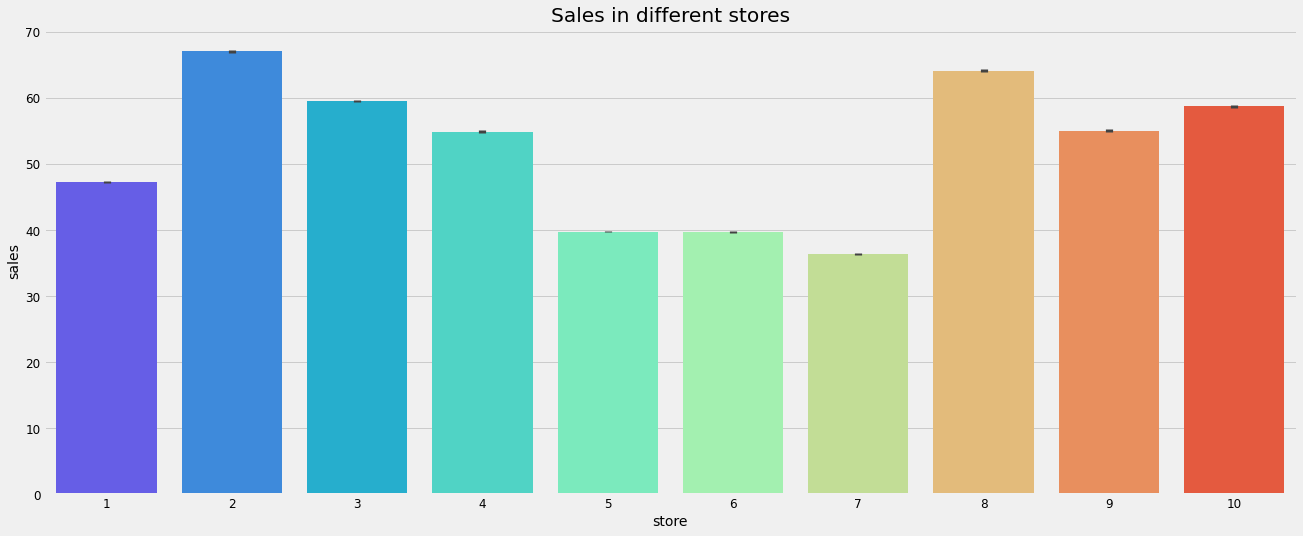

In [21]:
### Visualization of Sales in different stores

plt.figure(figsize=(20,8))
plt.title("Sales in different stores")
sns.barplot(df['store'],df['sales'],palette='rainbow')

Store 2 has higher sales

<AxesSubplot:title={'center':'Sales of different Items'}, xlabel='item', ylabel='sales'>

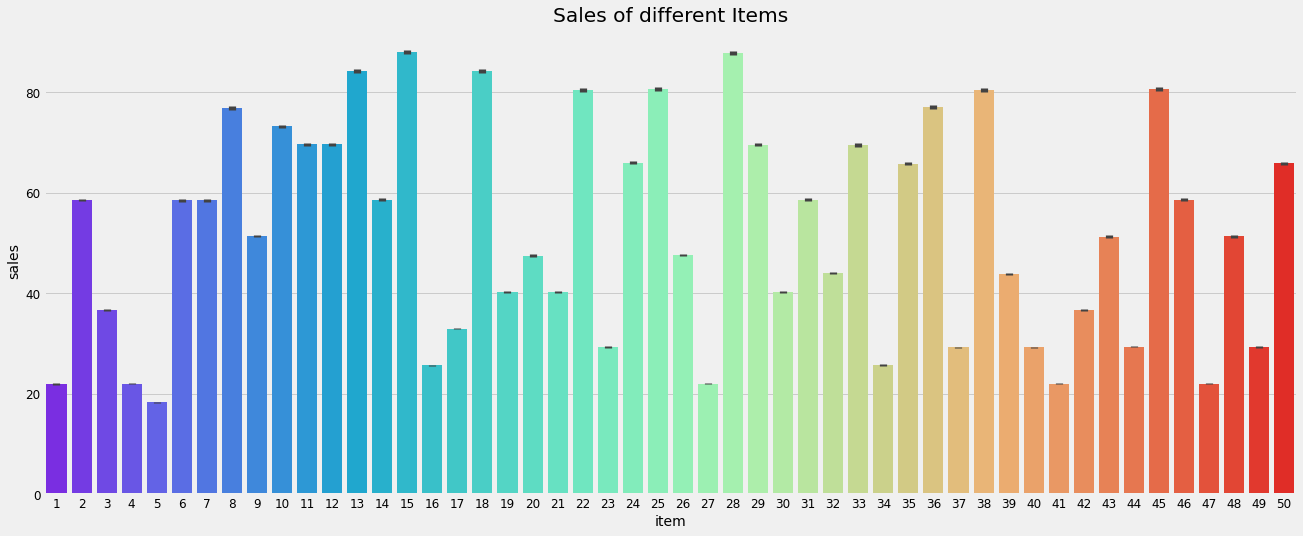

In [22]:
## Visualization of Sales of different items

plt.figure(figsize=(20,8))
plt.title("Sales of different Items")
sns.barplot(df['item'],df['sales'],palette='rainbow')

items 15 and 28 are sold more

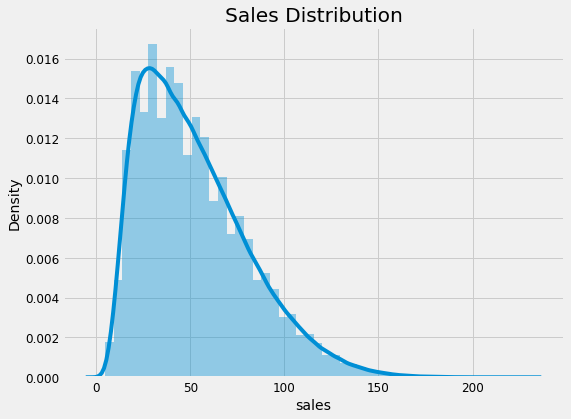

In [23]:
# Overall Sales Distribution
plt.figure(figsize = (8,6))
sns.distplot(df['sales'])
plt.title('Sales Distribution')
plt.show()


Sales is right skewed

<AxesSubplot:xlabel='date'>

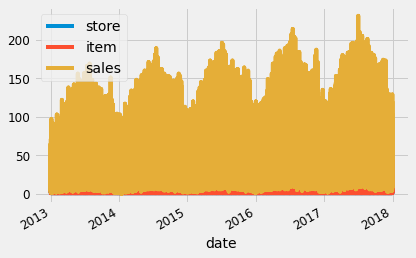

In [24]:
df.plot()

# Seperating store 1 sales data

In [25]:
# Taking a single store,  store 1 data

store1_sales = df[df['store'] == 1]
store1_sales

store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10
...           ...   ...    ...
2017-12-27      1    50     38
2017-12-28      1    50     52
2017-12-29      1    50     59
2017-12-30      1    50     66
2017-12-31      1    50     45

[91300 rows x 3 columns]

In [26]:
store1_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91300 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store   91300 non-null  int64
 1   item    91300 non-null  int64
 2   sales   91300 non-null  int64
dtypes: int64(3)
memory usage: 2.8 MB


In [27]:
## store1 daily sales of all products together

store1_daily = store1_sales.groupby("date").agg({"sales":"sum"})
store1_daily

## store1_sales.groupby("date").agg({"sales":"sum"})
# or
## store1_sales.groupby('date')['sales'].sum().reset_index()


sales
date             
2013-01-01   1316
2013-01-02   1264
2013-01-03   1305
2013-01-04   1452
2013-01-05   1499
...           ...
2017-12-27   1837
2017-12-28   1951
2017-12-29   2116
2017-12-30   2304
2017-12-31   2388

[1826 rows x 1 columns]

# Time Resampling

Resampling is for frequency conversion and resampling of time series. 
To change the data instead of daily to monthly or weekly etc. or vice versa we use resample option in pandas.
In the resampling function, we need to change the date to datetimeindex. We already done that. Resample function uses DatetimeIndex, PeriodIndex, or TimedeltaIndex

Reference : https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

In [28]:
store1_daily.head()

sales
date             
2013-01-01   1316
2013-01-02   1264
2013-01-03   1305
2013-01-04   1452
2013-01-05   1499

In [29]:
## Monthly sales mean of store 1 

store1_monthly=store1_daily.resample(rule='MS').mean()
store1_monthly

sales
date                   
2013-01-01  1325.064516
2013-02-01  1475.214286
2013-03-01  1800.870968
2013-04-01  2050.766667
2013-05-01  2234.580645
2013-06-01  2384.366667
2013-07-01  2500.870968
2013-08-01  2249.838710
2013-09-01  2080.266667
2013-10-01  1907.419355
2013-11-01  2082.166667
2013-12-01  1484.806452
2014-01-01  1541.548387
2014-02-01  1708.500000
2014-03-01  2055.774194
2014-04-01  2371.633333
2014-05-01  2584.129032
2014-06-01  2739.866667
2014-07-01  2883.516129
2014-08-01  2574.000000
2014-09-01  2371.133333
2014-10-01  2217.419355
2014-11-01  2416.866667
2014-12-01  1690.806452
2015-01-01  1607.806452
2015-02-01  1768.928571
2015-03-01  2130.838710
2015-04-01  2490.033333
2015-05-01  2694.290323
2015-06-01  2824.833333
2015-07-01  3031.258065
2015-08-01  2691.677419
2015-09-01  2479.633333
2015-10-01  2339.354839
2015-11-01  2476.400000
2015-12-01  1764.548387
2016-01-01  1759.967742
2016-02-01  1921.448276
2016-03-01  2308.548387
2016-04-01  2718.566667
2016-05-01  2887.161290
2016-06-01  3074.366667
2016-07-01  3323.451613
2016-08-01  2858.903226
2016-09-01  2714.800000
2016-10-01  2530.193548
2016-11-01  2685.933333
2016-12-01  1943.419355
2017-01-01  1809.225806
2017-02-01  2003.500000
2017-03-01  2388.290323
2017-04-01  2844.600000
2017-05-01  2975.741935
2017-06-01  3206.266667
2017-07-01  3425.387097
2017-08-01  2995.354839
2017-09-01  2825.300000
2017-10-01  2597.387097
2017-11-01  2816.666667
2017-12-01  2030.903226

<AxesSubplot:xlabel='date'>

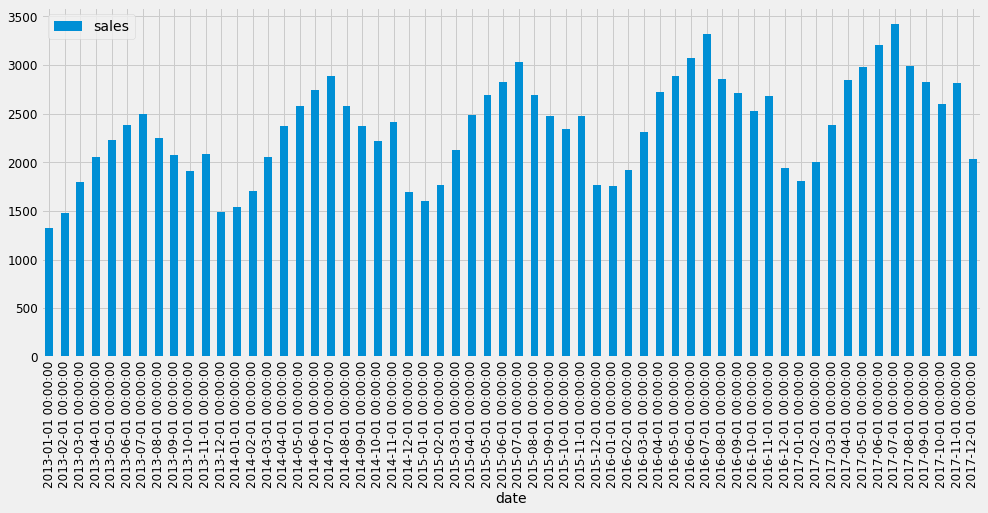

In [30]:
store1_daily.resample(rule='MS').mean().plot(kind='bar',figsize=(15,6))

In [31]:
## Yearly sales mean of store 1

store1_yearly=store1_daily.resample(rule='AS').mean()
store1_yearly

sales
date                   
2013-01-01  1966.684932
2014-01-01  2265.167123
2015-01-01  2360.849315
2016-01-01  2561.456284
2017-01-01  2662.394521

<AxesSubplot:xlabel='date'>

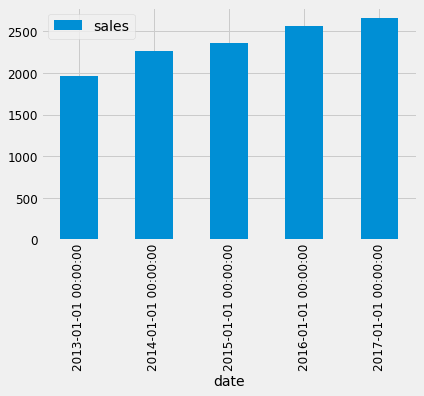

In [32]:
store1_daily.resample(rule='AS').mean().plot(kind='bar')

<AxesSubplot:xlabel='date'>

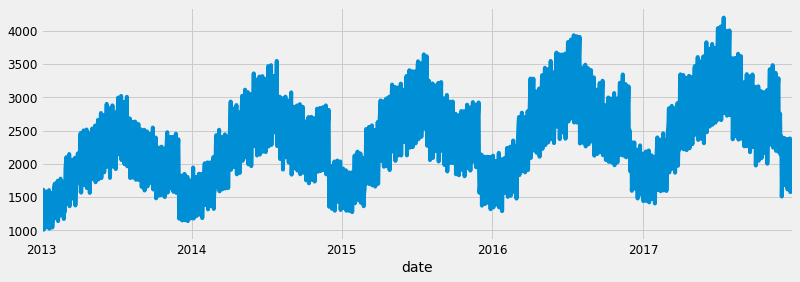

In [33]:
### Plotting Daily sales mean of store 1

store1_daily['sales'].plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

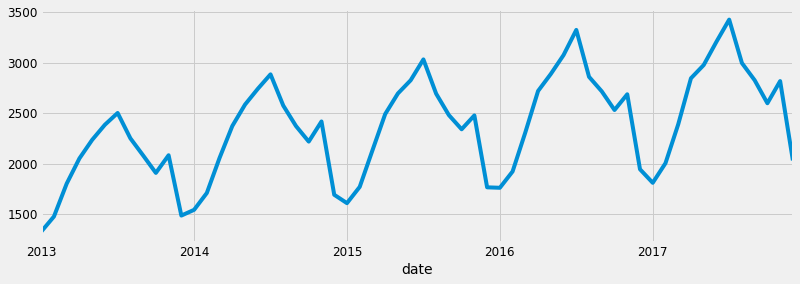

In [34]:
### Plotting Monthly sales mean of store 1

store1_monthly['sales'].plot(figsize=(12,4))

<AxesSubplot:xlabel='date'>

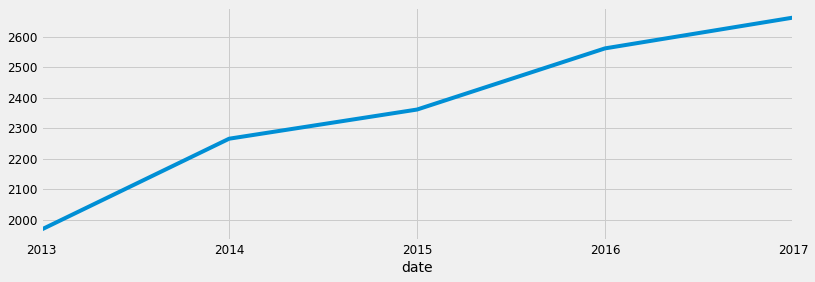

In [35]:
## Plotting Yearly sales mean of store 1

store1_yearly['sales'].plot(figsize=(12,4))

# Visualizing Sales Time Series Data

  * There is an upward trend and seasonality in data. Since monthly sales mean shows much seasonality we select monthly sales mean data for forecasting

  * In data frame store1_monthly, each row represents the mean sales of all products together for a given month in store1

<AxesSubplot:xlabel='date'>

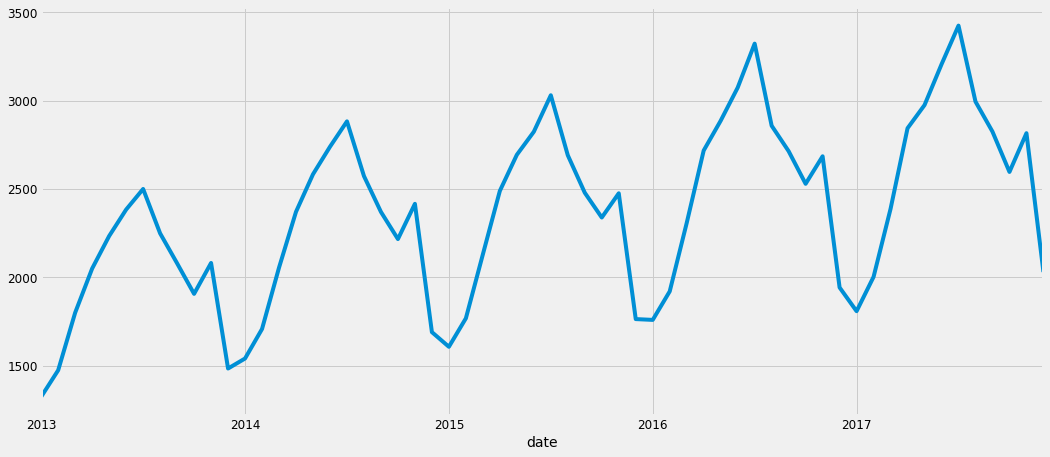

In [36]:
### Plotting Monthly sales of store 1

store1_monthly['sales'].plot(figsize=(16,7))

There is an upward trend and sesonality

<AxesSubplot:xlabel='date'>

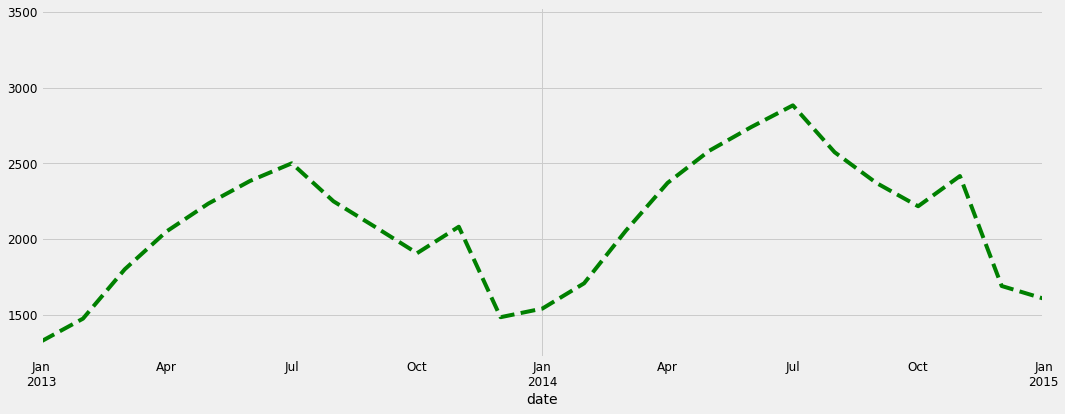

In [37]:
store1_monthly['sales'].plot(xlim=['2013-01-01','2015-01-31'],figsize=(16,6),ls='--',c='green')

Every year July month has highest sales mean

Year 2017 has highest sales mean

In [38]:
store1_monthly.head(15)

sales
date                   
2013-01-01  1325.064516
2013-02-01  1475.214286
2013-03-01  1800.870968
2013-04-01  2050.766667
2013-05-01  2234.580645
2013-06-01  2384.366667
2013-07-01  2500.870968
2013-08-01  2249.838710
2013-09-01  2080.266667
2013-10-01  1907.419355
2013-11-01  2082.166667
2013-12-01  1484.806452
2014-01-01  1541.548387
2014-02-01  1708.500000
2014-03-01  2055.774194

In [39]:
print(store1_monthly['2017':])

                  sales
date                   
2017-01-01  1809.225806
2017-02-01  2003.500000
2017-03-01  2388.290323
2017-04-01  2844.600000
2017-05-01  2975.741935
2017-06-01  3206.266667
2017-07-01  3425.387097
2017-08-01  2995.354839
2017-09-01  2825.300000
2017-10-01  2597.387097
2017-11-01  2816.666667
2017-12-01  2030.903226


#### Decompostion plot

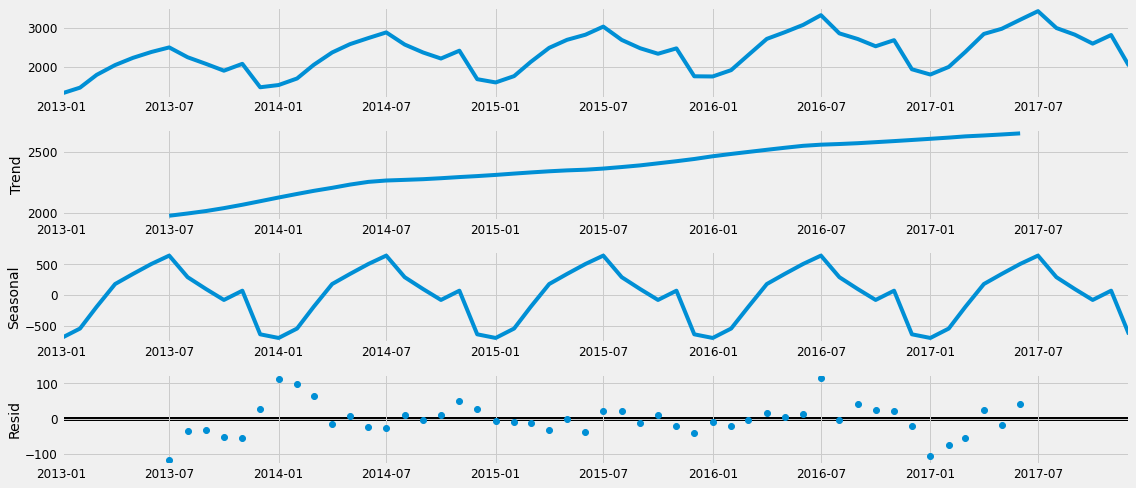

In [40]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store1_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

We can see an upward trend and seasonality

# Stationarity Checking

### Dickey Fuller Test

Stationary is constant mean and constant variance. Dickey Fuller or Adfuller is a simple test which tells that if the time series is stationary which is a kind of hypothesis testing. The Null hypothesis is time series are non-stationary. If the p-value is less than 5 percent then reject the NULL hypothesis else accept the NULL hypothesis.

P-value is greater than 5 per cent, which means we cannot build a model on Non-stationary data so we have to make the time series stationary. To make time-series stationary if it is not, we can do differencing

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [43]:
adf_test(store1_monthly['sales'])

ADF Statistics: -5.165600152001788
p- value: 1.0330971280154084e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Rolling mean test

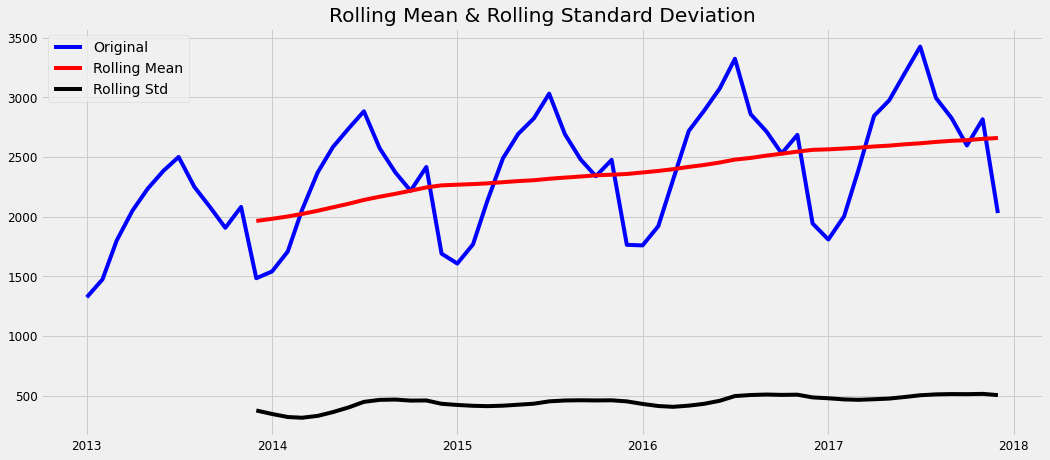

In [44]:
rolling_mean = store1_monthly.rolling(window = 12).mean()
rolling_std = store1_monthly.rolling(window = 12).std()
plt.plot(store1_monthly, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

The rolling mean and standard deviation, both are almost horizontal. So time series is stationary.

* Since data is sationary, no need of differencing

# ACF and PACF

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

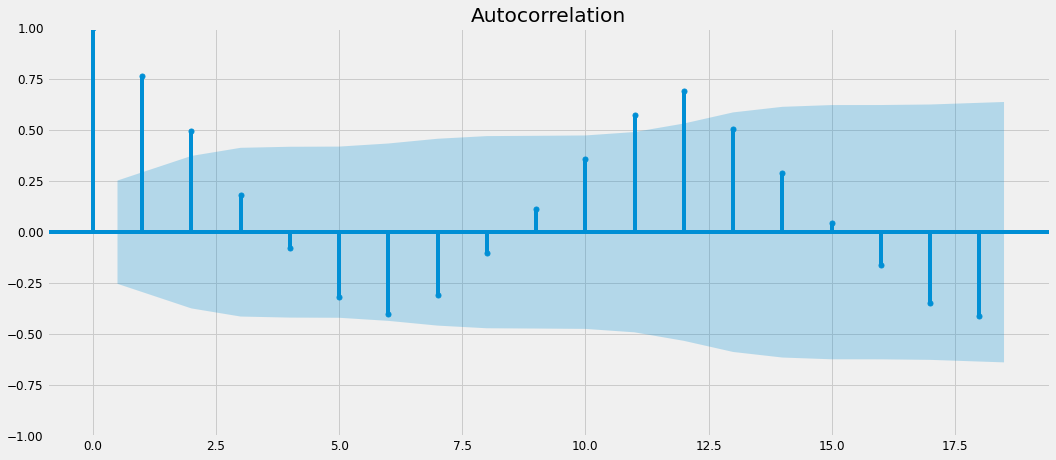

In [46]:
acf = plot_acf(store1_monthly["sales"])

MA (q) = number of lagged forecasts error in the predictions

try q = 14

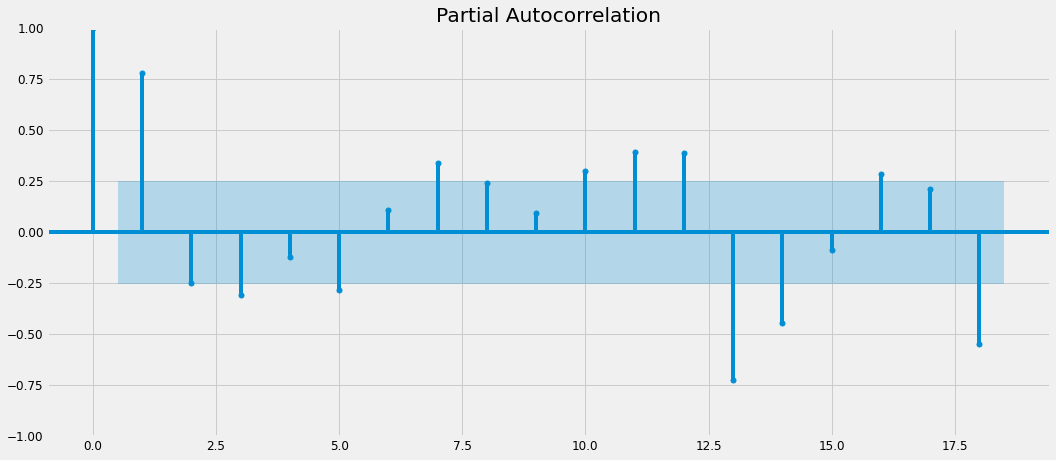

In [47]:
pacf = plot_pacf(store1_monthly["sales"])

 AR (p) = number of auto-regressive terms

 From PACF plot, p = 11 (no of lags crossing upper and lower band)

In [48]:
# p value from PACF (AR)
# d = no of times of differencing, here d=0
# q value from ACF (MA)

# ARIMA Model

### ARIMA (p, d, q)

 * The parameter p is the number of autoregressive terms or the number of “lag observations.” It is also called the “lag order,” and it determines the outcome of the model by providing lagged data points.

 * The parameter d is known as the degree of differencing. it indicates the number of times the lagged indicators have been subtracted to make the data stationary.

 * The parameter q is the number of forecast errors in the model and is also referred to as the size of the moving average window.

In [49]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(store1_monthly,order=(11,0,14))
model_fit=model.fit()
model_fit.summary()

#order=(p,d,q)

C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   60
Model:               ARIMA(11, 0, 14)   Log Likelihood               -1871.224
Date:                Mon, 13 Mar 2023   AIC                           3796.447
Time:                        01:49:36   BIC                           3852.995
Sample:                    01-01-2013   HQIC                          3818.566
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2361.2725      4e-05    5.9e+07      0.000    2361.272    2361.273
ar.L1         -0.0226      0.013     -1.794      0.073      -0.047       0.002
ar.L2          0.9953      0.013     78.191      0.000       0.970       1.020
ar.L3         -0.9785      0.002   -422.396      0.000      -0.983      -0.974
ar.L4          0.0274      0.013      2.118      0.034       0.002       0.053
ar.L5          1.0090      0.015     65.730      0.000       0.979       1.039
ar.L6         -1.0598      0.006   -173.315      0.000      -1.072      -1.048
ar.L7          0.0688      0.011      6.107      0.000       0.047       0.091
ar.L8          0.9282      0.013     70.504      0.000       0.902       0.954
ar.L9         -1.0289      0.004   -265.161      0.000      -1.037      -1.021
ar.L10         0.1088      0.010     10.832      0.000       0.089       0.129
ar.L11         0.9522      0.011     83.929      0.000       0.930       0.974
ma.L1          0.1171      0.055      2.115      0.034       0.009       0.226
ma.L2         -0.3140      0.229     -1.371      0.170      -0.763       0.135
ma.L3          1.4959      0.170      8.803      0.000       1.163       1.829
ma.L4         -0.5088      0.118     -4.328      0.000      -0.739      -0.278
ma.L5          0.1410      0.038      3.731      0.000       0.067       0.215
ma.L6          1.5896      0.108     14.693      0.000       1.378       1.802
ma.L7         -0.9308      0.034    -27.157      0.000      -0.998      -0.864
ma.L8          0.8951      0.229      3.902      0.000       0.445       1.345
ma.L9          0.9317      0.085     10.951      0.000       0.765       1.099
ma.L10        -0.9523      0.136     -7.026      0.000      -1.218      -0.687
ma.L11         1.0544      0.152      6.926      0.000       0.756       1.353
ma.L12         0.5541      0.116      4.773      0.000       0.327       0.782
ma.L13        -0.0672      0.033     -2.026      0.043      -0.132      -0.002
ma.L14         0.4840      0.011     42.235      0.000       0.462       0.506
sigma2        94.5365        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.37   Prob(JB):                         0.70
Heteroskedasticity (H):               1.79   Skew:                             0.09
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.7e+22. Standard errors may be unstable.
"""

### Prediction using ARIMA Model

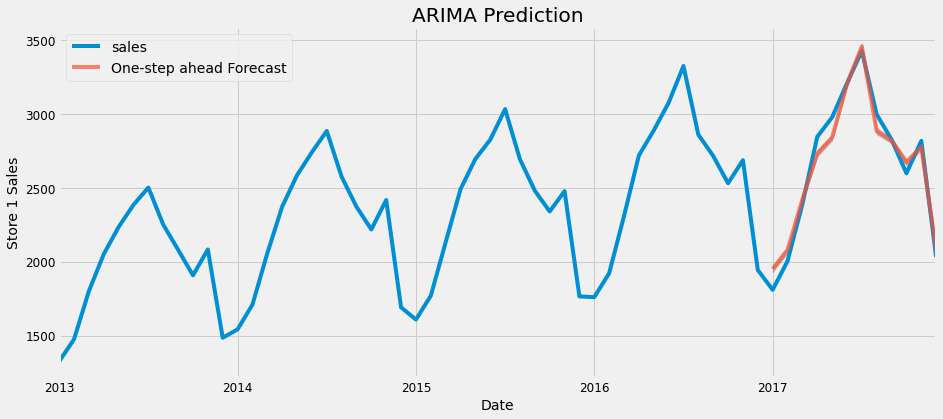

In [50]:
pred = model_fit.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = store1_monthly['2013':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("ARIMA Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Store 1 Sales')
plt.legend()
plt.show()

In [51]:
comp = pd.DataFrame()
comp['Store1 Sales'] = store1_monthly['2017':]
comp['ARIMA_Prediction'] = pred.predicted_mean
comp

Store1 Sales  ARIMA_Prediction
date                                      
2017-01-01   1809.225806       1950.107360
2017-02-01   2003.500000       2078.378341
2017-03-01   2388.290323       2421.189463
2017-04-01   2844.600000       2730.747031
2017-05-01   2975.741935       2839.379887
2017-06-01   3206.266667       3201.435646
2017-07-01   3425.387097       3455.811434
2017-08-01   2995.354839       2882.025294
2017-09-01   2825.300000       2819.868712
2017-10-01   2597.387097       2670.795211
2017-11-01   2816.666667       2776.770027
2017-12-01   2030.903226       2076.711309

#### Validating ARIMA Predictions - MSE, RMSE

In [52]:
monthly_forecasted_arima = pred.predicted_mean
monthly_truth = store1_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(monthly_truth,monthly_forecasted_arima)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of forecasts is 6749.56
The Root Mean Squared Error of forecasts is 82.16


In [53]:
ARIMA_RMSE = round(np.sqrt(mse), 2)
Store1_RMSE = pd.DataFrame([ARIMA_RMSE], columns=['ARIMA_RMSE'],index = ['Store1'])
Store1_RMSE

ARIMA_RMSE
Store1       82.16

# Seasonal ARIMA Model

### Finding optimal values for p d and q

In [54]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [55]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store1_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1089.194705033009
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:821.0328317845291
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:631.7347785214846


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1357.80093275439
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:582.6356883259803
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:557.6115265303766
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:436.5954026246267


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1176.9964887112892
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1005.2997669912701
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:756.7305190734312
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:566.7733423426503


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1341.4322825163742
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:548.1136625347297


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:530.4664133235486
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:414.6596899286791


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1093.2087905887383
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:833.2719769967964
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:630.415928331845
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:499.1548032352784


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1508.4188736346266
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:504.1870016995315
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:493.2420121340536
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:375.7894957632611


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1237.3897368165744
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:819.4399334322213
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:617.1621888332709
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:490.64510358549046


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1498.31673482893
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:504.4935841232698
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:482.22347673881177
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:372.02338809870633


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1493.4562437929942
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:848.7450207319757
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:645.6260797877678
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:509.61363162399755
SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1499.1926297577338
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:502.5407739518213
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:500.90966640244926
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:377.0296151354379
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1339.7999483572667
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:835.6438429950479
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:633.5973536241737
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:501.2162656794872


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1373.4700295290634
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:503.6523150046979
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:491.12832880938055
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:374.50434607260814
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1304.3483776895152
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:833.1948721389338
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:630.6209241056325
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:500.6764708340581


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1476.615572147492
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:494.90794506908395
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:491.74469545400945
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:361.588673557852


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1497.9207923923739
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:820.6088652048904
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:618.9827122917903
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:492.6284391720598


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1201.5934946916404
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:496.81280690448443
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:487.34943103494885
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:363.174525672193
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1122.6587800100067


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Lowest  AIC
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:361.588673557852

### Fitting the SARIMA Model using the Optimal parameters

Seasonal Autoregressive Integrated Moving Average (SARIMA)


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(store1_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))

### order=(p,d,q),seasonal_order=(p,d,q,season_value)


In [57]:
results=model.fit()

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -253.056
Date:                            Mon, 13 Mar 2023   AIC                            512.111
Time:                                    01:49:44   BIC                            517.661
Sample:                                01-01-2013   HQIC                           514.200
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1167      0.127     -0.917      0.359      -0.366       0.133
ar.S.L12      -0.1275      0.176     -0.723      0.469      -0.473       0.218
sigma2      2763.9597    540.228      5.116      0.000    1705.132    3822.787
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.77
Prob(Q):                              0.94   Prob(JB):                         0.01
Heteroskedasticity (H):               0.62   Skew:                            -0.99
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Model diagnostics

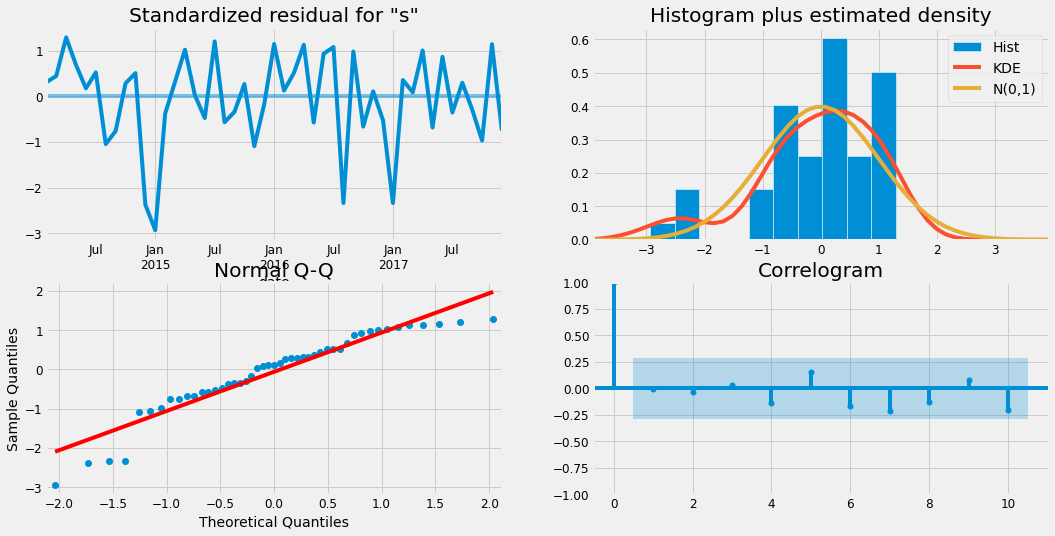

In [59]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

### Prediction using SARIMA Model

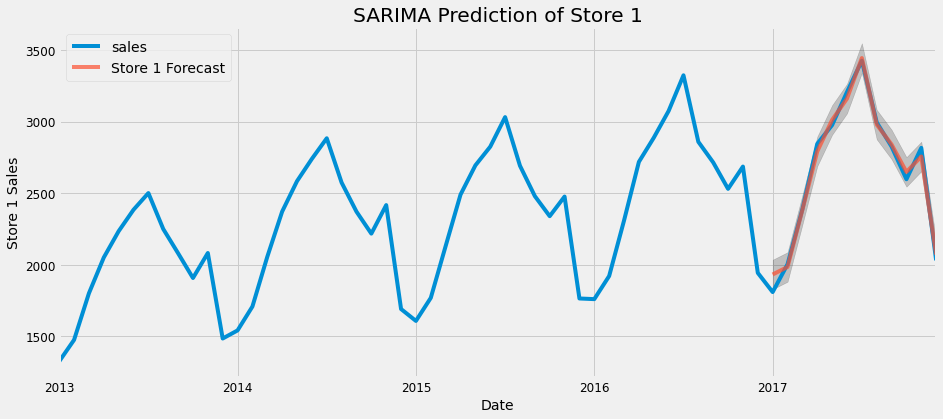

In [60]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = store1_monthly['2013':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'Store 1 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of Store 1")
ax.set_xlabel('Date')
ax.set_ylabel('Store 1 Sales')
plt.legend()
plt.show()

In [61]:
comp['SARIMA_Prediction']=pred.predicted_mean
comp

Store1 Sales  ARIMA_Prediction  SARIMA_Prediction
date                                                         
2017-01-01   1809.225806       1950.107360        1932.203587
2017-02-01   2003.500000       2078.378341        1984.614559
2017-03-01   2388.290323       2421.189463        2383.556606
2017-04-01   2844.600000       2730.747031        2791.721769
2017-05-01   2975.741935       2839.379887        3011.586155
2017-06-01   3206.266667       3201.435646        3160.620970
2017-07-01   3425.387097       3455.811434        3444.014539
2017-08-01   2995.354839       2882.025294        2979.636785
2017-09-01   2825.300000       2819.868712        2840.419708
2017-10-01   2597.387097       2670.795211        2648.363395
2017-11-01   2816.666667       2776.770027        2756.454378
2017-12-01   2030.903226       2076.711309        2070.372380

### Validating SARIMA Prediction - MSE, RMSE

In [62]:

monthly_forecasted_sarima = pred.predicted_mean
monthly_truth = store1_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(monthly_truth,monthly_forecasted_sarima)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))

# mse = ((monthly_forecasted - monthly_truth) ** 2 ).mean()

The Mean Squared Error of forecasts is 2522.63
The Root Mean Squared Error of forecasts is 50.23


In [63]:
Store1_RMSE['SARIMA_RMSE'] = round(np.sqrt(mse), 2)
Store1_RMSE

ARIMA_RMSE  SARIMA_RMSE
Store1       82.16        50.23

# Future Forecasting using SARIMA

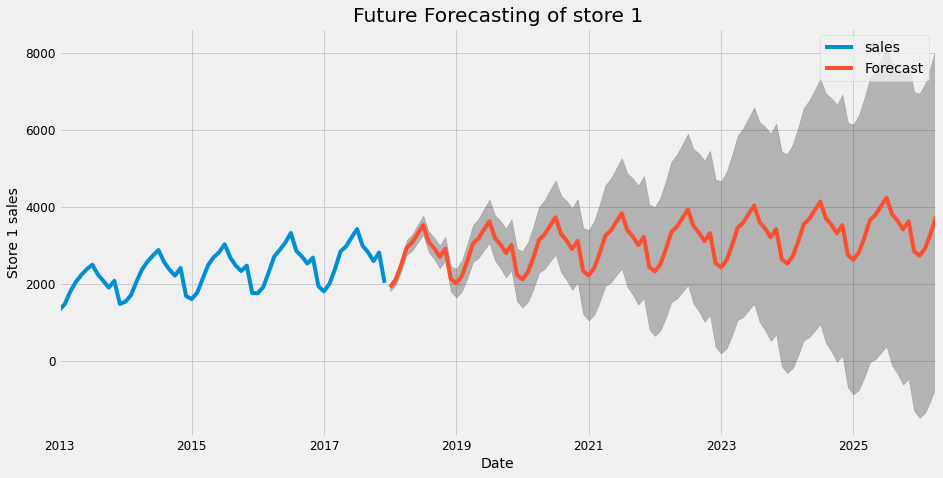

In [64]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = store1_monthly.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .25)

plt.title("Future Forecasting of store 1")
ax.set_xlabel('Date')
ax.set_ylabel('Store 1 sales')
plt.legend()
plt.show()

##  steps = 100 means 100 months.. 
##  forcasting for  1 year give steps = 12
##  for 2 years give steps = 24

# Data Exploration - Comparing sales of all 10 stores

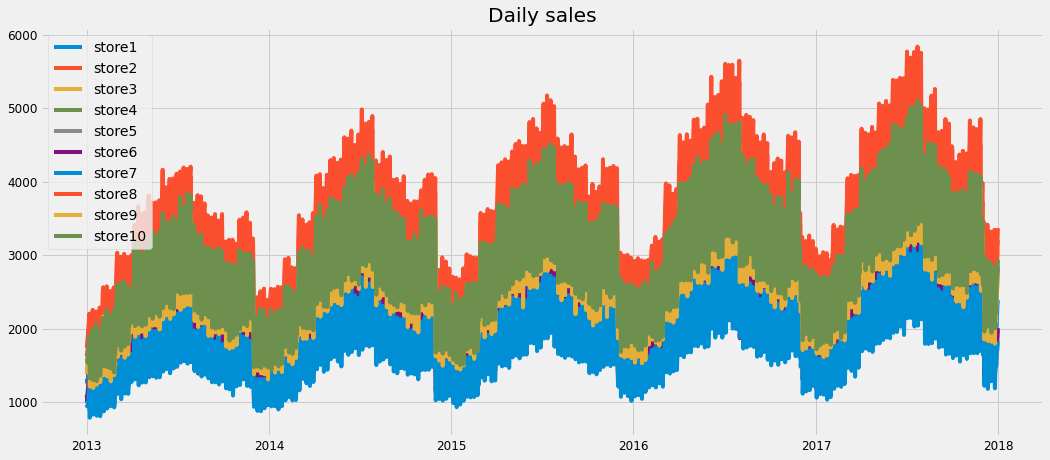

In [65]:
for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    plt.title("Daily sales")
    plt.plot(store_daily['sales'])
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))

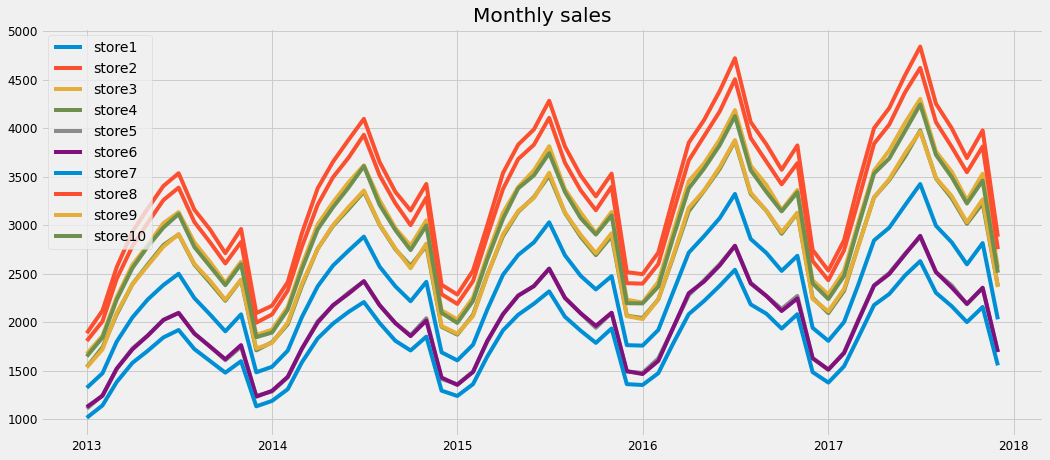

In [66]:
for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    store_monthly=store_daily.resample(rule='MS').mean()
    plt.title("Monthly sales")
    plt.plot(store_monthly['sales'])
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))
    

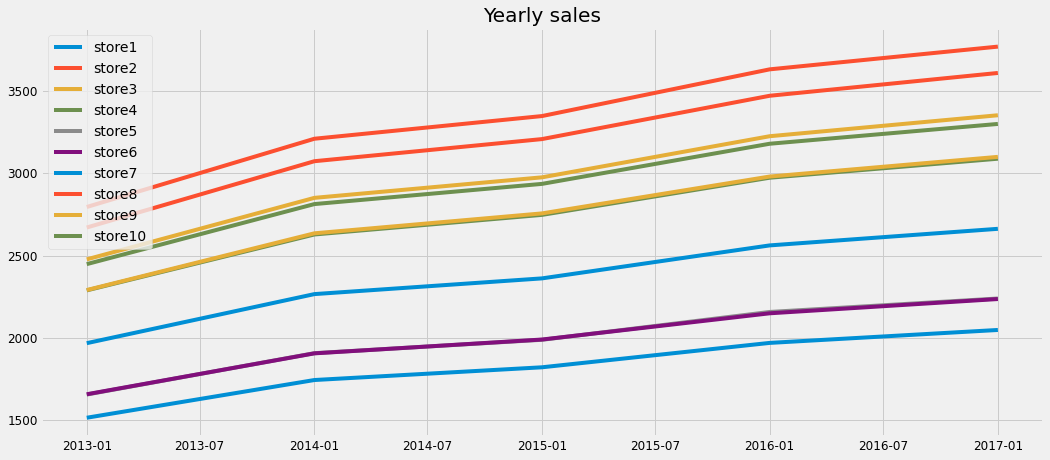

In [67]:
for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    store_yearly=store_daily.resample(rule='AS').mean()
    plt.title("Yearly sales")
    plt.plot(store_yearly['sales'])
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))

# Store 2 Model Building and Forecasting

In [68]:
## store 2
store2_sales = df[df['store'] == 2]
store2_daily = store2_sales.groupby("date").agg({"sales":"sum"})
store2_monthly = store2_daily.resample(rule='MS').mean()
store2_monthly.head(15)

# date is the index column so no need to set index again

sales
date                   
2013-01-01  1887.741935
2013-02-01  2120.857143
2013-03-01  2568.032258
2013-04-01  2932.900000
2013-05-01  3172.935484
2013-06-01  3405.266667
2013-07-01  3536.935484
2013-08-01  3161.032258
2013-09-01  2955.766667
2013-10-01  2712.677419
2013-11-01  2962.466667
2013-12-01  2094.903226
2014-01-01  2171.451613
2014-02-01  2414.464286
2014-03-01  2920.870968

<AxesSubplot:xlabel='date'>

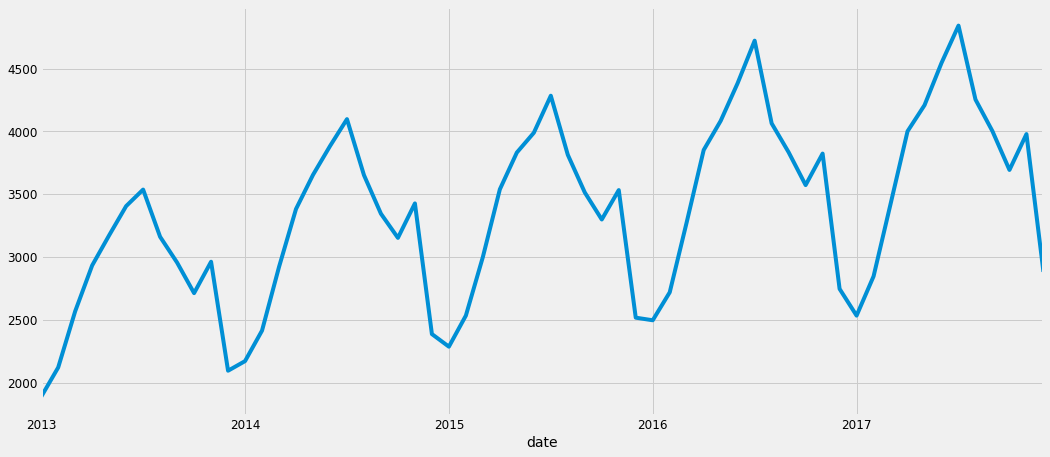

In [69]:
### Plotting Monthly sales of store 2

store2_monthly['sales'].plot(figsize=(16,7))

<AxesSubplot:xlabel='date'>

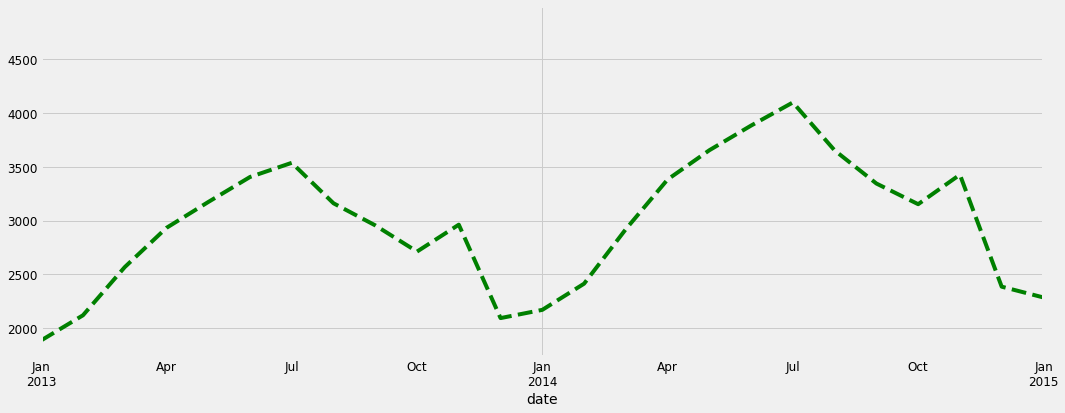

In [70]:
store2_monthly['sales'].plot(xlim=['2013-01-01','2015-01-31'],figsize=(16,6),ls='--',c='green')

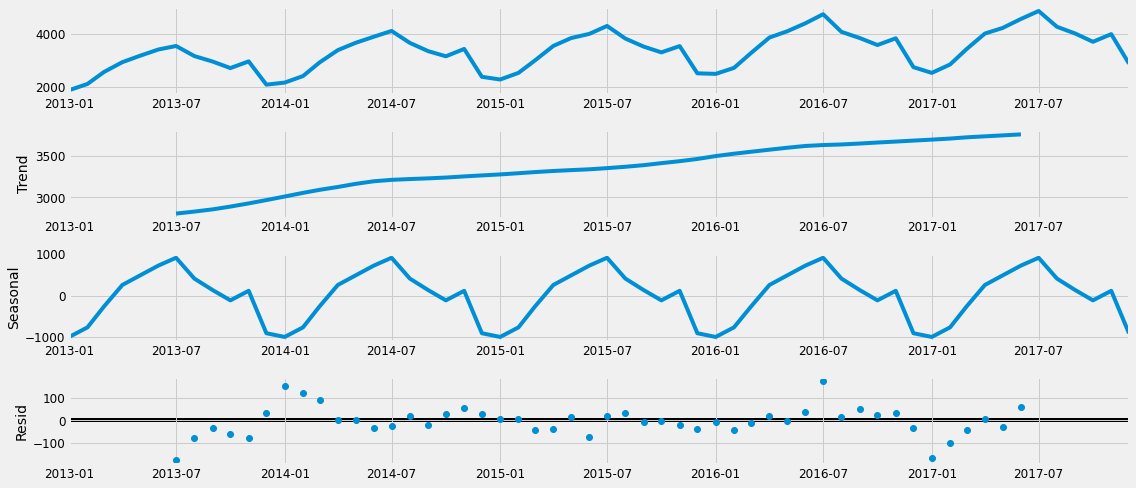

In [71]:
#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store2_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [72]:
### Stationarity Checking
adf_test(store2_monthly['sales'])

ADF Statistics: -5.012487778568841
p- value: 2.096425525514856e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


 * Since data is stationary, differencing not needed

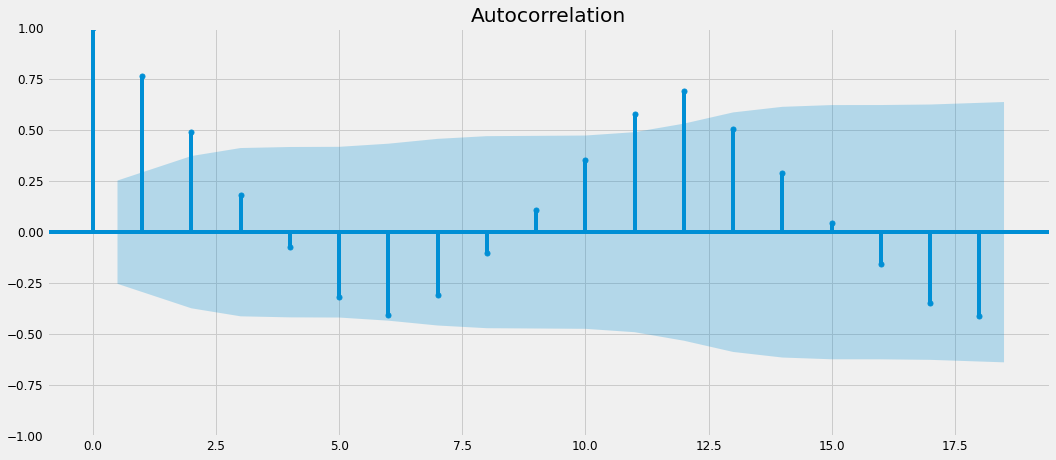

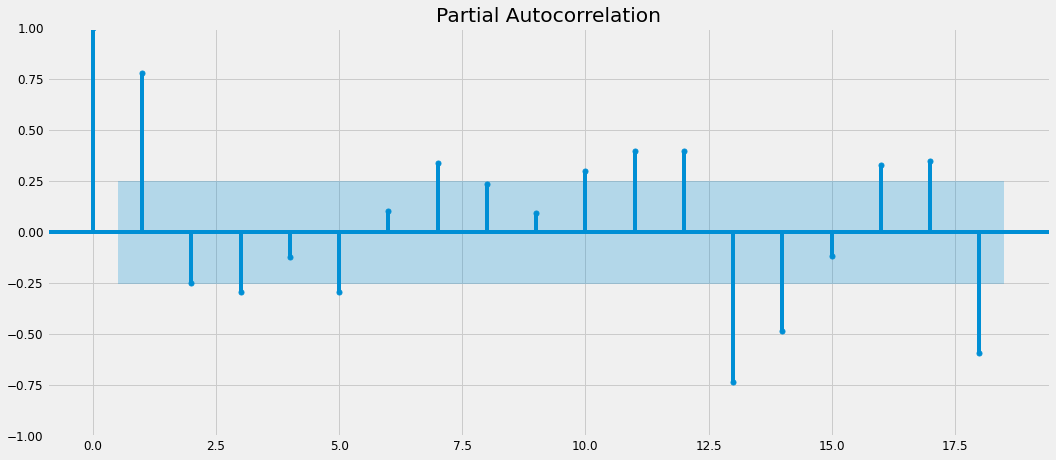

In [73]:
### ACF and PACF

acf = plot_acf(store2_monthly["sales"])
pacf = plot_pacf(store2_monthly["sales"])

SARIMA Model

In [74]:
### Finding optimal values for p d and q

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store2_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1130.4048230238648
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:853.1829785120727
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:663.8691160423692


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1395.8737865455048
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:615.6736953269744
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:593.2983220686262
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:462.56930668727784
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:438.4352338934094
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1073.031957469829
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:788.2066145936351
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:598.7065519615386
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1446.193032178162
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:579.711162451403
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:554.6697975475945
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:439.45132767452634
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:407.46129561859937
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:874.0649644002665
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:661.806697576259
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:531.7772135263954
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1250.272993076984
SARIMAX(0, 1, 0)x(1, 0, 0, 12

C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:525.9744078589915
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:399.3437606354976


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1436.509356832214
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:859.548461983349
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:647.7028610280063
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:522.2512486323604


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1183.20278079141
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:539.2572198776085


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:518.4532070759641
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:397.04612639172757


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1177.5347459712295
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:890.2845723294722
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:677.7117907522379
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:542.9669284413719


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1090.5242815521358
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:537.552135729336
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:534.4480720753319
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:400.67399628545337
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:402.31086197115263
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:876.3603568147167
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:664.8223987767191
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:534.1200555844597


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1349.439336525875
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:538.5996301985834
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.1316402119381
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:399.628448887739
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:390.2971272323778
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:873.9595626546578
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:661.9057346000615
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:533.488767280025


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1390.1218832977424
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:529.2454538417614
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:525.1580936101312
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:387.2266439408566


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1145.1060406932545
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:860.84963910125
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:647.514799416226
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:522.1403712380636


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1342.962913942354
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:533.1210447096881


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:515.9923922450348
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:386.8611099138014
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1342.0394436266865


Lowest AIC value

SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:386.8611099138014


In [75]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store2_monthly,order=(1,1,1),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -268.413
Date:                             Mon, 13 Mar 2023   AIC                            544.825
Time:                                     01:49:55   BIC                            552.226
Sample:                                 01-01-2013   HQIC                           547.610
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8287      0.214     -3.874      0.000      -1.248      -0.409
ma.L1          0.9917      0.620      1.600      0.110      -0.223       2.206
ar.S.L12      -0.1209      0.231     -0.522      0.601      -0.575       0.333
sigma2      5146.9031   2393.517      2.150      0.032     455.697    9838.109
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.30   Prob(JB):                         0.23
Heteroskedasticity (H):               0.66   Skew:                            -0.61
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

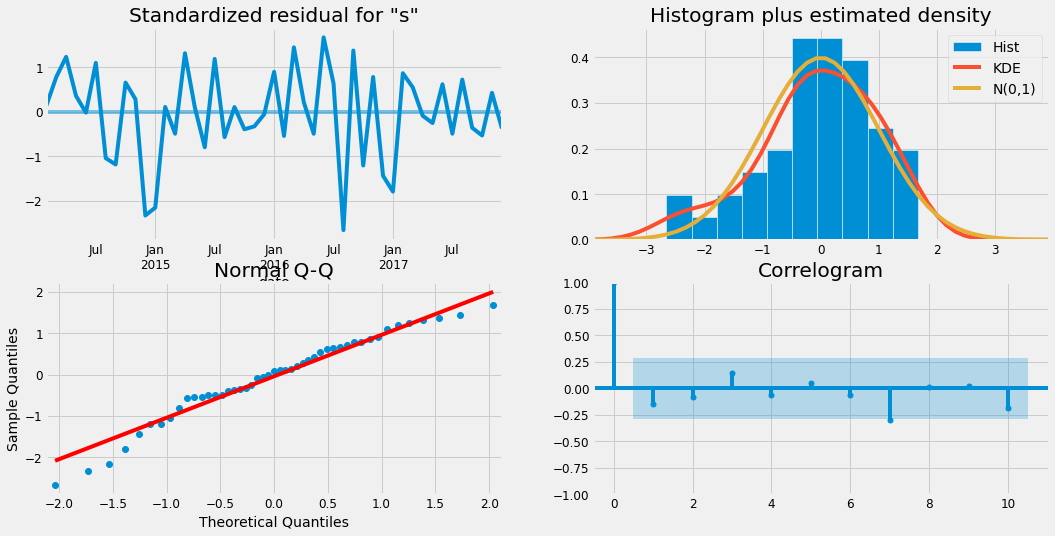

In [76]:
### SARIMA Model diagnostics

results.plot_diagnostics(figsize=(16,8))
plt.show()

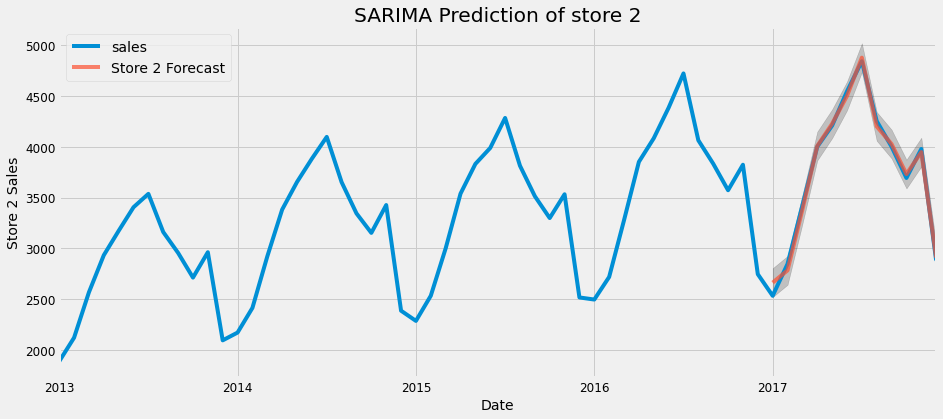

In [77]:
### Prediction using SARIMA Model

pred2 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred2_ci = pred2.conf_int()

ax = store2_monthly['2013':].plot(label = 'observed')
pred2.predicted_mean.plot(ax = ax, label = 'Store 2 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred2_ci.index, 
                pred2_ci.iloc[:,0],
                pred2_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 2")
ax.set_xlabel('Date')
ax.set_ylabel('Store 2 Sales')
plt.legend()
plt.show()

In [78]:
### Validating SARIMA Prediction - MSE, RMSE

store2_forecasted_sales = pred2.predicted_mean
store2_true_sales = store2_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store2_true_sales,store2_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of forecasts is 2702.81
The Root Mean Squared Error of forecasts is 51.99


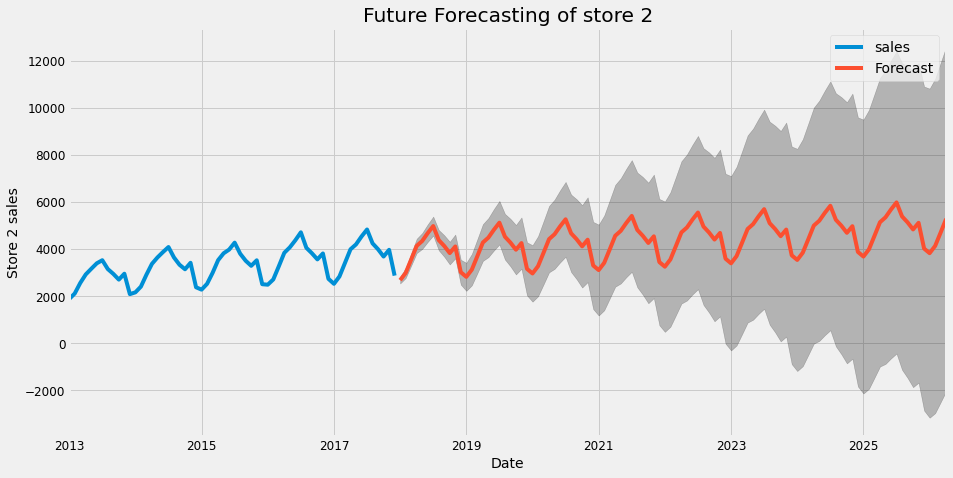

In [79]:
### Future Forecasting of store 2 using SARIMA

pred2_uc = results.get_forecast(steps = 100)
pred2_ci = pred2_uc.conf_int()

ax = store2_monthly.plot(label = 'observed', figsize=(14, 7))
pred2_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred2_ci.index,
               pred2_ci.iloc[:,0],
               pred2_ci.iloc[:,1],
               color = 'k',
               alpha = .25)

plt.title("Future Forecasting of store 2")
ax.set_xlabel('Date')
ax.set_ylabel('Store 2 sales')
plt.legend()
plt.show()

# Store 3 Model Building and Forecasting

In [80]:
## store 3
store3_sales = df[df['store'] == 3]
store3_daily = store3_sales.groupby("date").agg({"sales":"sum"})
store3_monthly = store3_daily.resample(rule='MS').mean()
store3_monthly.head()

sales
date                   
2013-01-01  1676.516129
2013-02-01  1860.035714
2013-03-01  2260.290323
2013-04-01  2592.233333
2013-05-01  2795.612903

<AxesSubplot:xlabel='date'>

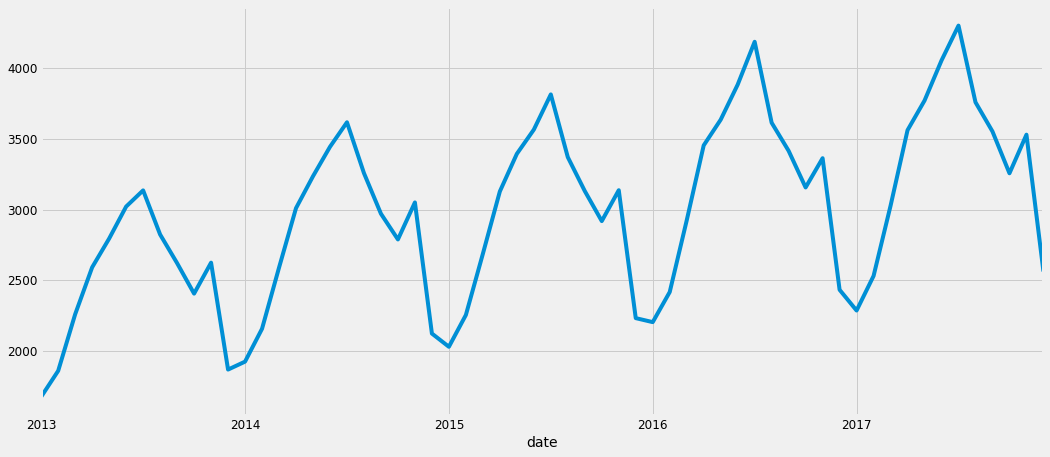

In [81]:
### Plotting Monthly sales of store 2

store3_monthly['sales'].plot(figsize=(16,7))

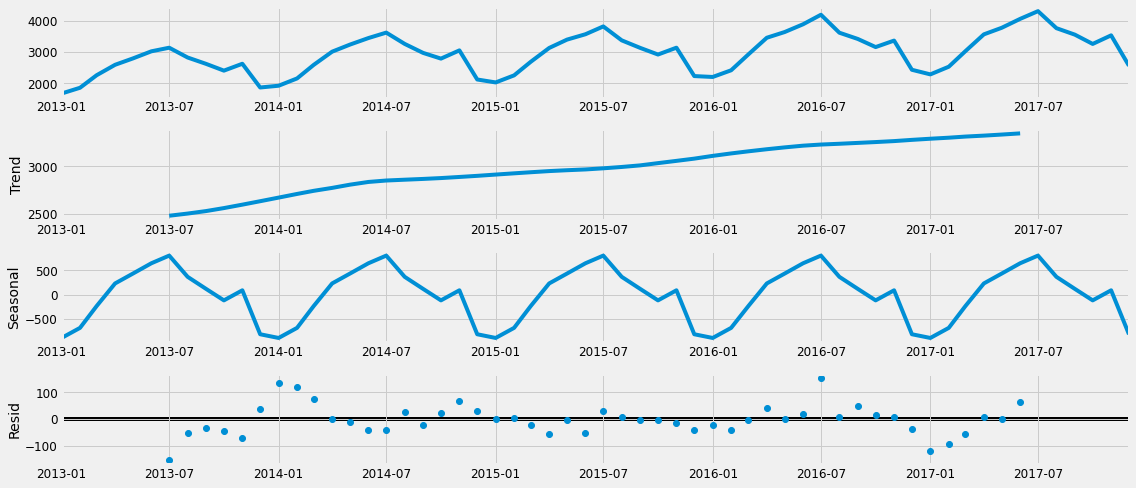

In [82]:
#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store3_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [83]:
### Stationarity Checking
adf_test(store3_monthly['sales'])

ADF Statistics: -5.209288098694474
p- value: 8.416209770663522e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


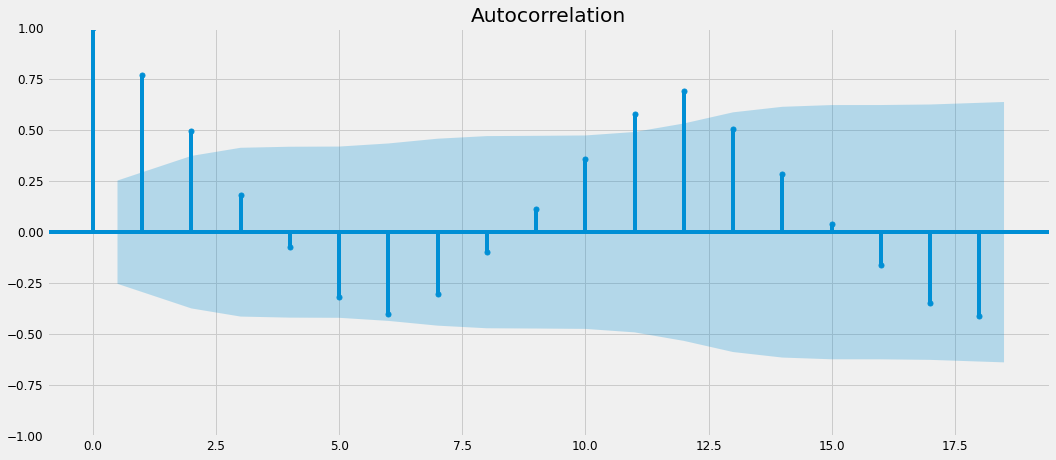

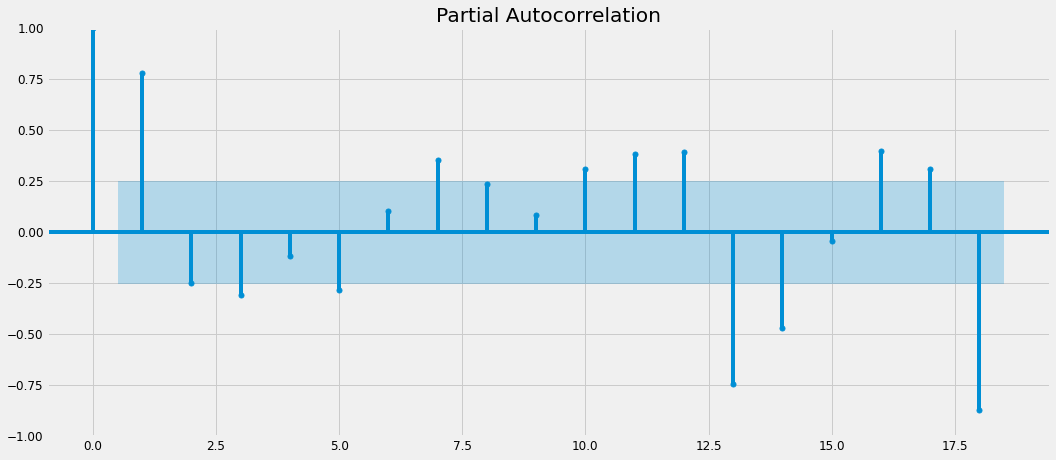

In [84]:
### ACF and PACF

acf = plot_acf(store3_monthly["sales"])
pacf = plot_pacf(store3_monthly["sales"])

SARIMA Model

In [85]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store3_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1116.408015191234
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:842.0554670630203
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:653.4898349924689


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1497.23546488305
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:604.2278436347885
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:581.2596687913876
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:452.17999186700393
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:428.32625709641496
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1059.36942865266
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:777.7371223603991
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:590.1103575808585


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1328.3306840569876
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:564.9449236509358
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:540.6422737353812
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:426.9965436362028
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:395.5088673826837
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:859.9627483797933
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:650.6184938045903
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:513.7390983573396


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1490.798929915572
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:519.5394916550135
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:508.01952975896614
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:383.47060071710285


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1449.5708794844923
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:845.7546979347128
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:637.1002048245864
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:504.90432045627676
SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1391.160747603278
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:519.9770151138665


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:502.49065268986385
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:381.45792535203077


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1379.9416291146072
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:875.8829513855917
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:666.3747223232981
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:525.3030841056126


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1477.7026485934725
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:518.4643928771774
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:517.0224098489218
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:384.8421614967808
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:386.84215949349175
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:862.3643127203414
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:653.912335832028
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:516.0366631202197


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1483.5080753323355
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:519.5182157454637
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:506.2751381574876
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:383.7117830558895
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:374.51158435006573
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:859.943575767988
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:650.8787631635058
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:515.3910769309375


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1504.2883827738951
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:509.71335521860243


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:513.2541149221593
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:369.8562683046753


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1497.1692923243236
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:846.930412830973
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:636.8091351294104
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:506.8174887933919


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1342.3733380989727
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:511.5475481235243
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:498.78733501656916
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:371.77924345145715
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1243.4514593728695


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC

SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:369.8562683046753

In [86]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store3_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -260.982
Date:                            Mon, 13 Mar 2023   AIC                            527.964
Time:                                    01:50:03   BIC                            533.514
Sample:                                01-01-2013   HQIC                           530.053
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0934      0.116     -0.803      0.422      -0.321       0.134
ar.S.L12      -0.0684      0.201     -0.340      0.734      -0.463       0.326
sigma2      3886.6286    770.326      5.045      0.000    2376.816    5396.441
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.43
Prob(Q):                              0.95   Prob(JB):                         0.07
Heteroskedasticity (H):               0.34   Skew:                            -0.82
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

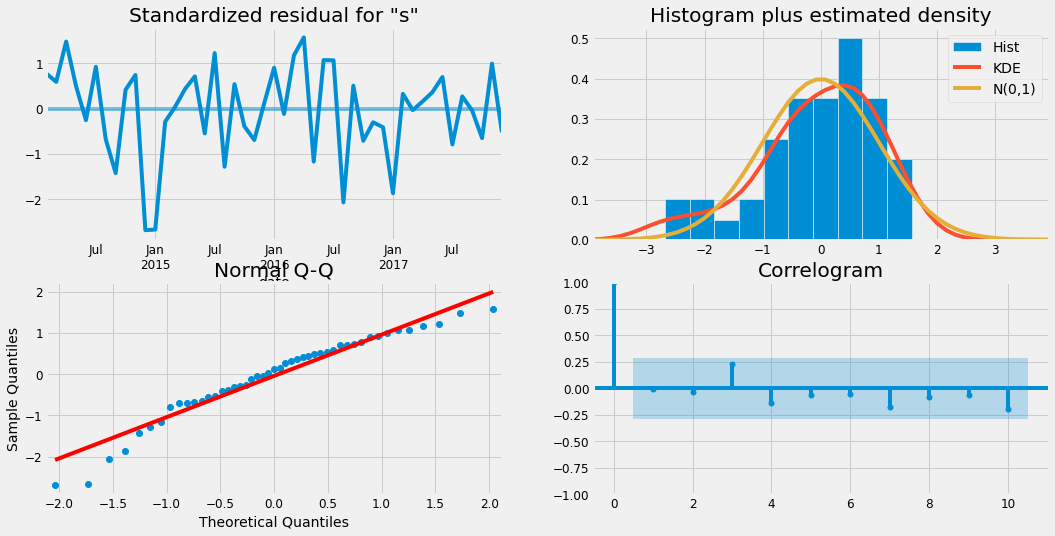

In [87]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

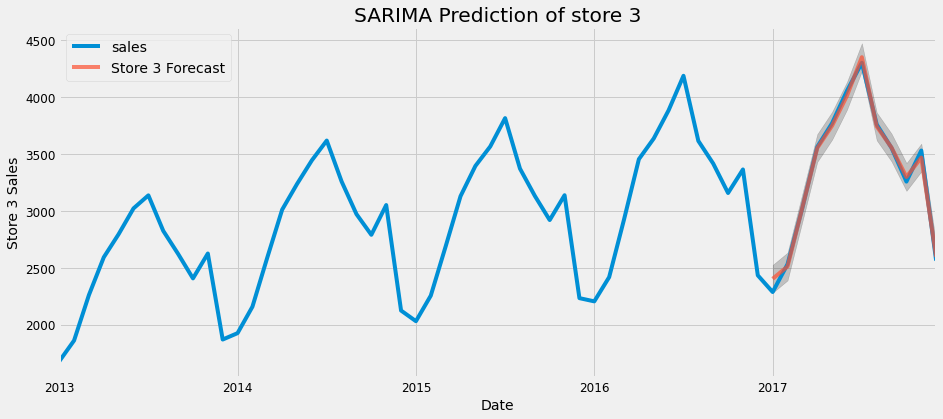

In [88]:
### Prediction using SARIMA Model

pred3 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred3_ci = pred3.conf_int()

ax = store3_monthly['2013':].plot(label = 'observed')
pred3.predicted_mean.plot(ax = ax, label = 'Store 3 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred3_ci.index, 
                pred3_ci.iloc[:,0],
                pred3_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 3")
ax.set_xlabel('Date')
ax.set_ylabel('Store 3 Sales')
plt.legend()
plt.show()

In [89]:
### Validating SARIMA Prediction  - MSE, RMSE

store3_forecasted_sales = pred3.predicted_mean
store3_true_sales = store3_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store3_true_sales,store3_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of forecasts is 2136.54
The Root Mean Squared Error of forecasts is 46.22


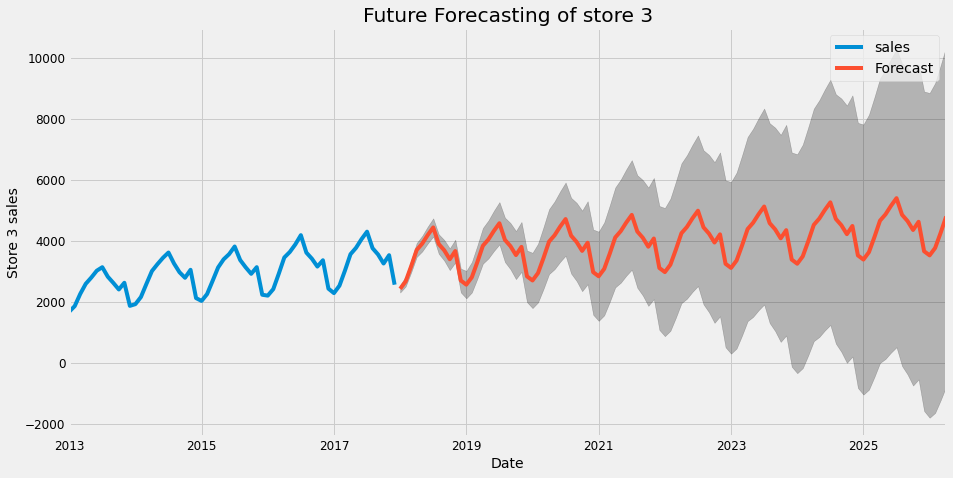

In [90]:
### Future Forecasting of store 3 using SARIMA

pred3_uc = results.get_forecast(steps = 100)
pred3_ci = pred3_uc.conf_int()

ax = store3_monthly.plot(label = 'observed', figsize=(14, 7))
pred3_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred3_ci.index,
               pred3_ci.iloc[:,0],
               pred3_ci.iloc[:,1],
               color = 'k',
               alpha = .25)

plt.title("Future Forecasting of store 3")
ax.set_xlabel('Date')
ax.set_ylabel('Store 3 sales')
plt.legend()
plt.show()

# Store 4 Model Building and Forecasting

In [91]:
## store 4
store4_sales = df[df['store'] == 4]
store4_daily = store4_sales.groupby("date").agg({"sales":"sum"})
store4_monthly = store4_daily.resample(rule='MS').mean()

<AxesSubplot:xlabel='date'>

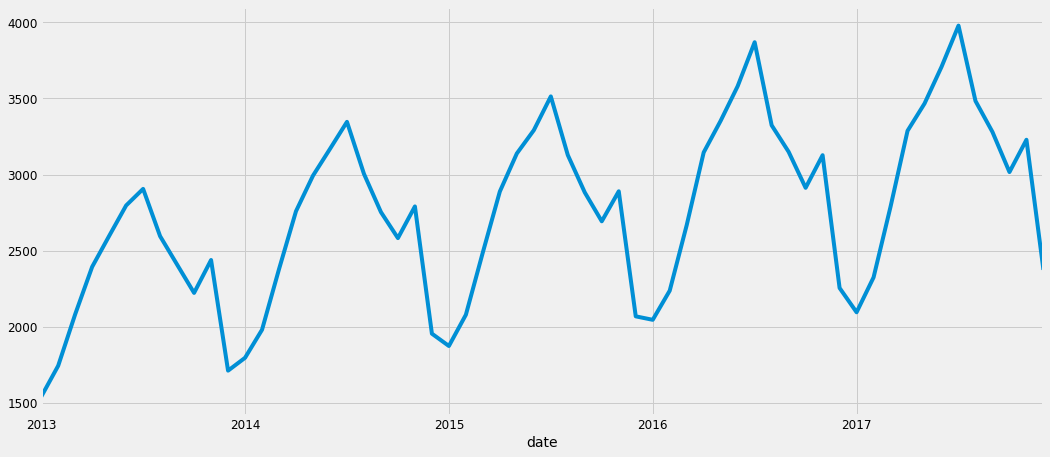

In [92]:
### Plotting Monthly sales of store 4

store4_monthly['sales'].plot(figsize=(16,7))

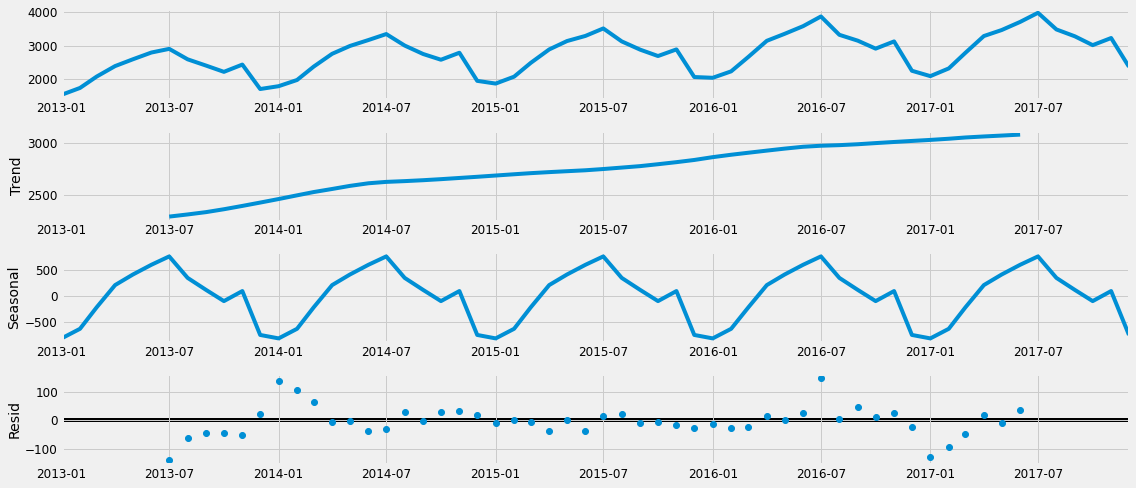

In [93]:
#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store4_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [94]:
### Stationarity Checking
adf_test(store4_monthly['sales'])

ADF Statistics: -5.5118073695136065
p- value: 1.964494703766244e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


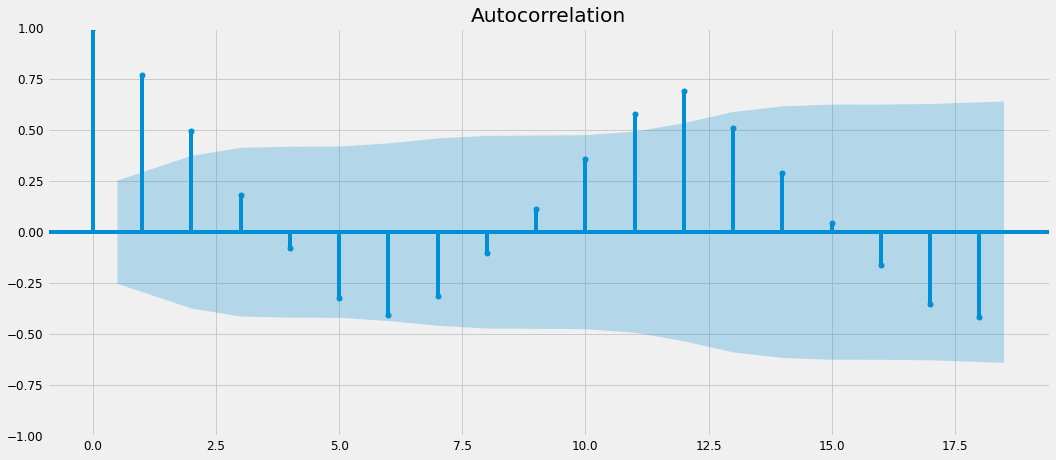

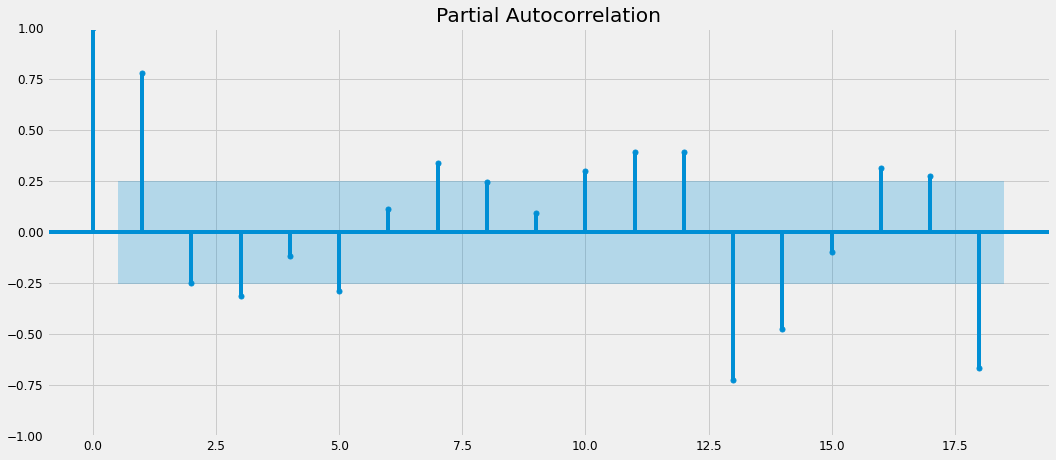

In [95]:
### ACF and PACF

acf = plot_acf(store4_monthly["sales"])
pacf = plot_pacf(store4_monthly["sales"])

SARIMA Model

In [96]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store4_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1106.847159277735
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:834.6017538881136
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:644.2158117290752


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1445.2279351845575
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:593.5378654425425
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:570.9103828684061
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:442.84610201732596


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1418.0270847611098
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1022.8663554330053
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:783.3359398573488
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:580.6385225645946
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1205.2752952874007


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:558.1491639023172
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:541.7011323380849


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:420.7298145315072


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1194.3916960491117
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:849.9740386612613
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:642.4453457012199
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:504.9375029716068


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1374.7148974102172
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:512.0275434100456
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:501.4790700172845
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:378.41253110382115
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1231.4953126126816
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:836.0521440471244
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:628.6914141622689
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:495.6297079113599


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1303.455214785922
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:512.065679168747


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:494.5265414805171
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:376.33616450993975


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:550.6263191189862
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:865.8279424380981
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:657.893913424069
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:515.6386043238858


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1237.5860012573373
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:510.55137682881144
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:509.9164669861479
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:379.8495866210872


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1233.4789152076373
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:852.3371381450899
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:645.3950033605215
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:507.45401819533765
SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1092.3695884367535
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:511.3205387870774


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:503.98612747946333
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:378.297265266883


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1064.3581031832734
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:849.8686734519663
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:642.3843285894404
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:506.63632728873387


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1334.657576780014
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:501.9765504645819


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:505.5430800338493
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:366.77630610579627


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:859.760321497898
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:837.1833911059848
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:630.4687232875044
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:497.61112838550156


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1286.315491805472
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:503.82420074634257


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:492.076154514322
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:368.27954018432854
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1137.083242311974


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC

SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:366.77630610579627

In [97]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store4_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -256.199
Date:                            Mon, 13 Mar 2023   AIC                            518.399
Time:                                    01:50:13   BIC                            523.949
Sample:                                01-01-2013   HQIC                           520.487
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0824      0.134     -0.617      0.537      -0.344       0.179
ar.S.L12      -0.0956      0.216     -0.442      0.659      -0.520       0.328
sigma2      3165.7669    512.162      6.181      0.000    2161.947    4169.586
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.57
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -1.13
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

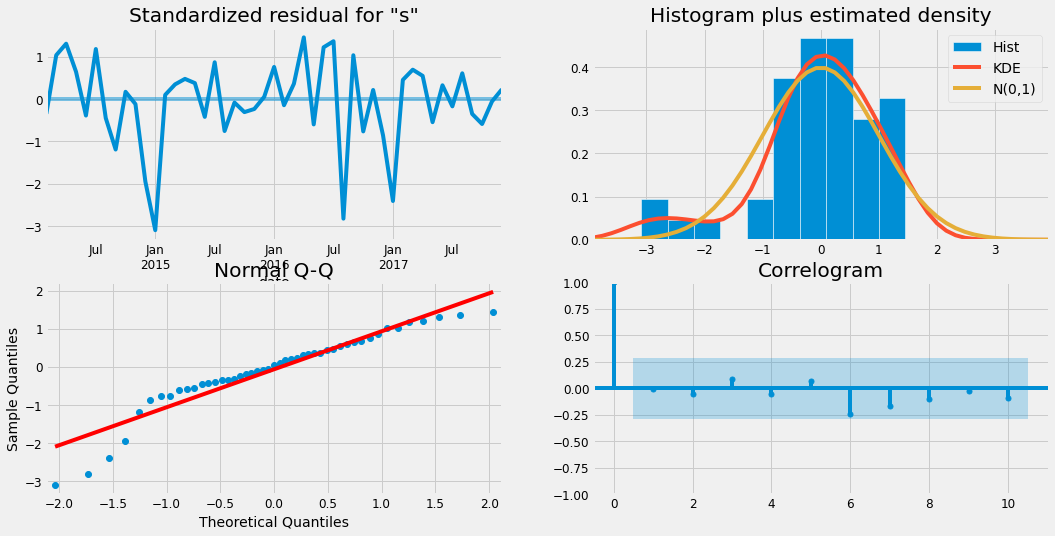

In [98]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

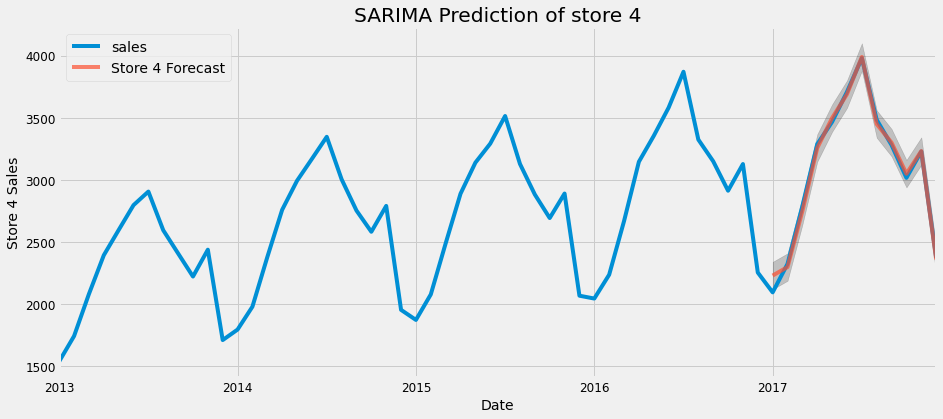

In [99]:
### Prediction using SARIMA Model

pred4 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred4_ci = pred4.conf_int()

ax = store4_monthly['2013':].plot(label = 'observed')
pred4.predicted_mean.plot(ax = ax, label = 'Store 4 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred4_ci.index, 
                pred4_ci.iloc[:,0],
                pred4_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 4")
ax.set_xlabel('Date')
ax.set_ylabel('Store 4 Sales')
plt.legend()
plt.show()

In [100]:
### Validating SARIMA Prediction - MSE, RMSE

store4_forecasted_sales = pred4.predicted_mean
store4_true_sales = store4_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store4_true_sales,store4_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of forecasts is 2135.51
The Root Mean Squared Error of forecasts is 46.21


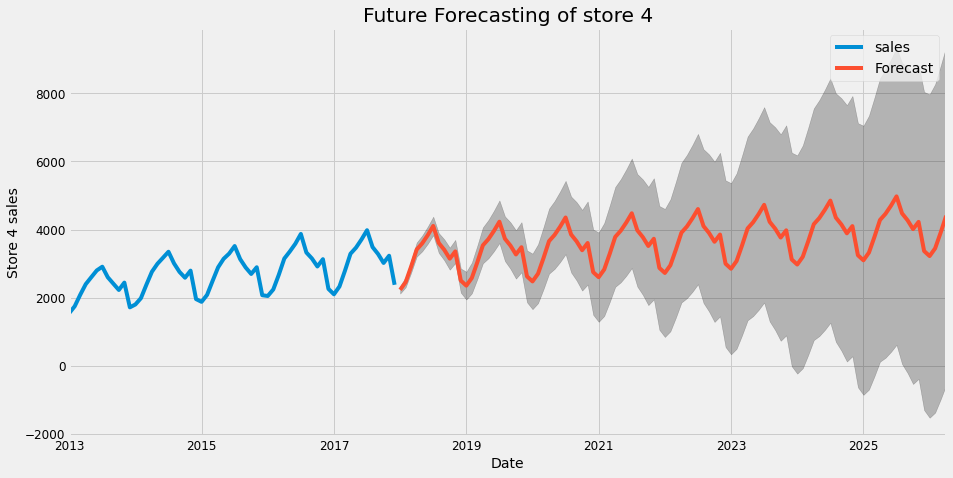

In [101]:
### Future Forecasting of store 4 using SARIMA

pred4_uc = results.get_forecast(steps = 100)
pred4_ci = pred4_uc.conf_int()

ax = store4_monthly.plot(label = 'observed', figsize=(14, 7))
pred4_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred4_ci.index,
                pred4_ci.iloc[:,0],
                pred4_ci.iloc[:,1],
                color = 'k',
                alpha = .25)

plt.title("Future Forecasting of store 4")
ax.set_xlabel('Date')
ax.set_ylabel('Store 4 sales')
plt.legend()
plt.show()

# Store 5 Model Building and Forecasting

In [102]:
## store 5
store5_sales = df[df['store'] == 5]
store5_daily = store5_sales.groupby("date").agg({"sales":"sum"})
store5_monthly = store5_daily.resample(rule='MS').mean()

<AxesSubplot:xlabel='date'>

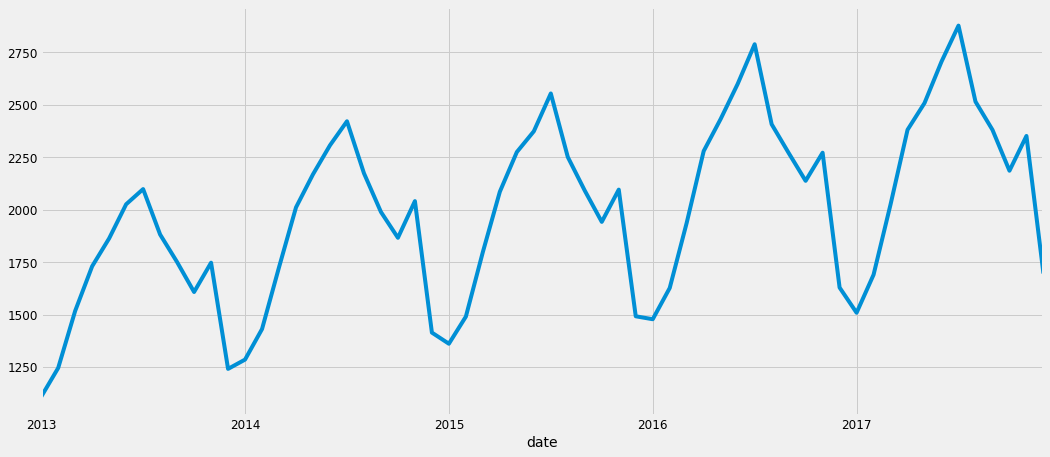

In [103]:
### Plotting Monthly sales of store 5

store5_monthly['sales'].plot(figsize=(16,7))

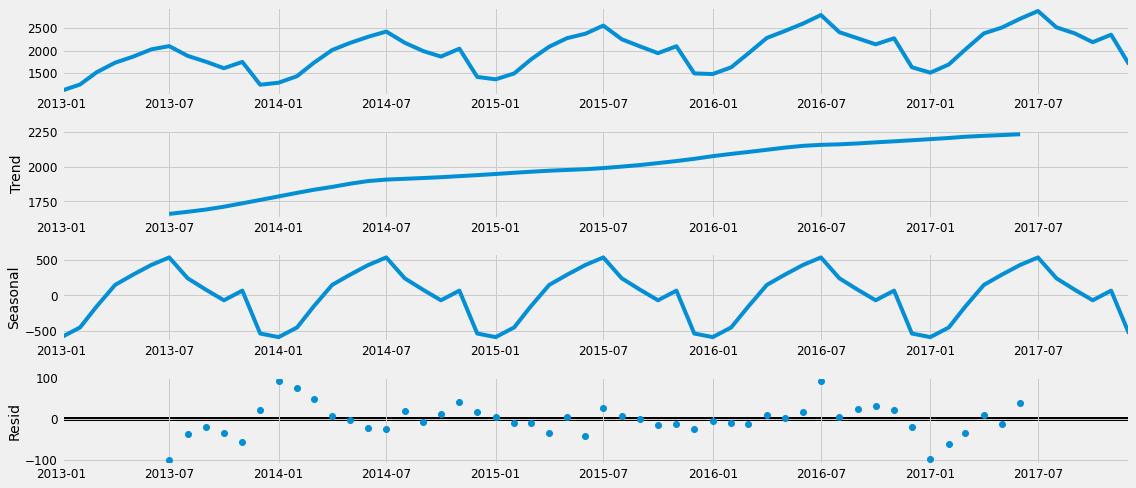

In [104]:
#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store5_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [105]:
### Stationarity Checking
adf_test(store5_monthly['sales'])

ADF Statistics: -5.148333432383087
p- value: 1.1198644934133354e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


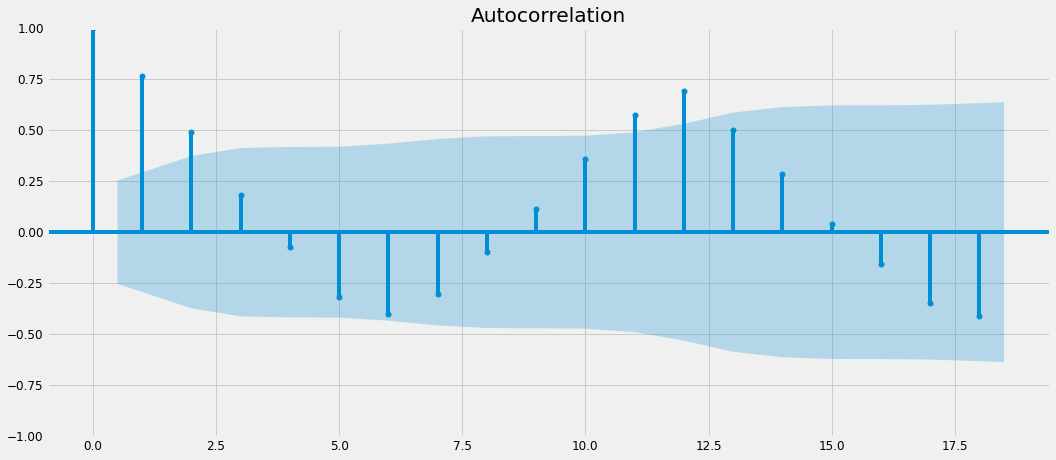

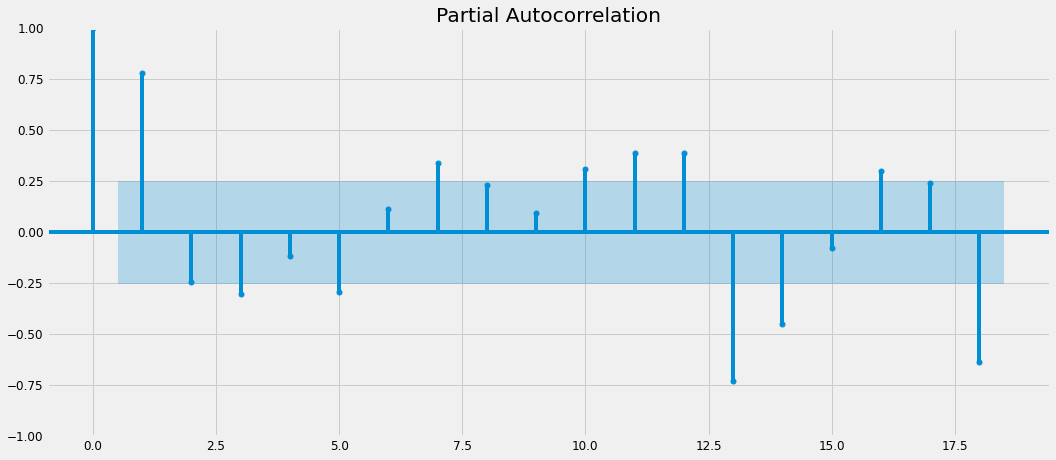

In [106]:
### ACF and PACF

acf = plot_acf(store5_monthly["sales"])
pacf = plot_pacf(store5_monthly["sales"])

SARIMA Model

In [107]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store5_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1068.825101645112
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:806.0185984759751
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:615.7587981236923
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1265.8226377574167
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:567.5396617102488


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:541.1762095122084
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:424.93188370995813
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1247.9591612580934
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:985.8035860214557


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:741.7675386483473
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:556.4747653142797


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1374.7859372341848
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:571.390200032893


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:515.9403174264975
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:402.1734589894592


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1215.4257850745498
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:813.6707078832849
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:614.9502045393701
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:481.5297749127977


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1706.9015767570702
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:486.6471316077922
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:476.820925508711
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:359.1393834978372


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1352.3504224080089
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:800.1921591647699
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:601.9374577032456
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:473.6867211650461


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1351.7718682728366
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:487.58329401053516


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:471.8874216814611
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:358.0993688761435


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1355.517563244335
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:828.8419487942764
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:629.8573443094617
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:491.5996132894243


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1407.0915736115205
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:485.3081759965261
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:484.279146101559
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:360.30797594763203


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1217.6108059120193
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:816.0389355039281
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:618.0920726324778
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:484.00661211305544


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1337.8930880721102
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:486.86806032683154
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:475.17633505351483
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:360.000237086425


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1152.2710263912504
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:813.5979232005491
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:615.1079801099548
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:483.4064079991883


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1710.825857153252
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:478.44530099527174
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:475.7213822486726
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:347.8779714247589


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1714.6207175787115
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:801.4106174927734
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:603.7755383945376
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:474.9965176518478
SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1661.5207096787512


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:480.4357550767051
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:468.19156094126737
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:349.7999554533164
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1665.2626077337077


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC 

SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:347.8779714247589

In [108]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store5_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -244.315
Date:                            Mon, 13 Mar 2023   AIC                            494.630
Time:                                    01:50:22   BIC                            500.180
Sample:                                01-01-2013   HQIC                           496.719
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0678      0.125     -0.541      0.589      -0.314       0.178
ar.S.L12      -0.0922      0.220     -0.419      0.675      -0.523       0.339
sigma2      1910.9571    369.162      5.176      0.000    1187.413    2634.502
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.20
Prob(Q):                              0.95   Prob(JB):                         0.07
Heteroskedasticity (H):               0.54   Skew:                            -0.80
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

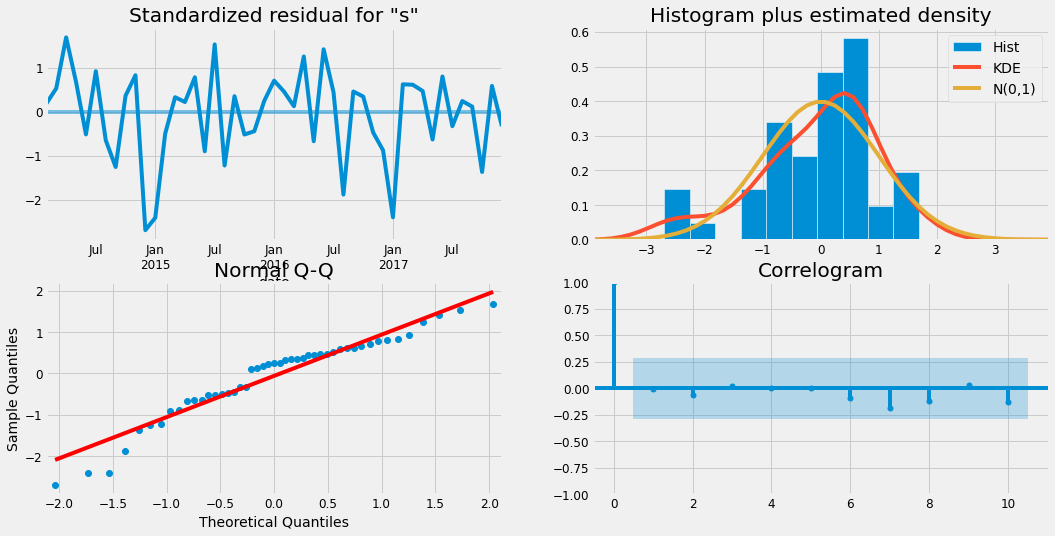

In [109]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

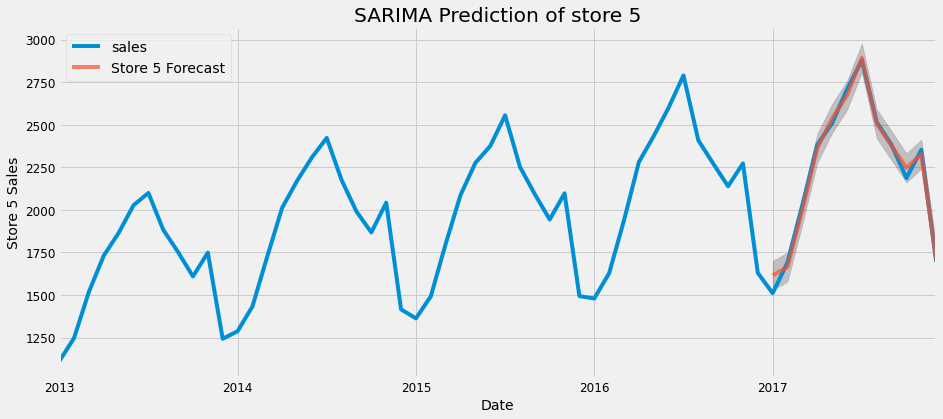

In [110]:
### Prediction using SARIMA Model

pred5 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred5_ci = pred5.conf_int()

ax = store5_monthly['2013':].plot(label = 'observed')
pred5.predicted_mean.plot(ax = ax, label = 'Store 5 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred5_ci.index, 
                pred5_ci.iloc[:,0],
                pred5_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 5")
ax.set_xlabel('Date')
ax.set_ylabel('Store 5 Sales')
plt.legend()
plt.show()

In [111]:
### Validating SARIMA Prediction - MSE, RMSE

store5_forecasted_sales = pred5.predicted_mean
store5_true_sales = store5_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store5_true_sales,store5_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of forecasts is 1638.28
The Root Mean Squared Error of forecasts is 40.48


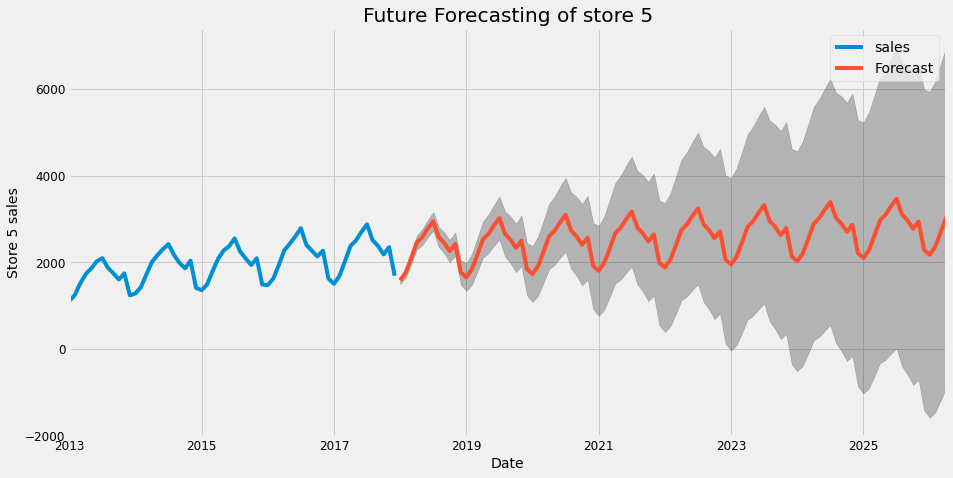

In [112]:
### Future Forecasting of store 3 using SARIMA

pred5_uc = results.get_forecast(steps = 100)
pred5_ci = pred5_uc.conf_int()

ax = store5_monthly.plot(label = 'observed', figsize=(14, 7))
pred5_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred5_ci.index,
                pred5_ci.iloc[:,0],
                pred5_ci.iloc[:,1],
                color = 'k',
                alpha = .25)

plt.title("Future Forecasting of store 5")
ax.set_xlabel('Date')
ax.set_ylabel('Store 5 sales')
plt.legend()
plt.show()

# Store 6 Model Building and Forecasting

In [113]:
## store 6
store6_sales = df[df['store'] == 6]
store6_daily = store6_sales.groupby("date").agg({"sales":"sum"})
store6_monthly = store6_daily.resample(rule='MS').mean()

<AxesSubplot:xlabel='date'>

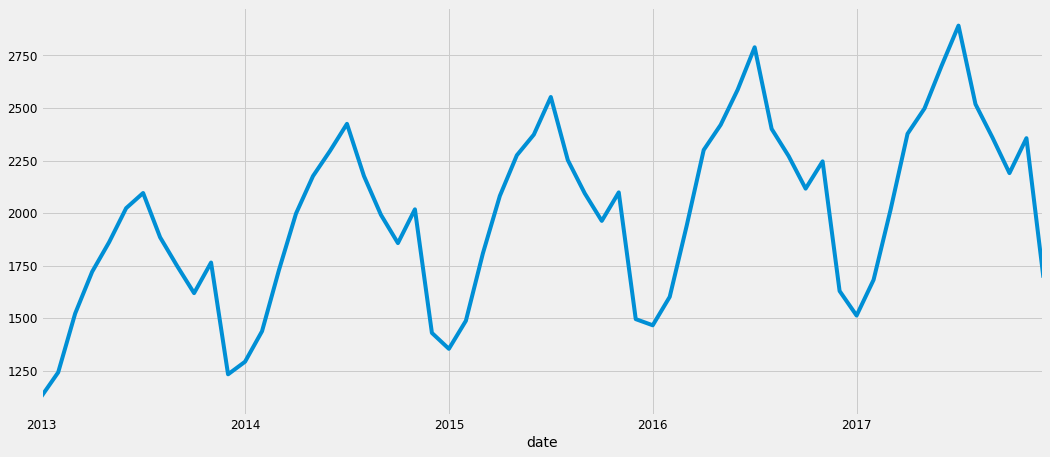

In [114]:
### Plotting Monthly sales of store 6

store6_monthly['sales'].plot(figsize=(16,7))

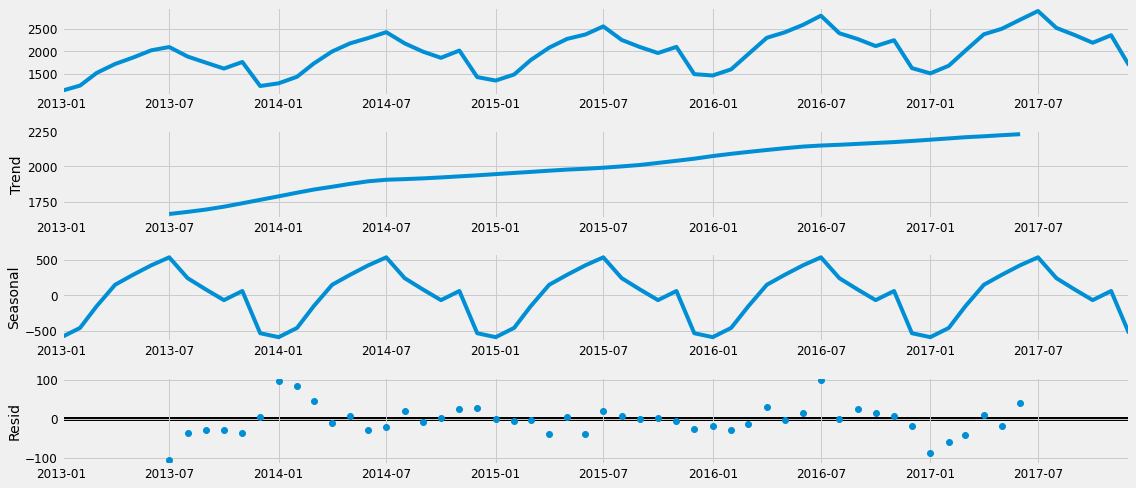

In [115]:

#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store6_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [116]:
### Stationarity Checking
adf_test(store6_monthly['sales'])

ADF Statistics: -5.501110833284762
p- value: 2.0703116289590655e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


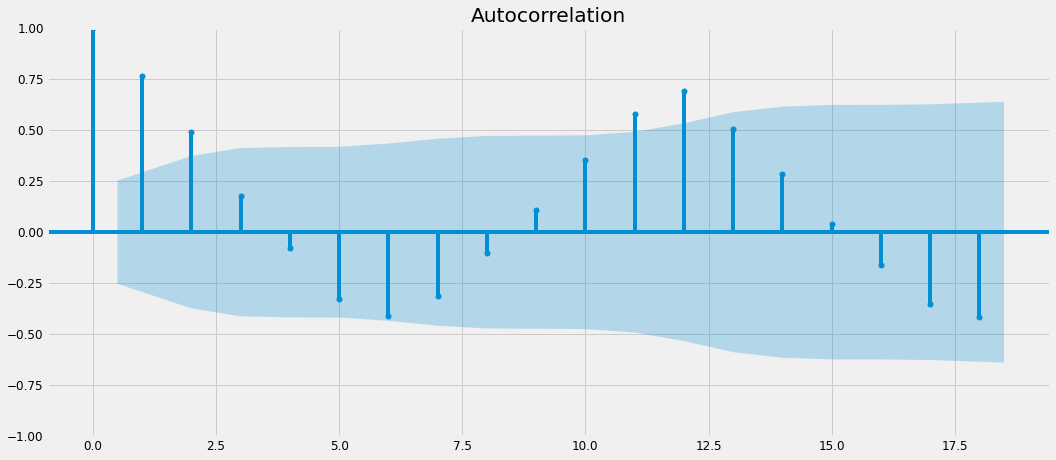

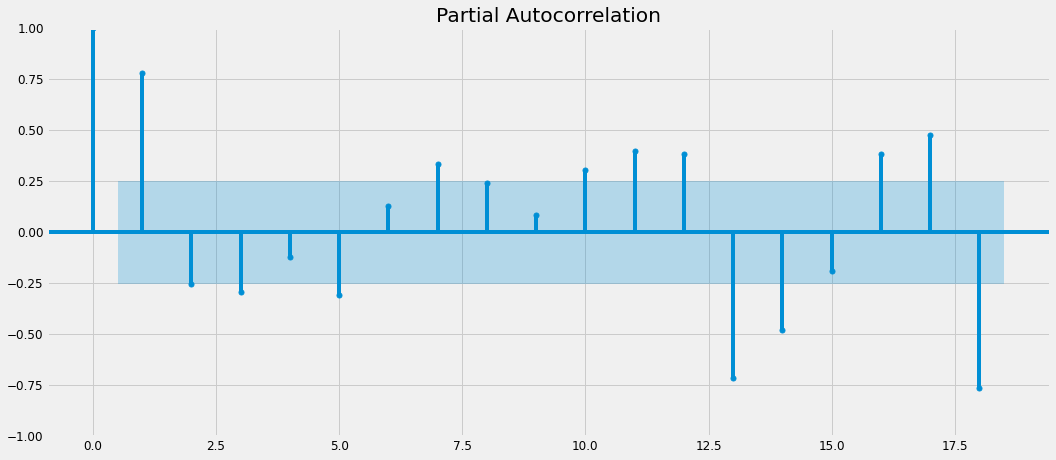

In [117]:
### ACF and PACF

acf = plot_acf(store6_monthly["sales"])
pacf = plot_pacf(store6_monthly["sales"])


SARIMA Model

In [118]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store6_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1068.688026233496
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:805.9803642503779
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:614.3793419364433


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1390.1111935058345
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:563.1695829430407
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:540.303592447008
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:418.69937718396466


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1315.6511940347577
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:985.6593737103856
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:741.5760477249868
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:551.860748297732
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1437.1226459049467


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:530.1188365672764
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:507.7134999005456
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:396.6507495139661


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1382.87396860083
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:813.4388132859677
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:614.2430874971616
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:481.19468094820985


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1626.647845727372
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:486.5386835755775
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:477.76028155137965
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:359.76078635033457


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1442.9275048370528
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:799.7545718957465
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:601.0799642110604
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:472.2481079256868


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1527.2945220746096
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:484.32818419536653
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:464.9623610553449
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:356.96203732981644


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1536.3545069765655
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:828.5259233653574
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:629.1406939026783
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:491.69140606802597


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1497.9820819667684
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:485.0857296140174


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:485.5882931676663
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:360.77084178335707


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1430.0953918976722
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:815.6637367128013
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:617.2054370050917
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:482.42246119270675


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1542.2080982028428
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:484.08478451306974
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:473.8013379079254
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:357.01981772432634


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1484.9137011135067
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:813.2253309170321
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:614.1698065755693
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:481.7903372481081


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1457.4626327435803
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:474.4805498366341


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:477.449214314155
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:344.7403472761695


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1465.6616687383926
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:801.0084804123836
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:602.9207834386023
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:474.2054284927037


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1591.4227751003473
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:476.3305529630981


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:466.13159772640915
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:345.9331042113319
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1599.089270197001


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC 

SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:344.7403472761695


In [119]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store6_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -243.797
Date:                            Mon, 13 Mar 2023   AIC                            493.595
Time:                                    01:50:31   BIC                            499.145
Sample:                                01-01-2013   HQIC                           495.683
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1729      0.158     -1.095      0.274      -0.483       0.137
ar.S.L12       0.0327      0.185      0.177      0.859      -0.330       0.395
sigma2      1874.3245    339.380      5.523      0.000    1209.153    2539.496
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.01
Prob(Q):                              0.93   Prob(JB):                         0.03
Heteroskedasticity (H):               0.35   Skew:                            -0.72
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

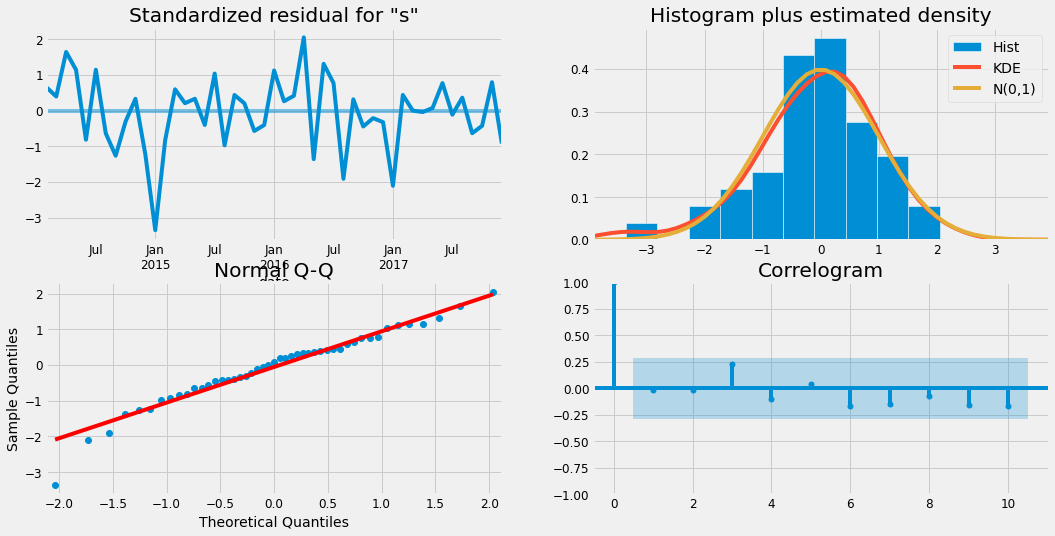

In [120]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

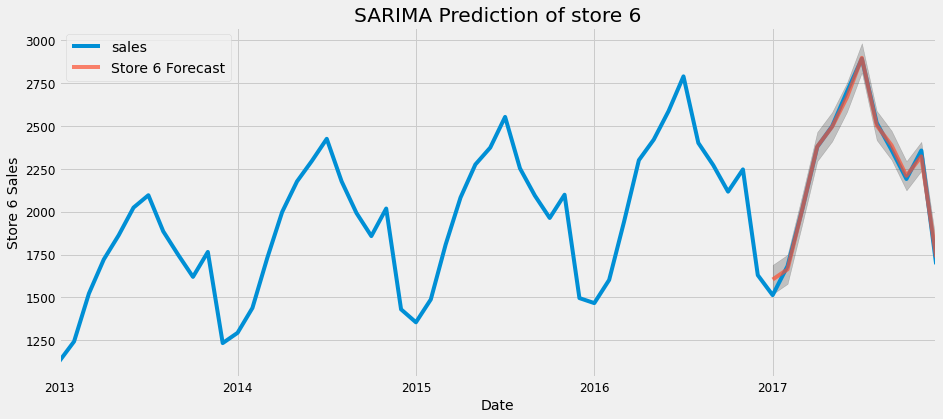

In [121]:
### Prediction using SARIMA Model

pred6 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred6_ci = pred6.conf_int()

ax = store6_monthly['2013':].plot(label = 'observed')
pred6.predicted_mean.plot(ax = ax, label = 'Store 6 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred6_ci.index, 
                pred6_ci.iloc[:,0],
                pred6_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 6")
ax.set_xlabel('Date')
ax.set_ylabel('Store 6 Sales')
plt.legend()
plt.show()

In [122]:
### Validating SARIMA Prediction - MSE, RMSE

store6_forecasted_sales = pred6.predicted_mean
store6_true_sales = store6_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store6_true_sales,store6_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))



The Mean Squared Error of forecasts is 1161.73
The Root Mean Squared Error of forecasts is 34.08


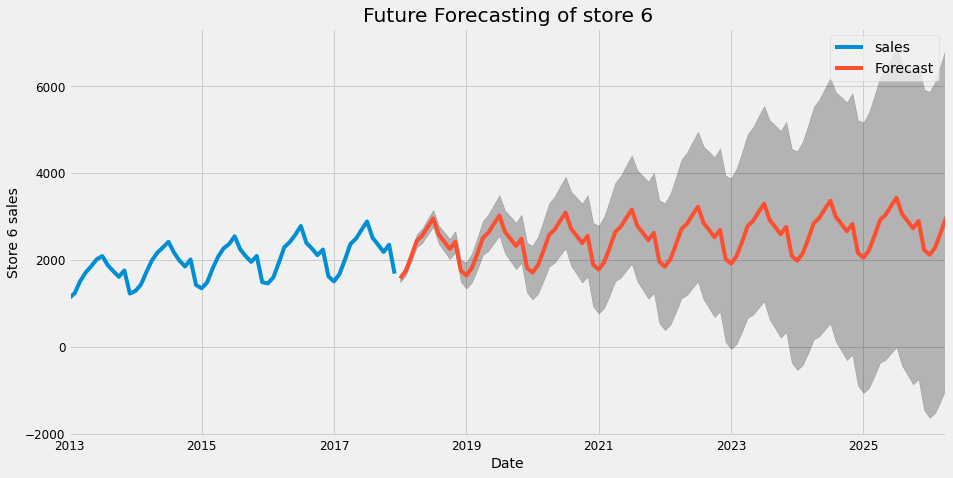

In [123]:
### Future Forecasting of store 6 using SARIMA

pred6_uc = results.get_forecast(steps = 100)
pred6_ci = pred6_uc.conf_int()

ax = store6_monthly.plot(label = 'observed', figsize=(14, 7))
pred6_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred6_ci.index,
                pred6_ci.iloc[:,0],
                pred6_ci.iloc[:,1],
                color = 'k',
                alpha = .25)

plt.title("Future Forecasting of store 6")
ax.set_xlabel('Date')
ax.set_ylabel('Store 6 sales')
plt.legend()
plt.show()

# Store 7 Model Building and Forecasting

In [124]:
## store 7
store7_sales = df[df['store'] == 7]
store7_daily = store7_sales.groupby("date").agg({"sales":"sum"})
store7_monthly = store7_daily.resample(rule='MS').mean()

<AxesSubplot:xlabel='date'>

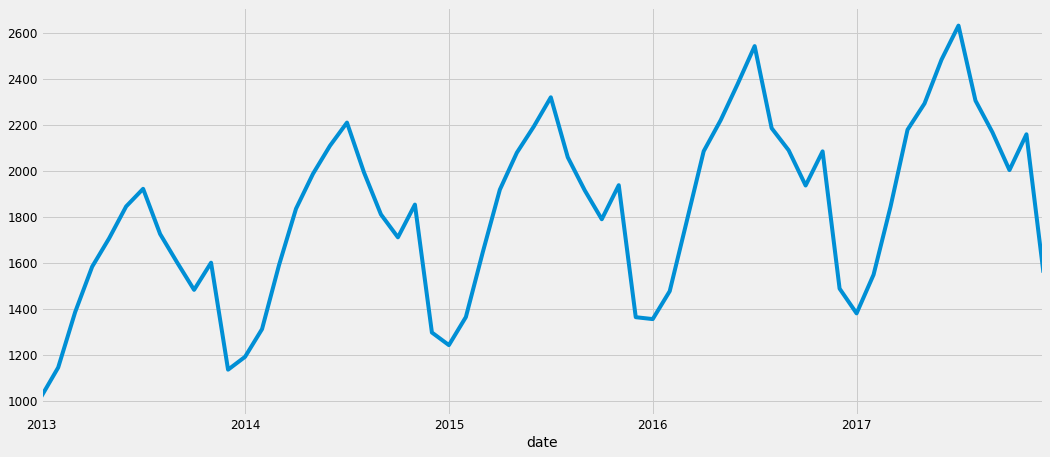

In [125]:
### Plotting Monthly sales of store 7

store7_monthly['sales'].plot(figsize=(16,7))

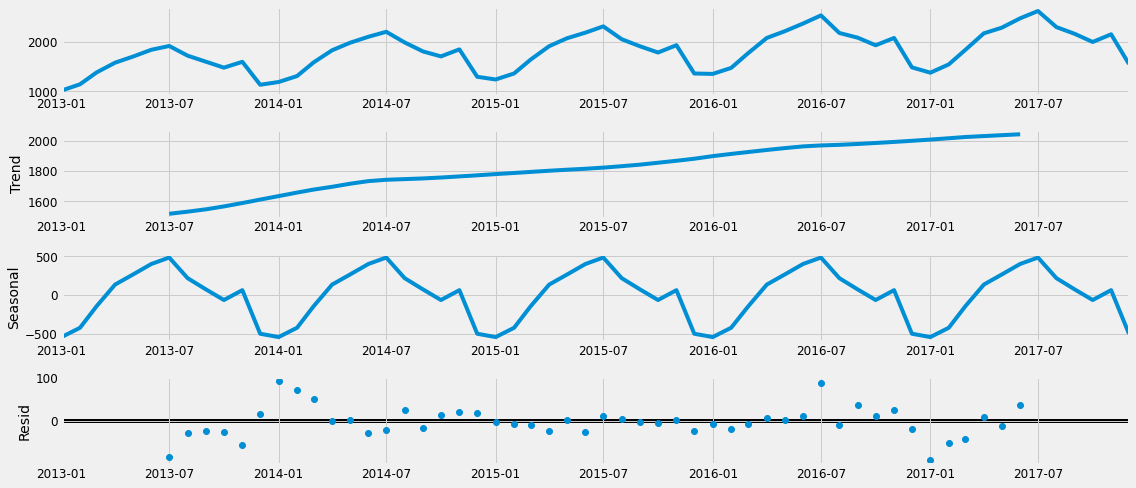

In [126]:

#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store7_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [127]:
### Stationarity Checking
adf_test(store7_monthly['sales'])

ADF Statistics: -5.576793718995491
p- value: 1.4261058275741573e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


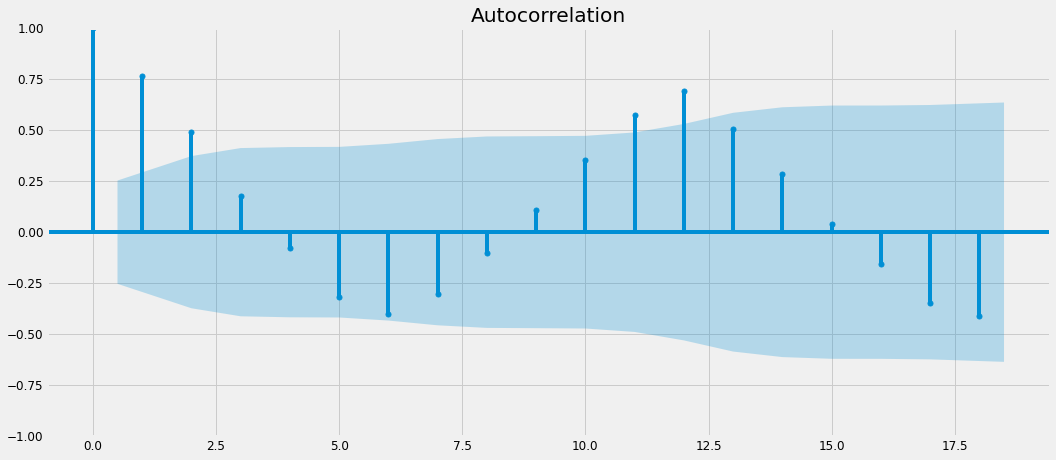

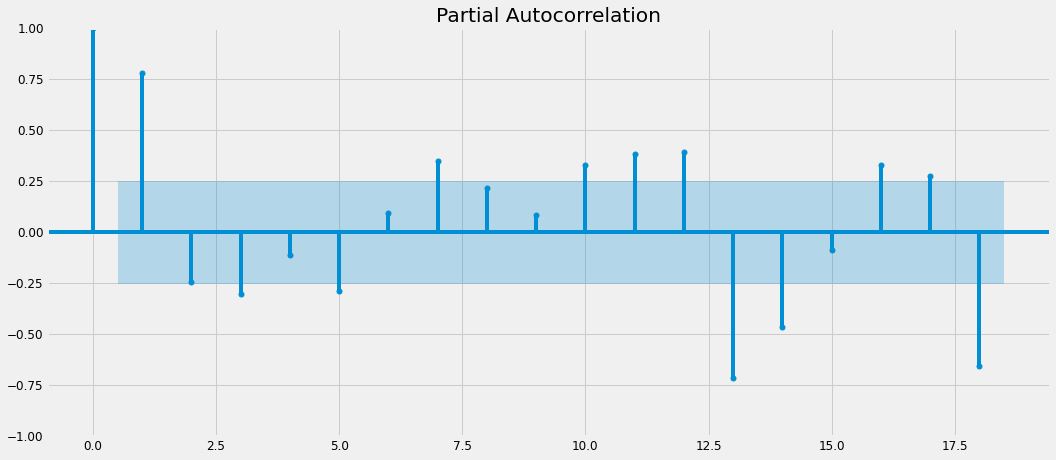

In [128]:
### ACF and PACF

acf = plot_acf(store7_monthly["sales"])
pacf = plot_pacf(store7_monthly["sales"])

SARIMA Model

In [129]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store7_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1058.2477535909243
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:798.5132035042708
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:606.3490562585255


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1710.3119102208145
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:555.3619496672654
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:530.3334111720493
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:412.6951843631768
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:389.0506653402139
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:975.4625837376119


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:782.4634737732005
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:548.8912482033849


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1443.8532448383685
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:559.2321076546641


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:497.6448897260382
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:394.99525090643493
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:364.9512356453032
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:803.3957356886018
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:644.3132320158667
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:472.81041996643427


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1020.472130288056
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:477.4139199071634
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:467.60884910544496
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:353.2812829446147
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1179.220433417505
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:790.2095093529614


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:631.4470843160732
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:463.8515744814753


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1059.666643592286
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:476.3016402567157


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:460.65951492603205
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:349.6717600848717


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1015.1954337352151
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:818.3973941201034
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:621.2709782019349
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:482.5810461542503


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1587.6688177393469
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:475.5724514848653
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:474.67290509030613
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:354.48114942363054
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:356.48114942326833
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:805.8205135085749
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:609.7232485059476
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:474.60708021519076
SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1476.2409810104657
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:475.5869558673989
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:464.90528959195365
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:350.83637893004936
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:343.05667130268426
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:803.4008975720799


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:644.8292806885894
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:473.8662868400137


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1099.8600735926225
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:466.69098007938777


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:469.70750595358027
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:338.09374485294927


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1047.9969248700158
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:791.4532540551891


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:631.7201901845318
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:465.82865784074215


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1197.9406117639119
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:468.68743704214717


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:464.05015427832546
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:340.0750160155062
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1153.1210376504619


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC

SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:338.09374485294927

In [130]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store7_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -239.551
Date:                            Mon, 13 Mar 2023   AIC                            485.101
Time:                                    01:50:41   BIC                            490.652
Sample:                                01-01-2013   HQIC                           487.190
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1399      0.132     -1.059      0.290      -0.399       0.119
ar.S.L12      -0.0257      0.173     -0.149      0.882      -0.364       0.313
sigma2      1563.9227    286.865      5.452      0.000    1001.677    2126.169
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.16
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -1.20
Prob(H) (two-sided):                  0.20   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

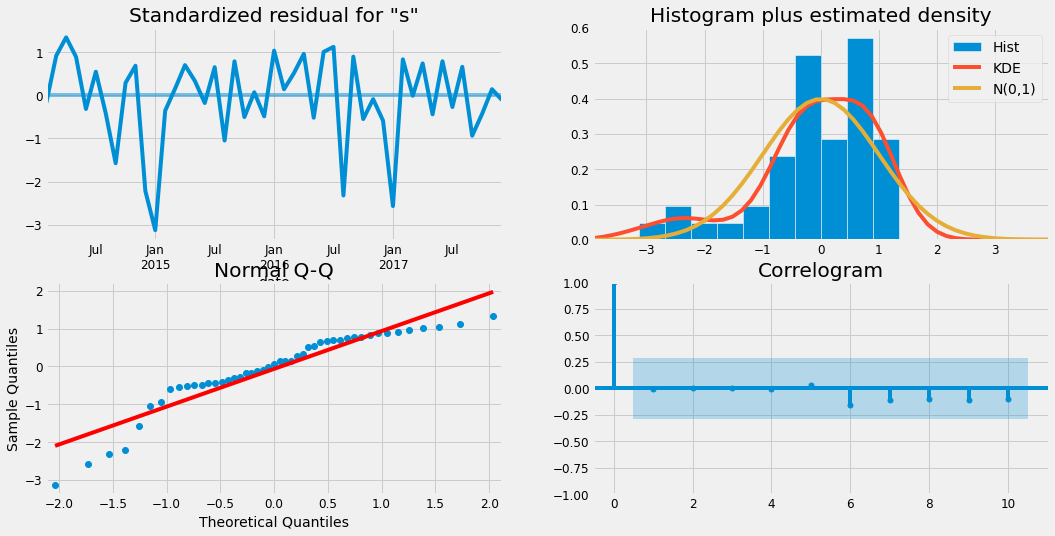

In [131]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

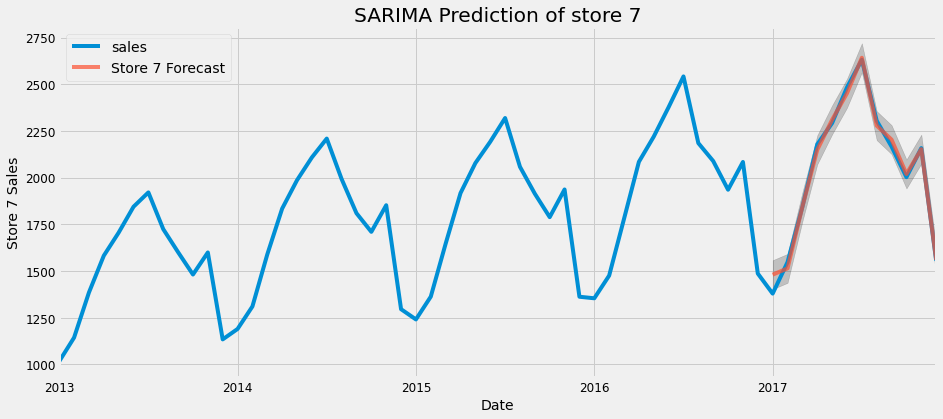

In [132]:
### Prediction using SARIMA Model

pred7 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred7_ci = pred7.conf_int()

ax = store7_monthly['2013':].plot(label = 'observed')
pred7.predicted_mean.plot(ax = ax, label = 'Store 7 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred7_ci.index, 
                pred7_ci.iloc[:,0],
                pred7_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 7")
ax.set_xlabel('Date')
ax.set_ylabel('Store 7 Sales')
plt.legend()
plt.show()

In [133]:
### Validating SARIMA Prediction - MSE, RMSE

store7_forecasted_sales = pred7.predicted_mean
store7_true_sales = store7_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store7_true_sales, store7_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of forecasts is 1333.42
The Root Mean Squared Error of forecasts is 36.52


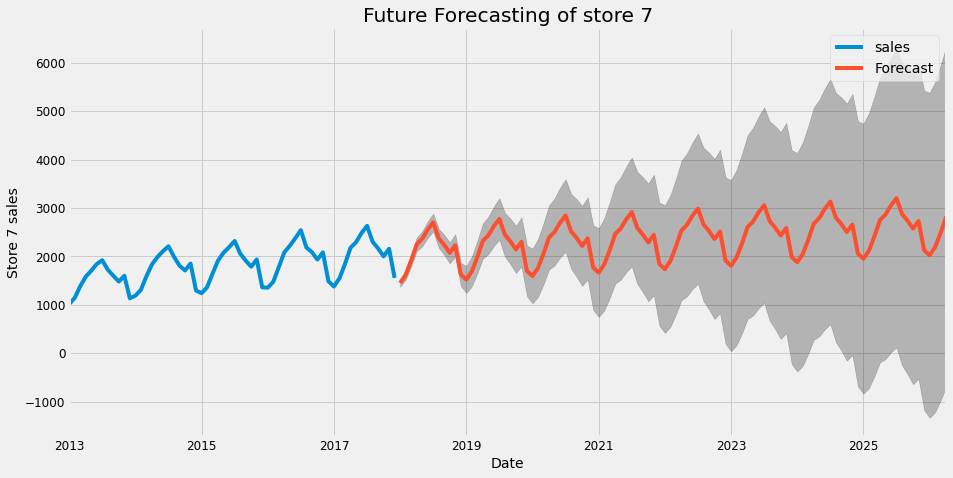

In [134]:
### Future Forecasting of store 3 using SARIMA

pred7_uc = results.get_forecast(steps = 100)
pred7_ci = pred7_uc.conf_int()

ax = store7_monthly.plot(label = 'observed', figsize=(14, 7))
pred7_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred7_ci.index,
                pred7_ci.iloc[:,0],
                pred7_ci.iloc[:,1],
                color = 'k',
                alpha = .25)

plt.title("Future Forecasting of store 7")
ax.set_xlabel('Date')
ax.set_ylabel('Store 7 sales')
plt.legend()
plt.show()

# Store 8 Model Building and Forecasting

In [135]:
## store 8
store8_sales = df[df['store'] == 8]
store8_daily = store8_sales.groupby("date").agg({"sales":"sum"})
store8_monthly = store8_daily.resample(rule='MS').mean()

<AxesSubplot:xlabel='date'>

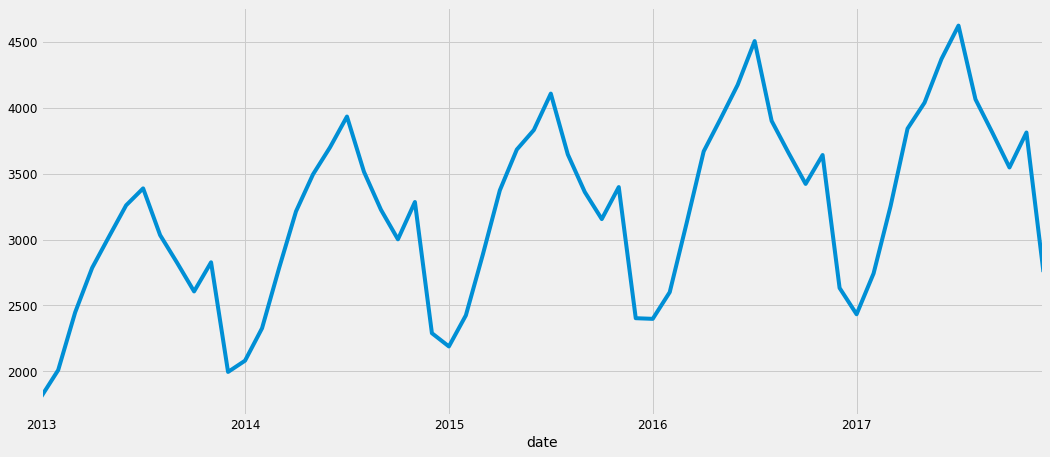

In [136]:
### Plotting Monthly sales mean of store 8

store8_monthly['sales'].plot(figsize=(16,7))

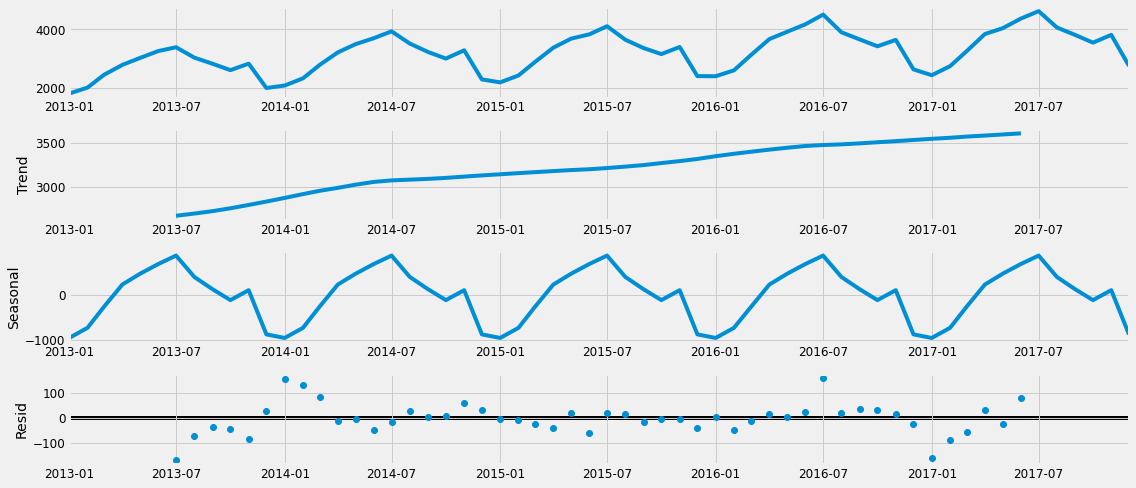

In [137]:
#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store8_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [138]:
### Stationarity Checking
adf_test(store8_monthly['sales'])

ADF Statistics: -5.323105157184493
p- value: 4.903402147408548e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


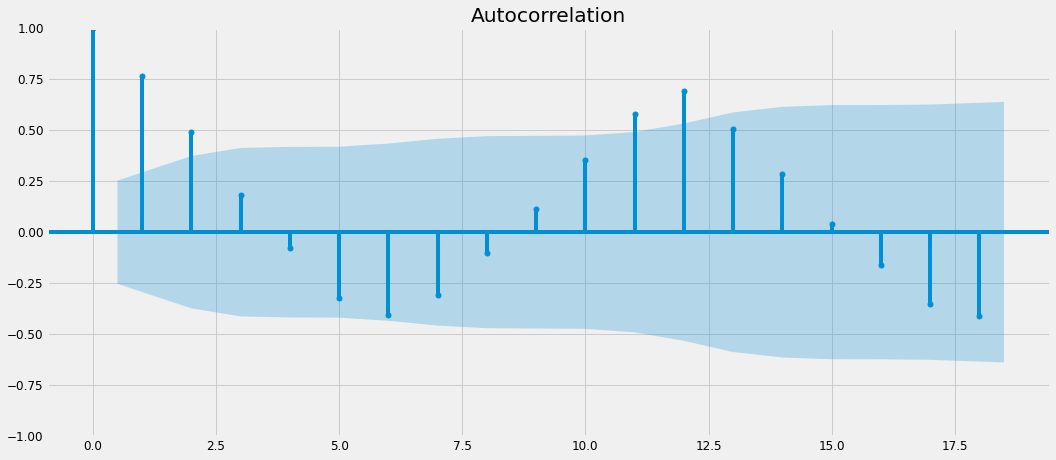

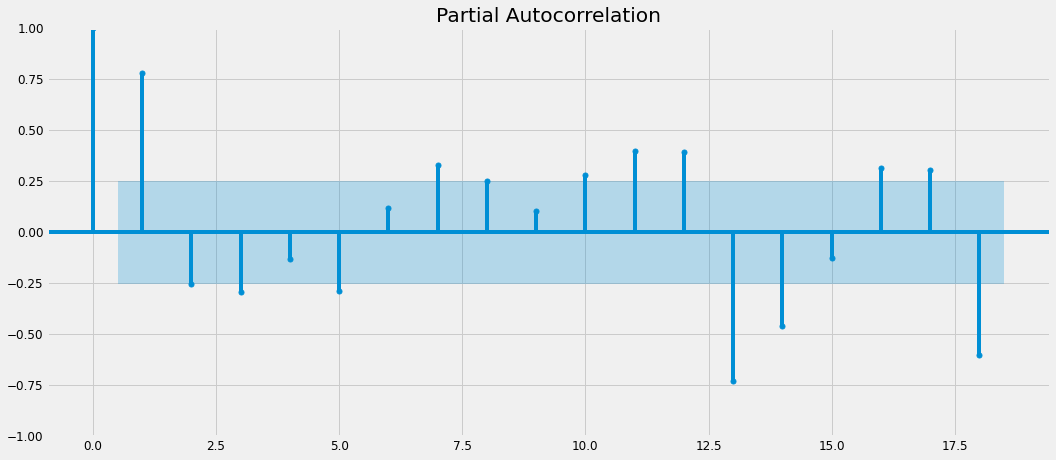

In [139]:
### ACF and PACF

acf = plot_acf(store8_monthly["sales"])
pacf = plot_pacf(store8_monthly["sales"])

SARIMA Model

In [140]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store8_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1125.2020165448444
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:849.1135622281689
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:659.9436186197927


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1368.4402308405045
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:610.5873694439393
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:589.5169857254663
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:455.29728745203056


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1254.6760765218671
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1040.2995706468419
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:788.5649051609377
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:600.9013610652754


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1592.5884425585018
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:580.9931103190418
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:555.4465801239039
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:436.6726295172542


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1417.0762324317632
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:868.7001163845349
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:696.1565314584975
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:527.3673467981075


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1214.2411204008106
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:534.9900969164222
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:523.1182700510102
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:394.7471398754112
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1024.6708153915667
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:854.2061480145978


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:681.728653290027
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.4013946309474


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1095.1541784838219
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:533.1497300237393
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:509.4420237560888
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:390.6488313252373


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:906.9291167417105
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:884.7789211579568
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:673.478618830322
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:538.784034646495
SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1505.8217395125712
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:533.3791078343451
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:531.714050998472
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:396.0309452685098
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1260.7024490889803
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:870.9850234511775
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:660.7523541876305
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:528.522848292612


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1447.2329664609947
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:532.6682914839995
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:519.1405816842263
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:393.48351256146486


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1209.0398753173574
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:868.5810491745502
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:696.0057407035906
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:527.9160615447706


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1175.5489021386122
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:522.4023028635629
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:519.2325867377742
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:378.93043853507345


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:987.4414553997358
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:855.4908016443587


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:683.5385790116769
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:519.3758074095709


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1198.9557485192906
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:528.6625574900802
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:510.6736907511989
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:380.5186413723964
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1016.0374151056877


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC

SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:378.93043853507345


In [141]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store8_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -267.102
Date:                            Mon, 13 Mar 2023   AIC                            540.204
Time:                                    01:50:51   BIC                            545.754
Sample:                                01-01-2013   HQIC                           542.293
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1746      0.129     -1.358      0.174      -0.427       0.077
ar.S.L12      -0.1351      0.191     -0.709      0.478      -0.509       0.238
sigma2      5013.5199   1038.989      4.825      0.000    2977.139    7049.901
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.85
Prob(Q):                              0.93   Prob(JB):                         0.02
Heteroskedasticity (H):               0.52   Skew:                            -0.91
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

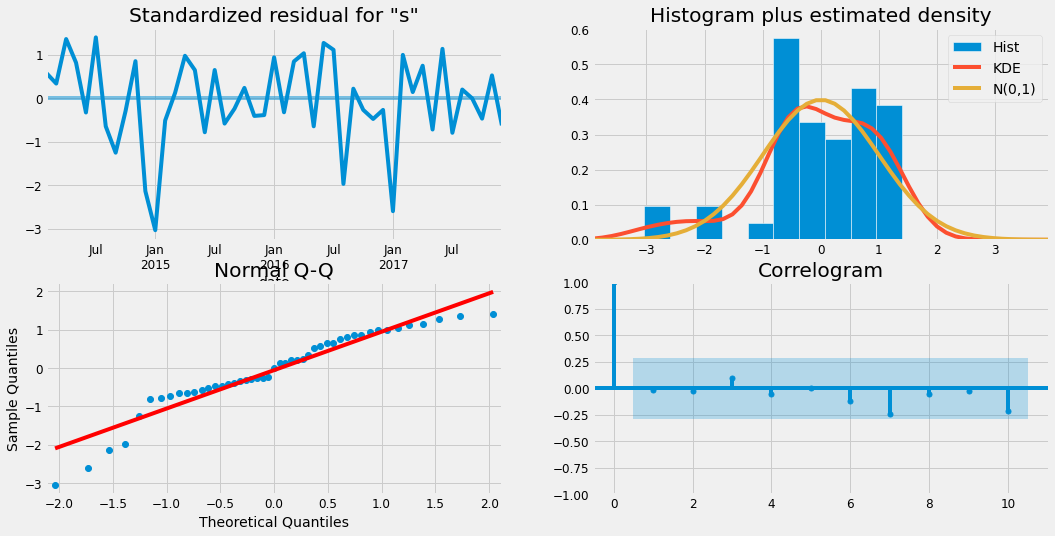

In [142]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

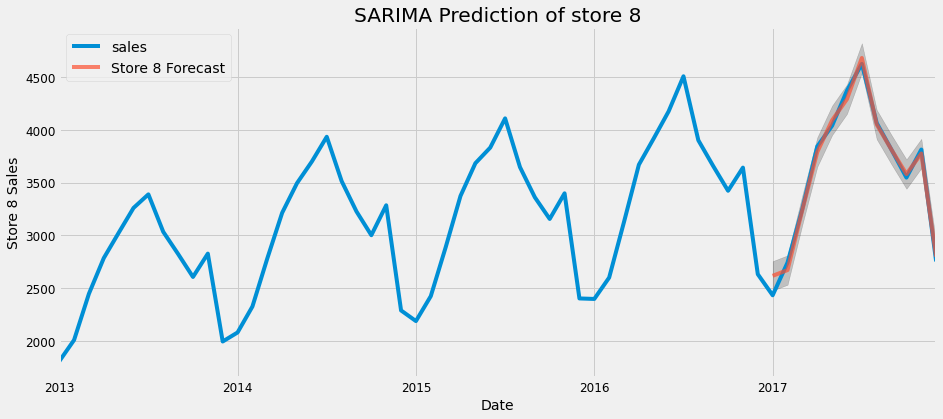

In [143]:
### Prediction using SARIMA Model

pred8 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred8_ci = pred8.conf_int()

ax = store8_monthly['2013':].plot(label = 'observed')
pred8.predicted_mean.plot(ax = ax, label = 'Store 8 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred8_ci.index, 
                pred8_ci.iloc[:,0],
                pred8_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 8")
ax.set_xlabel('Date')
ax.set_ylabel('Store 8 Sales')
plt.legend()
plt.show()

In [144]:
### Validating SARIMA Prediction - MSE, RMSE

store8_forecasted_sales = pred8.predicted_mean
store8_true_sales = store8_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store8_true_sales,store8_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of forecasts is 4884.36
The Root Mean Squared Error of forecasts is 69.89


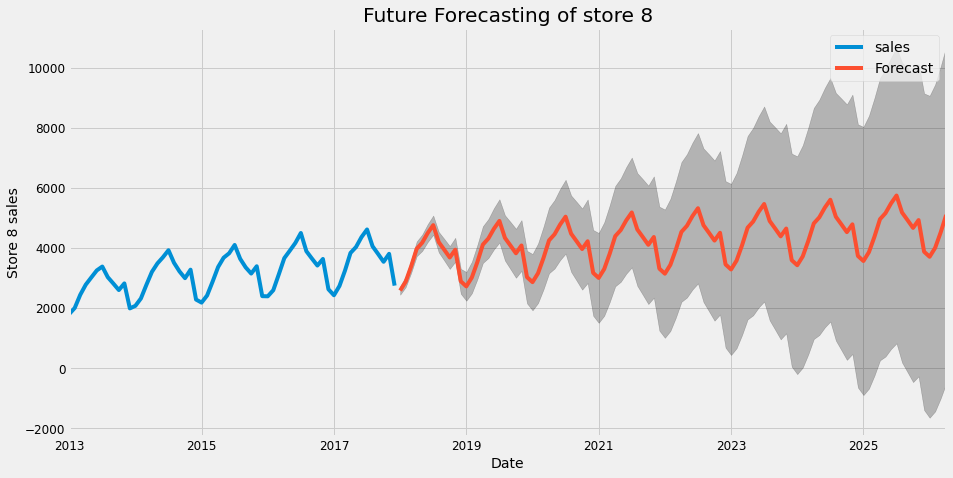

In [145]:
### Future Forecasting of store 8 using SARIMA

pred8_uc = results.get_forecast(steps = 100)
pred8_ci = pred8_uc.conf_int()

ax = store8_monthly.plot(label = 'observed', figsize=(14, 7))
pred8_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred8_ci.index,
                pred8_ci.iloc[:,0],
                pred8_ci.iloc[:,1],
                color = 'k',
                alpha = .25)

plt.title("Future Forecasting of store 8")
ax.set_xlabel('Date')
ax.set_ylabel('Store 8 sales')
plt.legend()
plt.show()

# Store 9 Model Building and Forecasting

In [146]:
## store 9
store9_sales = df[df['store'] == 9]
store9_daily = store9_sales.groupby("date").agg({"sales":"sum"})
store9_monthly = store9_daily.resample(rule='MS').mean()

<AxesSubplot:xlabel='date'>

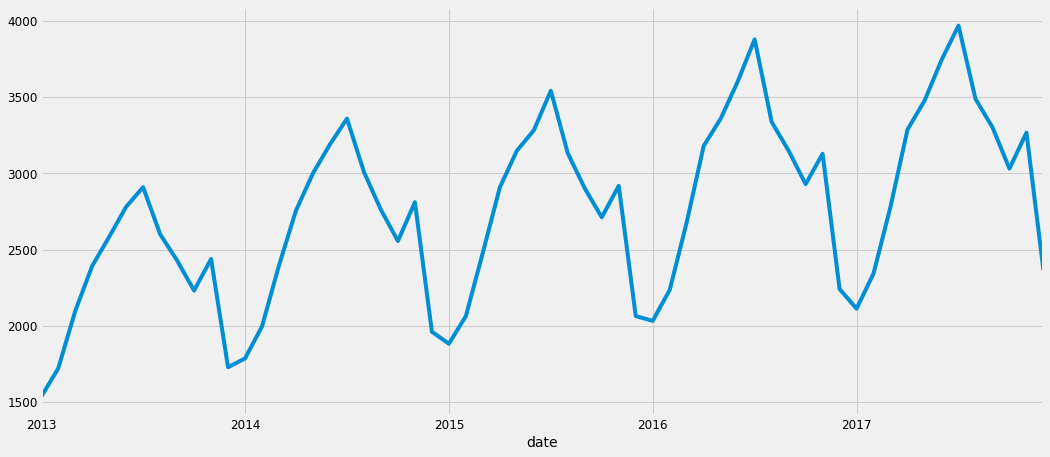

In [147]:
### Plotting Monthly sales mean of store 9

store9_monthly['sales'].plot(figsize=(16,7))

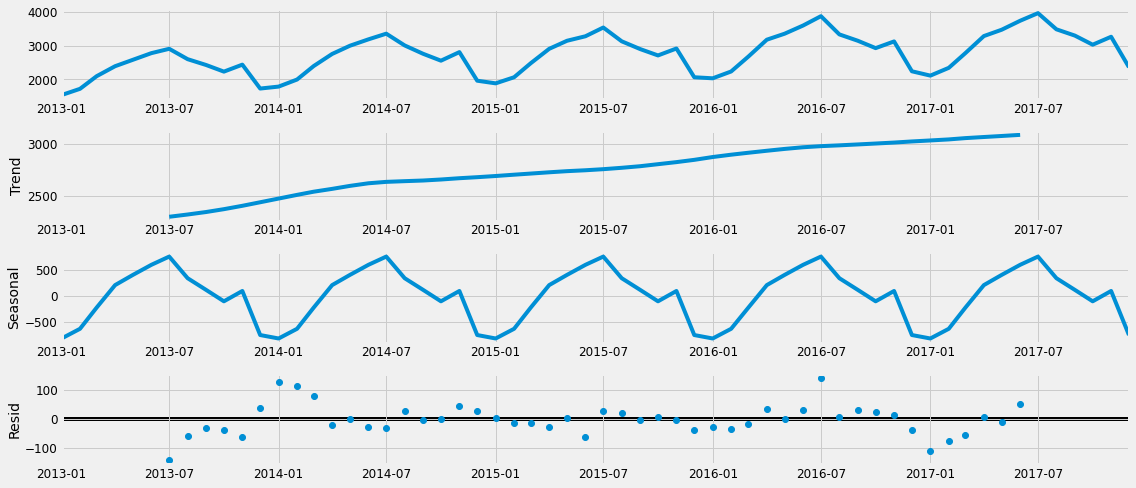

In [148]:
#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store9_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [149]:
### Stationarity Checking
adf_test(store9_monthly['sales'])

ADF Statistics: -5.528049640483719
p- value: 1.8138148623980684e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


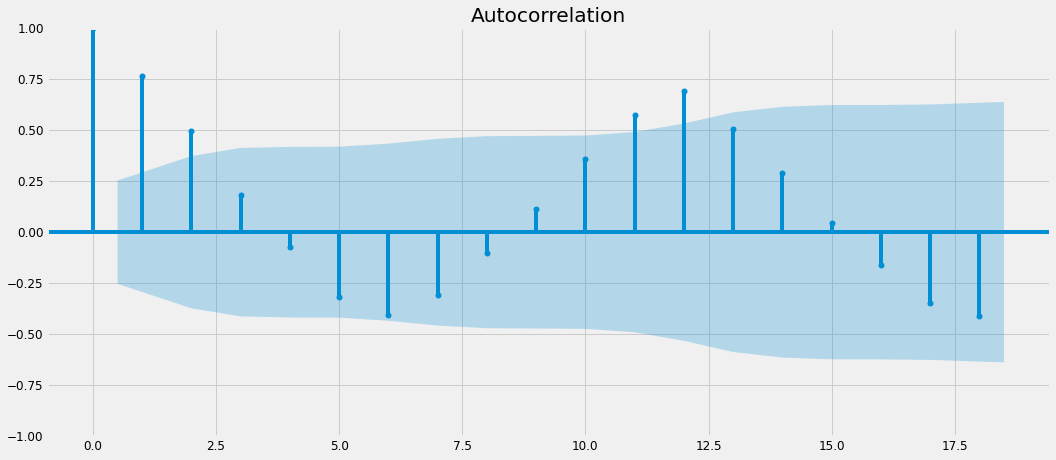

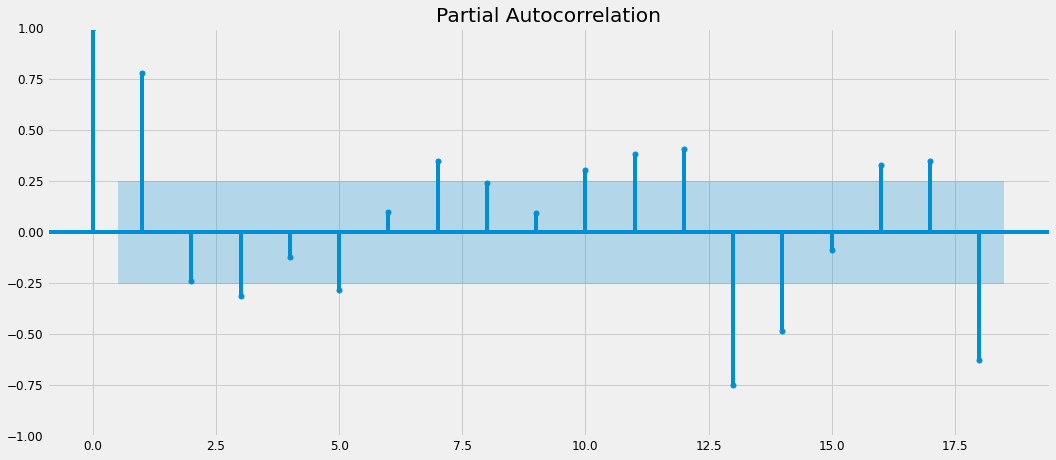

In [150]:
### ACF and PACF

acf = plot_acf(store9_monthly["sales"])
pacf = plot_pacf(store9_monthly["sales"])

SARIMA Model

In [151]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store9_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1107.188313695573
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:834.8906624315566
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:645.4733515487987


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1115.2467371748305
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:595.1343485833986
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:572.530943803675
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:442.74418955669427


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1353.2776070957575
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1023.309529723664
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:770.6364075014278
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:579.544974941885


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1360.9368962264566
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:556.6110194180822
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:533.7033978068679
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:415.3892102685735


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1176.0753464204986
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:851.6217819704743
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:643.8008089387351
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:504.0028662254272


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1328.425707675915
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:509.74711314444636
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:500.21041369605166
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:378.5313133083528


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:933.0269739459528
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:837.7148747389474


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:632.2909214718238
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:495.6564442777664
SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1543.138308225998
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:510.39766460155784


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:494.36854232271855
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:377.4543265446443


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1471.6441255474074
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:867.4338430191625
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:699.1909708170107
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:514.8442084972082
SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1428.6288072340478
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:508.47960172022874
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:508.5051390236568
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:379.7878436005947
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1225.0548426411513
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:854.1986093275225
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:647.1377360383354
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:506.4474843863939


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1367.1942545736997
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:509.6667858435558
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:498.86394750208814
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:378.14009173617484


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1169.4940023521615
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:851.8114609204948
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:644.1600834855692
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:505.82847309101606
SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1344.502347988258
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:500.7697919420326
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:499.9459540724916
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:365.9568759425021


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1137.3857687017166
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:838.9241429139952
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:632.1829523555006
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:495.464745557303
SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1227.3155821463536


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:504.24553780037047
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:491.7399803330593
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:370.8396203261535
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1157.0106496962846


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC

SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:365.9568759425021

In [152]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store9_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -255.955
Date:                            Mon, 13 Mar 2023   AIC                            517.910
Time:                                    01:51:00   BIC                            523.461
Sample:                                01-01-2013   HQIC                           519.999
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0598      0.125     -0.480      0.631      -0.304       0.185
ar.S.L12       0.0168      0.181      0.093      0.926      -0.338       0.372
sigma2      3146.4114    620.579      5.070      0.000    1930.100    4362.723
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.33
Prob(Q):                              0.95   Prob(JB):                         0.19
Heteroskedasticity (H):               0.37   Skew:                            -0.64
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

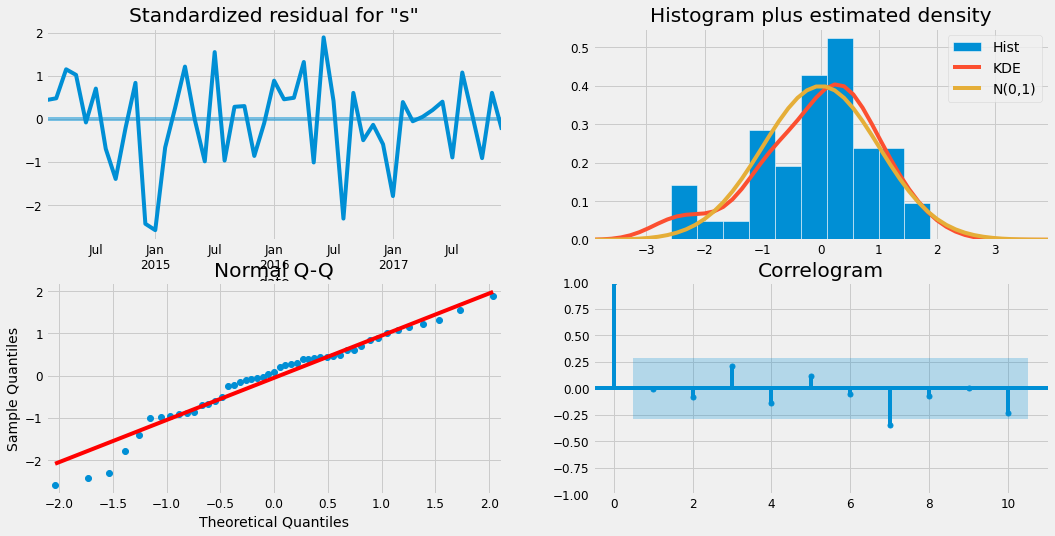

In [153]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

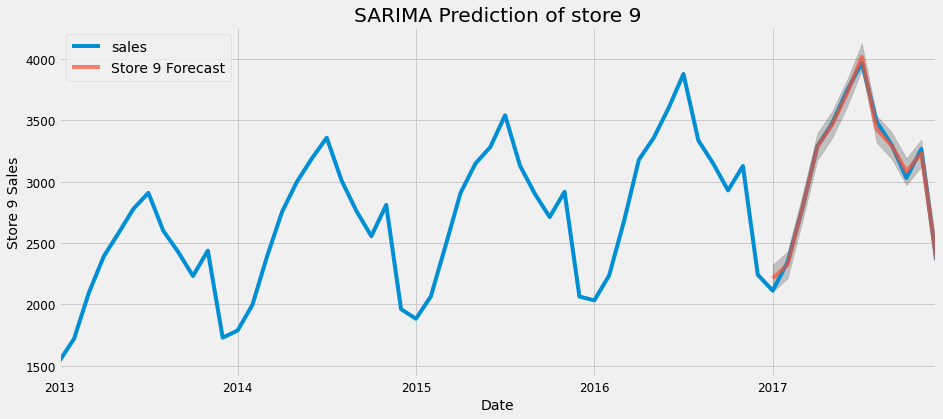

In [154]:
### Prediction using SARIMA Model

pred9 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred9_ci = pred9.conf_int()

ax = store9_monthly['2013':].plot(label = 'observed')
pred9.predicted_mean.plot(ax = ax, label = 'Store 9 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred9_ci.index, 
                pred9_ci.iloc[:,0],
                pred9_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 9")
ax.set_xlabel('Date')
ax.set_ylabel('Store 9 Sales')
plt.legend()
plt.show()

In [155]:
### Validating SARIMA Prediction - MSE, RMSE

store9_forecasted_sales = pred9.predicted_mean
store9_true_sales = store9_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store9_true_sales,store9_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of forecasts is 1776.45
The Root Mean Squared Error of forecasts is 42.15


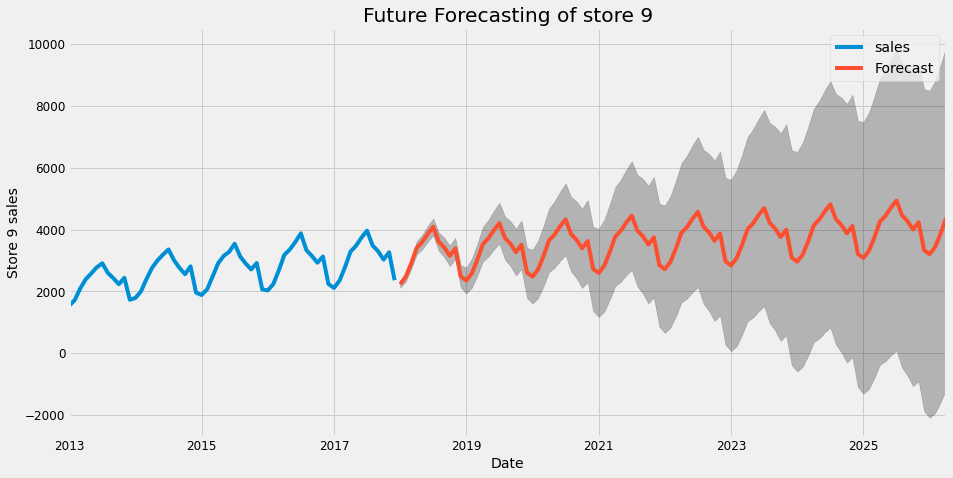

In [156]:
### Future Forecasting of store 9 using SARIMA

pred9_uc = results.get_forecast(steps = 100)
pred9_ci = pred9_uc.conf_int()

ax = store9_monthly.plot(label = 'observed', figsize=(14, 7))
pred9_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred9_ci.index,
                pred9_ci.iloc[:,0],
                pred9_ci.iloc[:,1],
                color = 'k',
                alpha = .25)

plt.title("Future Forecasting of store 9")
ax.set_xlabel('Date')
ax.set_ylabel('Store 9 sales')
plt.legend()
plt.show()

# Store 10 Model Building and Forecasting

In [157]:
## store 10
store10_sales = df[df['store'] == 10]
store10_daily = store10_sales.groupby("date").agg({"sales":"sum"})
store10_monthly = store10_daily.resample(rule='MS').mean()


<AxesSubplot:xlabel='date'>

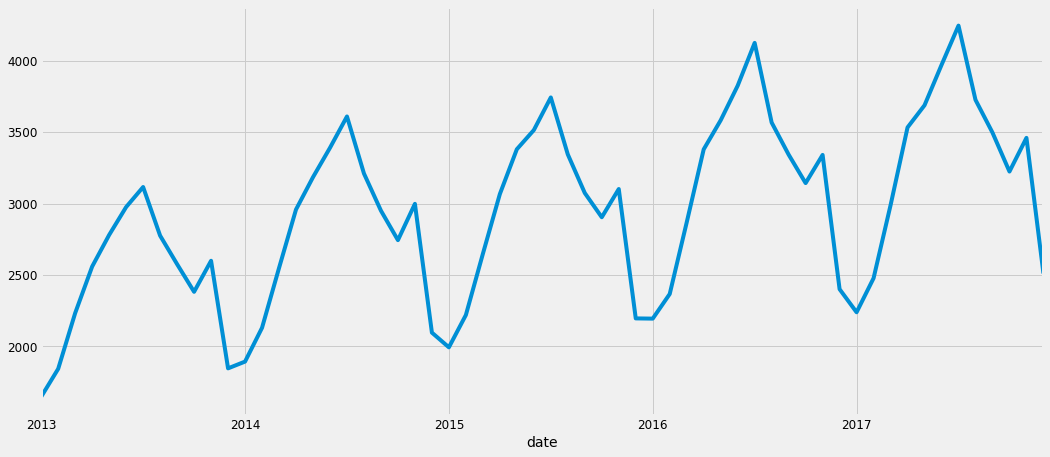

In [158]:
### Plotting Monthly sales mean of store 10

store10_monthly['sales'].plot(figsize=(16,7))

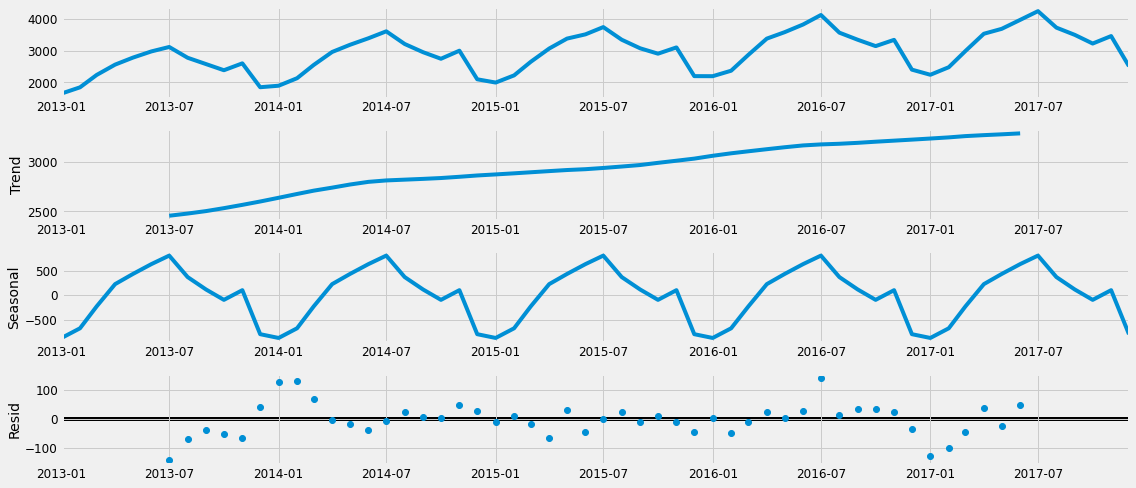

In [159]:

#### Decomposition plot

import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store10_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

In [160]:
### Stationarity Checking
adf_test(store10_monthly['sales'])

ADF Statistics: -5.275953872662052
p- value: 6.139882175356997e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


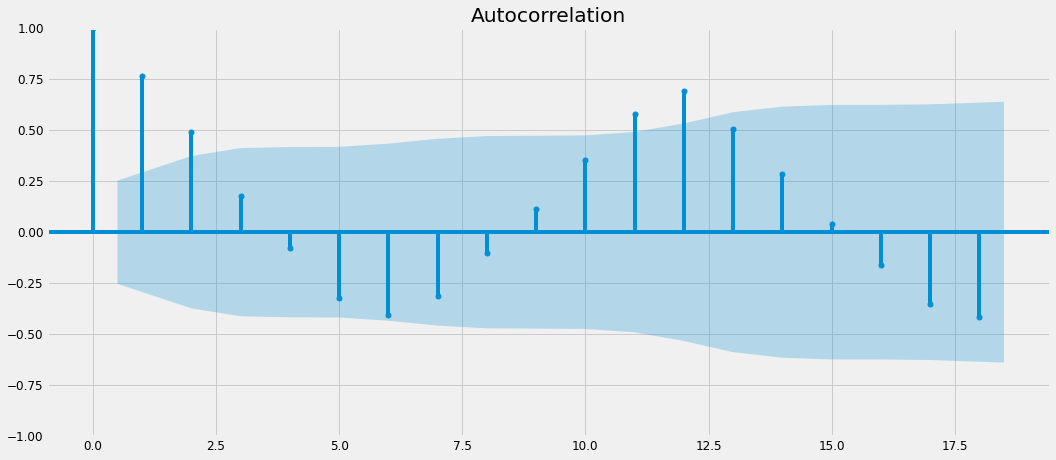

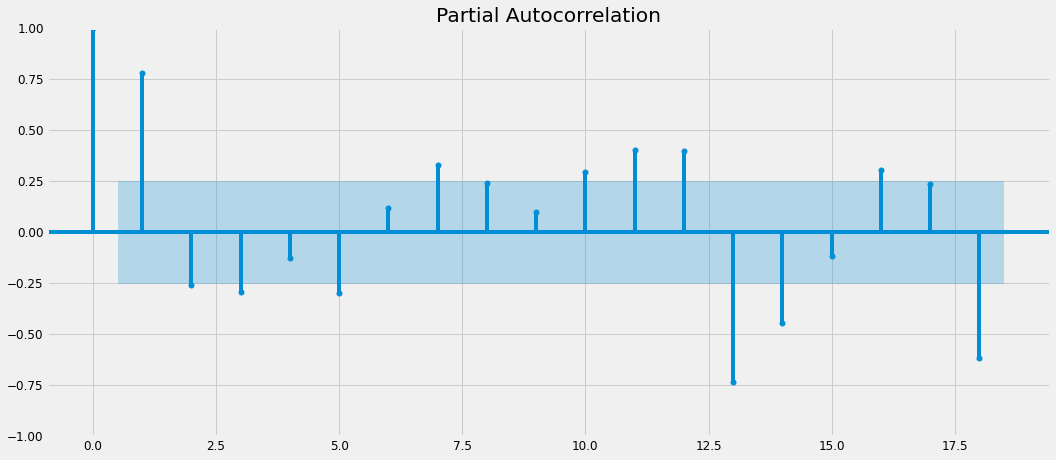

In [161]:
### ACF and PACF

acf = plot_acf(store10_monthly["sales"])
pacf = plot_pacf(store10_monthly["sales"])

SARIMA Model

In [162]:
### Finding optimal values for p d and q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store10_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1114.7641982430741
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:840.7377987229097
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:651.192392362934


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1246.4093947223107
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:602.8290591260387
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:579.6564279236602
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:451.17013656879533


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1462.865407068678
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1030.1014608018024
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:776.3010355798541
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:588.1583006600184


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1451.1811879852648
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:568.3456859643713


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:540.9604445274838
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:430.81770981356306
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1269.0693953031378
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:858.5331731560832
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:649.8594832958615
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:521.156602459836


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1389.9914140165474
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:529.0540997028213
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:513.3117754028049
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:392.64756866025897


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1076.2562046116461
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:844.1580881289527
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:636.3153258450376
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:511.11123630156163


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1282.6863894931118
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:527.2141743058438
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:500.7841743188746
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:388.6123539067416


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1303.5147053705034
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:874.4616304368374
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:665.6143849929292
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:532.4159015798332


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1729.7373042421573
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:527.3725042854647
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:521.654533108689
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:394.0143300476405


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1549.590727178165
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:860.700505000349
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:653.0098104813134
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:522.2266490656815


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1320.4906057408289
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:526.7771638329714


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:520.5303960514427
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:391.56535710714996


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1124.1638205758088
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:858.2686181037035
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:649.9673541074286
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:521.8645136244373
SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1393.8424590358486
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:517.3264177931719
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:511.5595825256444
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:379.35668634640723
SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1415.271680812237
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:845.4425646820507
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:638.2200721340995
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:513.1098775444868


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1382.945285795212
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:518.7126832682466


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:502.6539542341605
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:379.31755293494643
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1403.8030697200104


C:\Users\shoum\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Lowest AIC

SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:379.31755293494643

In [163]:
### Fitting the SARIMA Model using the Optimal parameters

model=SARIMAX(store10_monthly,order=(1,1,1),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -263.107
Date:                             Mon, 13 Mar 2023   AIC                            534.213
Time:                                     01:51:11   BIC                            541.614
Sample:                                 01-01-2013   HQIC                           536.998
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0251      1.289      0.020      0.984      -2.502       2.552
ma.L1         -0.1814      1.276     -0.142      0.887      -2.682       2.319
ar.S.L12      -0.2503      0.196     -1.279      0.201      -0.634       0.133
sigma2      4174.9351    983.354      4.246      0.000    2247.597    6102.273
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.12
Prob(Q):                              0.94   Prob(JB):                         0.21
Heteroskedasticity (H):               0.51   Skew:                            -0.63
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

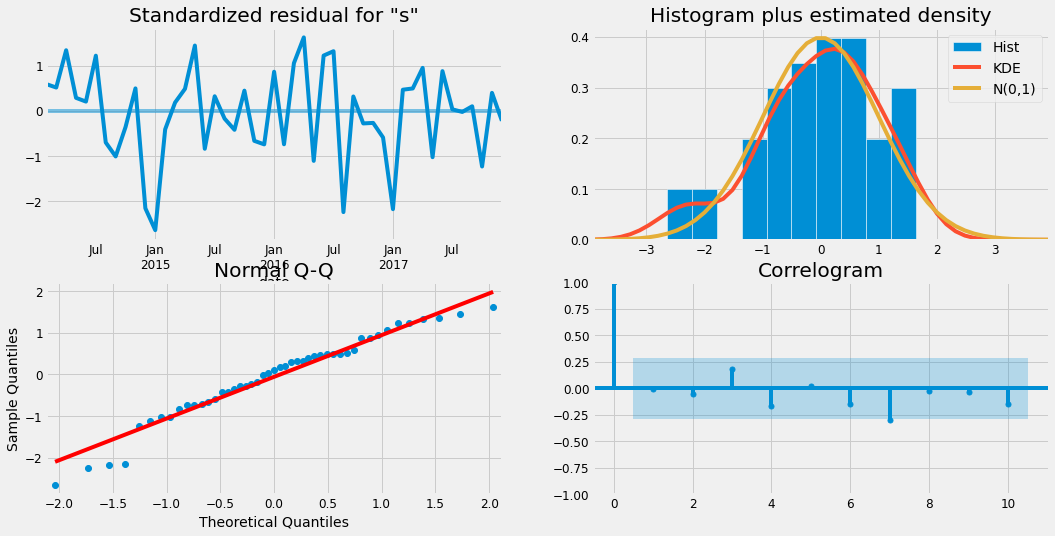

In [164]:
### SARIMA Model diagnostics
results.plot_diagnostics(figsize=(16,8))
plt.show()

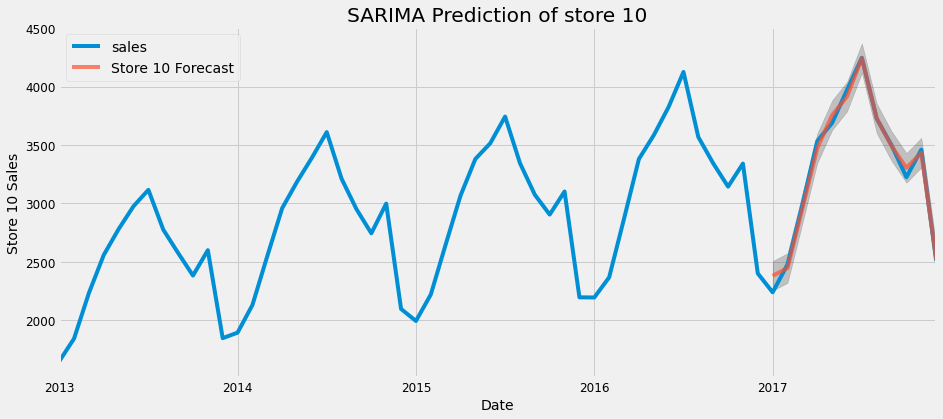

In [165]:
### Prediction using SARIMA Model

pred10 = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred10_ci = pred10.conf_int()

ax = store10_monthly['2013':].plot(label = 'observed')
pred10.predicted_mean.plot(ax = ax, label = 'Store 10 Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred10_ci.index, 
                pred10_ci.iloc[:,0],
                pred10_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of store 10")
ax.set_xlabel('Date')
ax.set_ylabel('Store 10 Sales')
plt.legend()
plt.show()

In [166]:
### Validating SARIMA Prediction - MSE, RMSE

store10_forecasted_sales = pred10.predicted_mean
store10_true_sales = store10_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(store10_true_sales,store10_forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Mean Squared Error of forecasts is 3370.8
The Root Mean Squared Error of forecasts is 58.06


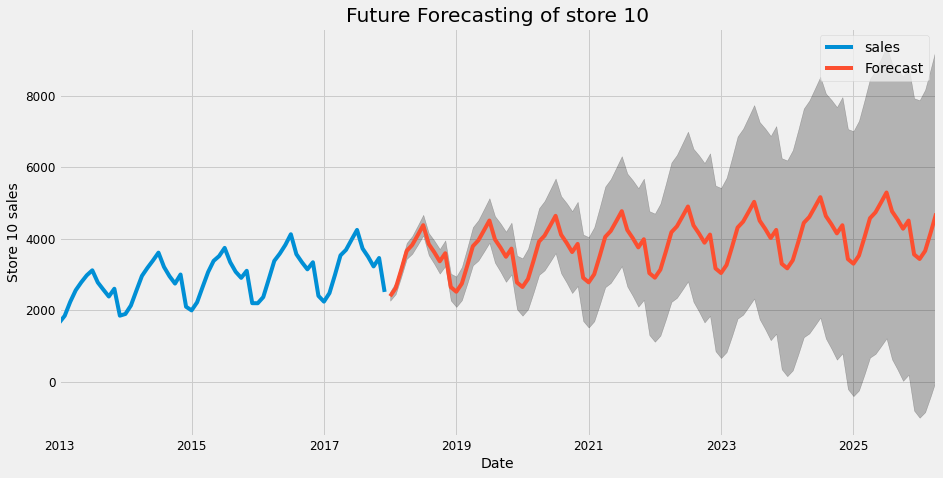

In [167]:
### Future Forecasting of store 3 using SARIMA

pred10_uc = results.get_forecast(steps = 100)
pred10_ci = pred10_uc.conf_int()

ax = store10_monthly.plot(label = 'observed', figsize=(14, 7))
pred10_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred10_ci.index,
                pred10_ci.iloc[:,0],
                pred10_ci.iloc[:,1],
                color = 'k',
                alpha = .25)

plt.title("Future Forecasting of store 10")
ax.set_xlabel('Date')
ax.set_ylabel('Store 10 sales')
plt.legend()
plt.show()

# Time Series Modelling with Prophet

In [168]:
# !pip install Prophet

In [169]:
## store 1 monthly sales mean

store1_sales=df[df['store']==1]
store1_daily=store1_sales.groupby("date").agg({"sales":"sum"})
store1_monthly=store1_daily.resample(rule='MS').mean()
store1_monthly.head()

sales
date                   
2013-01-01  1325.064516
2013-02-01  1475.214286
2013-03-01  1800.870968
2013-04-01  2050.766667
2013-05-01  2234.580645

In [170]:
# Seperating data till 2016

store1 = store1_monthly[:'2016']
store1.tail()

sales
date                   
2016-08-01  2858.903226
2016-09-01  2714.800000
2016-10-01  2530.193548
2016-11-01  2685.933333
2016-12-01  1943.419355

01:51:13 - cmdstanpy - INFO - Chain [1] start processing
01:51:13 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Store1 Sales')

<Figure size 1152x504 with 0 Axes>

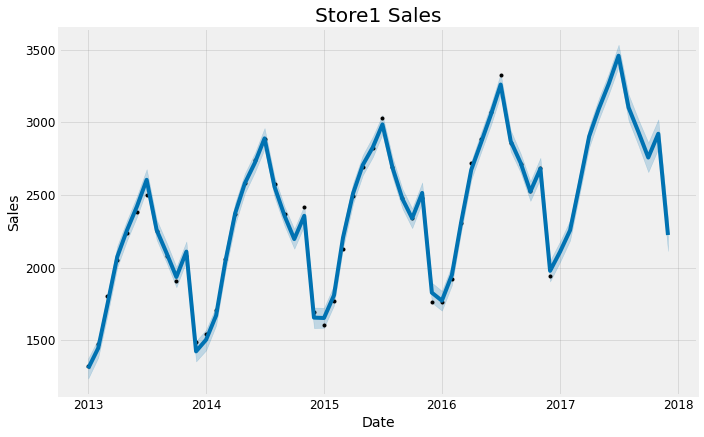

In [171]:
### Store1 sales Prediction for year 2017 using Prophet

from prophet import Prophet


store1 = store1.reset_index()
store1 = store1.rename(columns={'date': 'ds', 'sales': 'y'})
store1_model = Prophet(interval_width = 0.95)
store1_model.fit(store1)

store1_forecast = store1_model.make_future_dataframe(periods = 12, freq = 'MS')
store1_forecast = store1_model.predict(store1_forecast)

plt.figure(figsize = (16,7))
store1_model.plot(store1_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Store1 Sales')


### periods = 12 means 12 months ie; 1 year

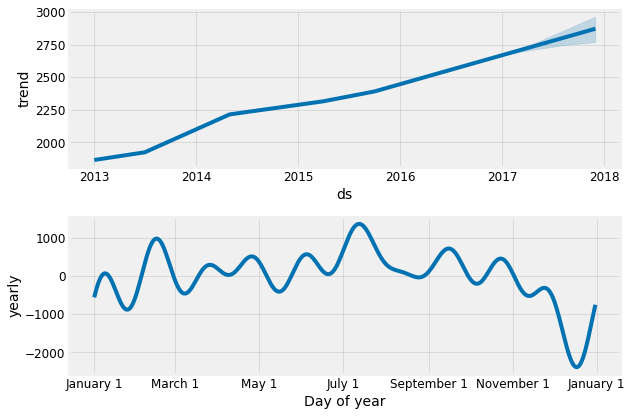

In [172]:
from prophet.plot import plot_plotly, plot_components_plotly
store1_model.plot_components(store1_forecast)
plt.show()

In [173]:
store1_forecast

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2013-01-01  1865.739207  1235.632451  1374.713890  1865.739207   
1  2013-02-01  1875.815392  1380.543796  1509.202658  1875.815392   
2  2013-03-01  1884.916462  1663.865115  1807.877400  1884.916462   
3  2013-04-01  1894.992647  2001.929141  2148.843678  1894.992647   
4  2013-05-01  1904.743794  2185.992024  2325.594661  1904.743794   
5  2013-06-01  1914.837504  2349.259859  2492.271630  1914.837504   
6  2013-07-01  1924.605611  2536.076169  2677.334196  1924.605611   
7  2013-08-01  1954.227909  2190.679551  2329.586811  1954.227909   
8  2013-09-01  1983.869306  2031.238789  2170.579026  1983.869306   
9  2013-10-01  2012.554529  1864.557461  2003.948218  2012.554529   
10 2013-11-01  2042.195926  2044.855243  2179.739614  2042.195926   
11 2013-12-01  2070.881149  1353.812768  1494.208792  2070.881149   
12 2014-01-01  2100.522546  1430.263508  1572.186533  2100.522546   
13 2014-02-01  2130.134546  1602.384465  1732.586353  2130.134546   
14 2014-03-01  2156.870631  1966.032115  2107.550777  2156.870631   
15 2014-04-01  2186.471298  2297.738989  2444.598036  2186.471298   
16 2014-05-01  2215.061286  2510.935902  2647.999620  2215.061286   
17 2014-06-01  2224.400248  2656.672583  2789.610513  2224.400248   
18 2014-07-01  2233.437952  2816.733515  2960.601817  2233.437952   
19 2014-08-01  2242.723900  2485.019118  2624.332637  2242.723900   
20 2014-09-01  2251.997790  2286.894720  2418.437985  2251.997790   
21 2014-10-01  2260.972523  2129.420871  2266.157714  2260.972523   
22 2014-11-01  2270.246204  2289.080177  2427.178515  2270.246204   
23 2014-12-01  2279.220733  1583.347668  1725.049725  2279.220733   
24 2015-01-01  2288.494414  1585.679964  1723.018373  2288.494414   
25 2015-02-01  2297.768094  1740.242470  1878.524736  2297.768094   
26 2015-03-01  2306.165967  2135.243408  2273.896095  2306.165967   
27 2015-04-01  2315.463612  2439.549314  2579.574848  2315.463612   
28 2015-05-01  2327.764965  2635.296147  2774.403121  2327.764965   
29 2015-06-01  2340.522468  2760.232444  2901.357559  2340.522468   
30 2015-07-01  2352.868438  2917.207791  3051.023227  2352.868438   
31 2015-08-01  2365.628590  2624.159216  2759.261035  2365.628590   
32 2015-09-01  2378.395253  2404.862209  2540.608784  2378.395253   
33 2015-10-01  2390.750088  2271.506889  2407.565720  2390.750088   
34 2015-11-01  2409.518275  2449.368293  2585.785032  2409.518275   
35 2015-12-01  2427.736331  1758.442184  1895.845957  2427.736331   
36 2016-01-01  2446.561655  1703.455991  1839.389817  2446.561655   
37 2016-02-01  2465.395047  1878.705047  2015.934735  2465.395047   
38 2016-03-01  2483.017822  2249.113421  2382.658084  2483.017822   
39 2016-04-01  2501.855961  2605.496100  2730.423190  2501.855961   
40 2016-05-01  2520.086419  2793.005399  2928.432477  2520.086419   
41 2016-06-01  2538.924558  2981.115329  3123.326405  2538.924558   
42 2016-07-01  2557.155015  3188.823575  3335.583704  2557.155015   
43 2016-08-01  2575.993154  2799.510010  2944.516126  2575.993154   
44 2016-09-01  2594.831293  2653.212850  2784.415861  2594.831293   
45 2016-10-01  2613.061750  2458.771118  2594.554650  2613.061750   
46 2016-11-01  2631.899889  2612.019312  2755.682795  2631.899889   
47 2016-12-01  2650.130346  1904.497982  2048.177775  2650.130346   
48 2017-01-01  2668.968485  2039.244833  2181.062485  2666.683151   
49 2017-02-01  2687.806624  2188.034885  2326.675503  2680.496736   
50 2017-03-01  2704.821718  2491.773251  2630.274394  2691.724049   
51 2017-04-01  2723.659857  2827.644296  2969.855596  2704.218941   
52 2017-05-01  2741.890314  3019.731021  3165.357481  2715.098979   
53 2017-06-01  2760.728453  3195.601772  3339.414137  2724.022640   
54 2017-07-01  2778.958910  3382.033728  3534.023385  2732.630221   
55 2017-08-01  2797.797049  3013.038498  3191.302969  2743.629829   
56 2017-09-01  2816.635188  2838.488056  3016.375969  2751.173532   
57 2017-1

In [174]:
store1_forecast[['ds','yhat']]

ds         yhat
0  2013-01-01  1306.013112
1  2013-02-01  1445.152856
2  2013-03-01  1739.589113
3  2013-04-01  2074.378181
4  2013-05-01  2256.561716
5  2013-06-01  2421.125088
6  2013-07-01  2604.069170
7  2013-08-01  2258.287988
8  2013-09-01  2098.037141
9  2013-10-01  1935.163065
10 2013-11-01  2109.806870
11 2013-12-01  1423.123091
12 2014-01-01  1503.219093
13 2014-02-01  1670.193342
14 2014-03-01  2034.337757
15 2014-04-01  2373.380831
16 2014-05-01  2580.165630
17 2014-06-01  2721.280851
18 2014-07-01  2889.500744
19 2014-08-01  2556.266242
20 2014-09-01  2355.835712
21 2014-10-01  2196.260174
22 2014-11-01  2356.388913
23 2014-12-01  1655.512994
24 2015-01-01  1652.890488
25 2015-02-01  1809.262248
26 2015-03-01  2207.017140
27 2015-04-01  2509.812058
28 2015-05-01  2705.658039
29 2015-06-01  2827.356636
30 2015-07-01  2985.595891
31 2015-08-01  2689.003812
32 2015-09-01  2472.232038
33 2015-10-01  2339.206325
34 2015-11-01  2514.014587
35 2015-12-01  1827.223393
36 2016-01-01  1771.980294
37 2016-02-01  1949.077608
38 2016-03-01  2315.515384
39 2016-04-01  2673.656618
40 2016-05-01  2858.138450
41 2016-06-01  3053.968208
42 2016-07-01  3260.054027
43 2016-08-01  2870.917926
44 2016-09-01  2719.648500
45 2016-10-01  2523.500194
46 2016-11-01  2680.830120
47 2016-12-01  1977.483145
48 2017-01-01  2109.242390
49 2017-02-01  2257.144088
50 2017-03-01  2559.494369
51 2017-04-01  2903.045391
52 2017-05-01  3093.708236
53 2017-06-01  3267.016036
54 2017-07-01  3458.422469
55 2017-08-01  3101.857127
56 2017-09-01  2930.803022
57 2017-10-01  2757.474181
58 2017-11-01  2921.314727
59 2017-12-01  2224.176183

In [175]:
y_pred_pro = store1_forecast.set_index('ds')[['yhat']]
y_pred_pro = y_pred_pro['2017':]
y_pred_pro

yhat
ds                     
2017-01-01  2109.242390
2017-02-01  2257.144088
2017-03-01  2559.494369
2017-04-01  2903.045391
2017-05-01  3093.708236
2017-06-01  3267.016036
2017-07-01  3458.422469
2017-08-01  3101.857127
2017-09-01  2930.803022
2017-10-01  2757.474181
2017-11-01  2921.314727
2017-12-01  2224.176183

In [176]:
### Validating Prophet Prediction - MSE, RMSE

forecasted_sales = y_pred_pro['yhat']
true_sales = store1_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(true_sales,forecasted_sales)
print('The Mean Squared Error of forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of forecasts is 25181.42
The Root Mean Squared Error of forecasts is 158.69


In [177]:
Store1_RMSE['Prophet_RMSE'] = round(np.sqrt(mse), 2)
comp['Prophet_Prediction'] = y_pred_pro['yhat']

01:51:14 - cmdstanpy - INFO - Chain [1] start processing
01:51:15 - cmdstanpy - INFO - Chain [1] done processing


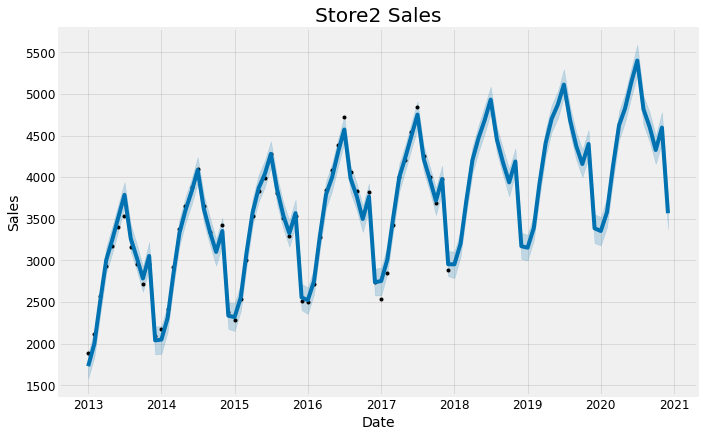

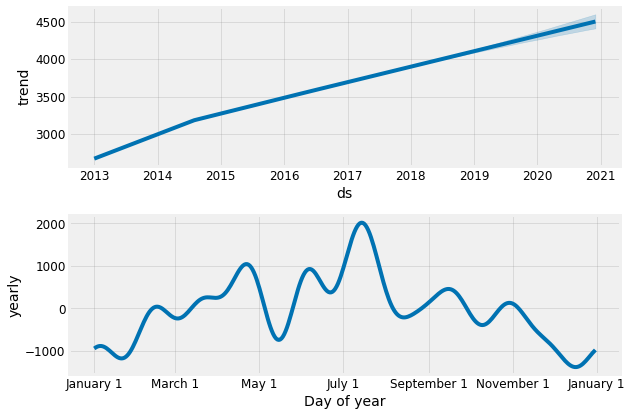

In [178]:
### Store2 Model building and Future forecast for 3 years using Prophet


store2_sales=df[df['store']==2]
store2_daily=store2_sales.groupby("date").agg({"sales":"sum"})
store2_monthly=store2_daily.resample(rule='MS').mean()

store2 = store2_monthly.reset_index()
store2 = store2.rename(columns={'date': 'ds', 'sales': 'y'})
store2_model = Prophet(interval_width = 0.95)
store2_model.fit(store2)

store2_forecast = store2_model.make_future_dataframe(periods = 36, freq = 'MS')
store2_forecast = store2_model.predict(store2_forecast)

store2_model.plot(store2_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Store2 Sales')

store2_model.plot_components(store2_forecast)
plt.show()

###  Model building and Forecasting future sales using Prophet for all 10 stores

01:51:15 - cmdstanpy - INFO - Chain [1] start processing
01:51:16 - cmdstanpy - INFO - Chain [1] done processing


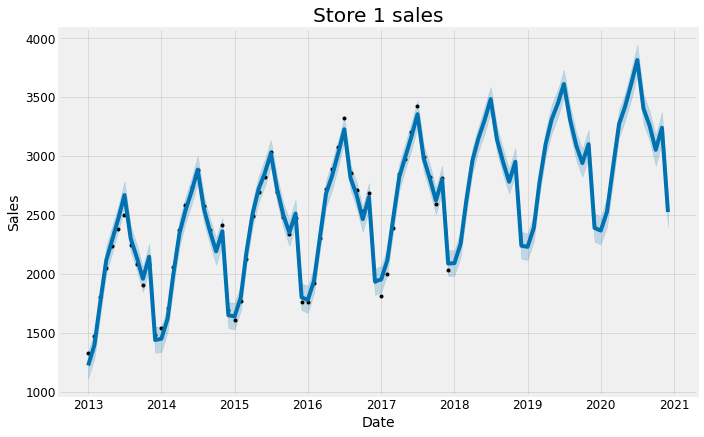

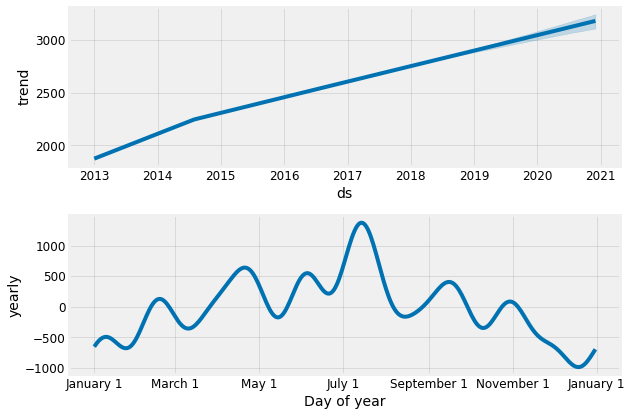

01:51:16 - cmdstanpy - INFO - Chain [1] start processing
01:51:17 - cmdstanpy - INFO - Chain [1] done processing


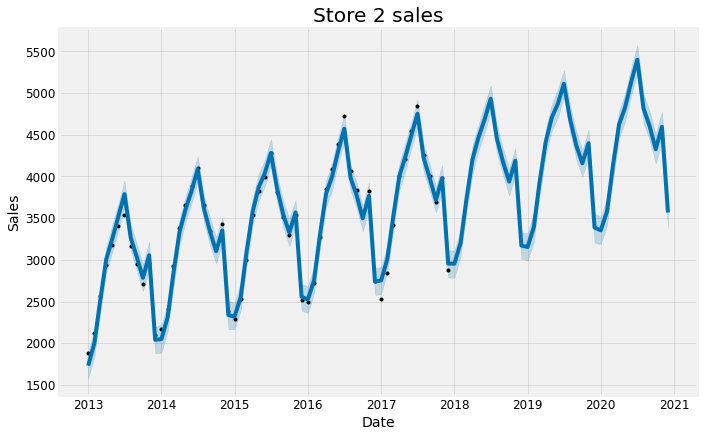

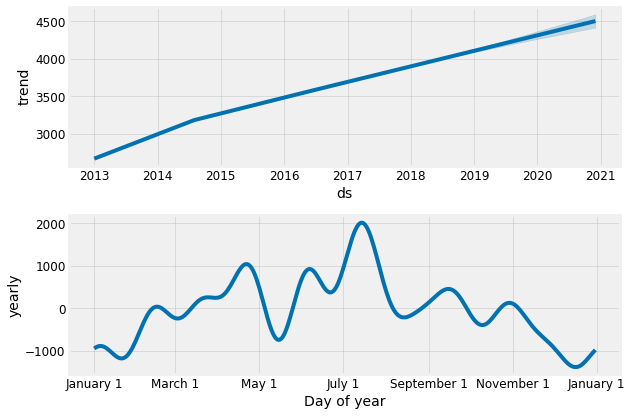

01:51:17 - cmdstanpy - INFO - Chain [1] start processing
01:51:18 - cmdstanpy - INFO - Chain [1] done processing


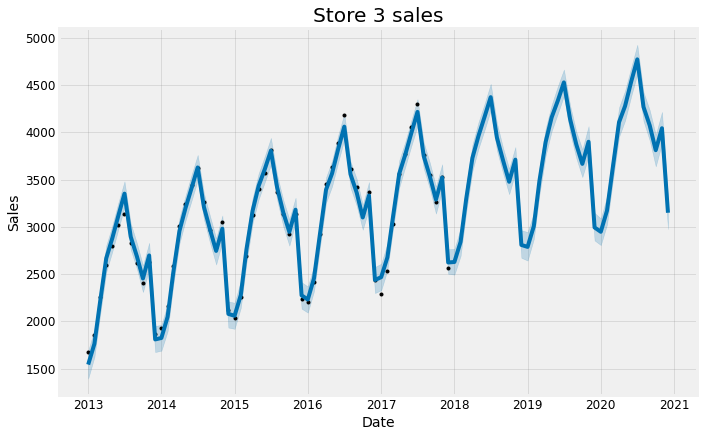

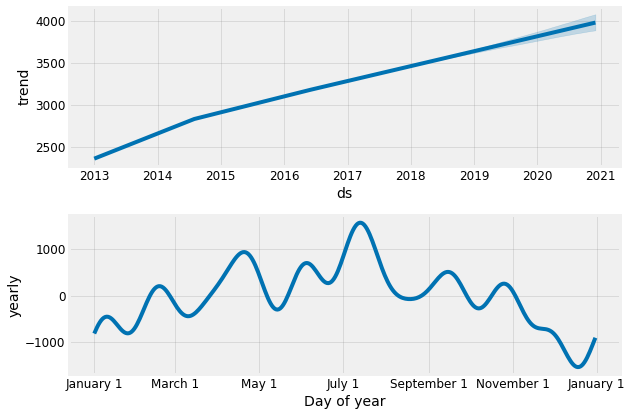

01:51:18 - cmdstanpy - INFO - Chain [1] start processing
01:51:19 - cmdstanpy - INFO - Chain [1] done processing


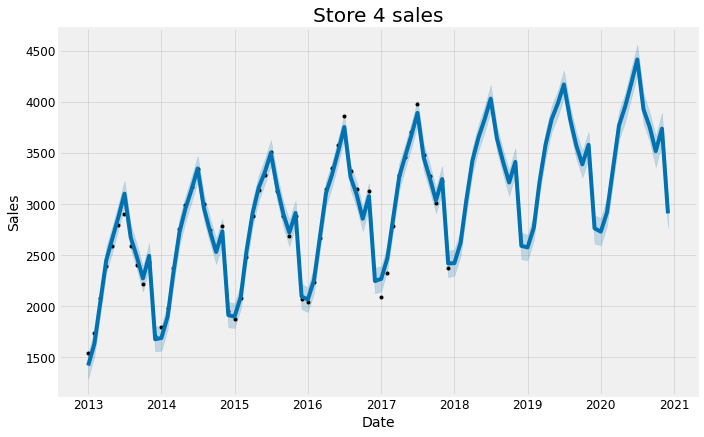

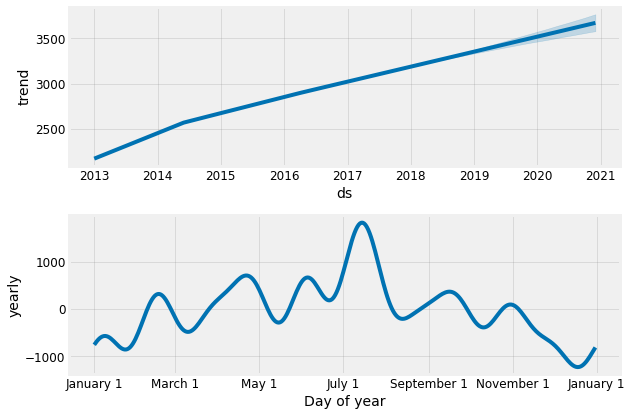

01:51:20 - cmdstanpy - INFO - Chain [1] start processing
01:51:20 - cmdstanpy - INFO - Chain [1] done processing


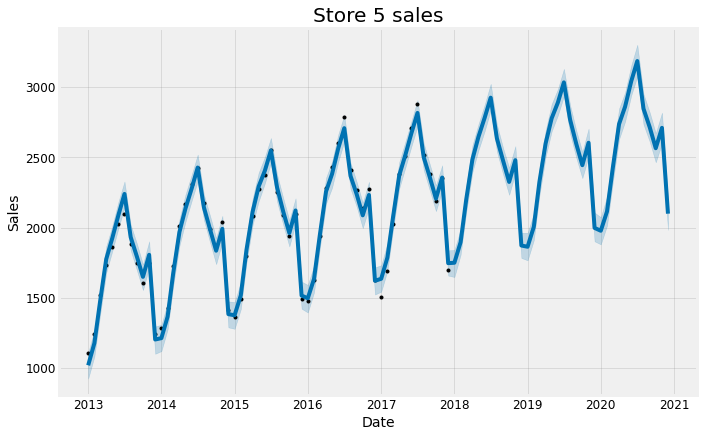

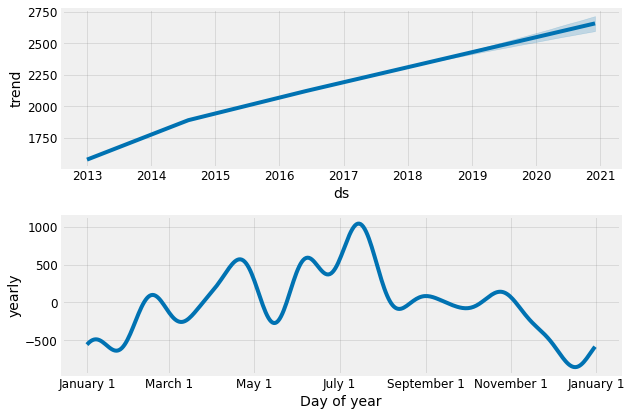

01:51:21 - cmdstanpy - INFO - Chain [1] start processing
01:51:21 - cmdstanpy - INFO - Chain [1] done processing


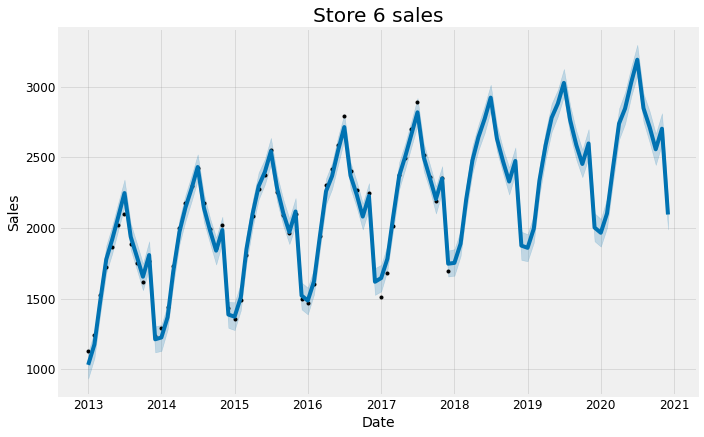

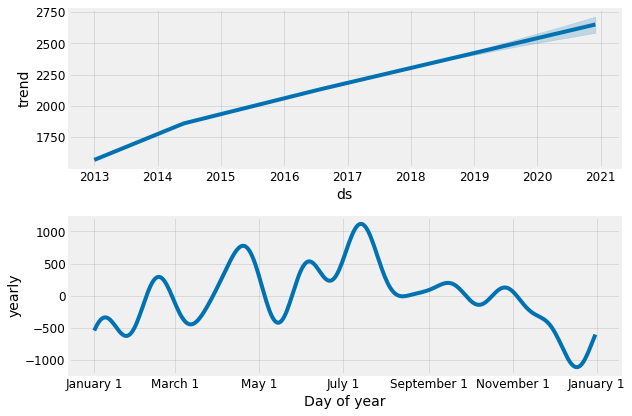

01:51:21 - cmdstanpy - INFO - Chain [1] start processing
01:51:22 - cmdstanpy - INFO - Chain [1] done processing


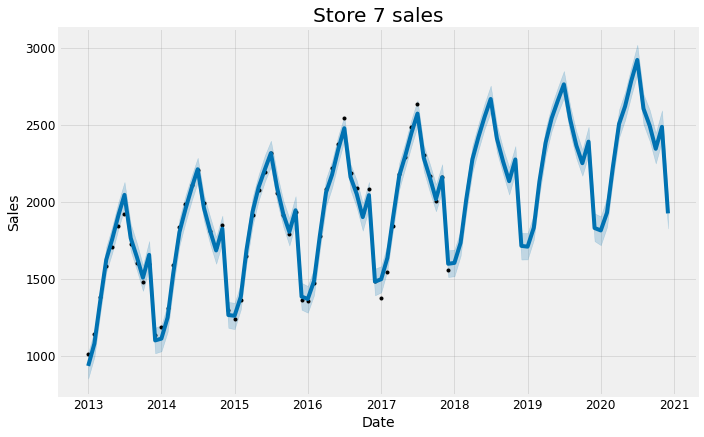

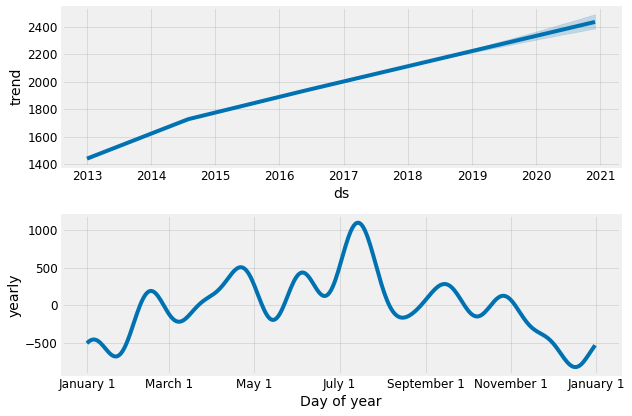

01:51:22 - cmdstanpy - INFO - Chain [1] start processing
01:51:23 - cmdstanpy - INFO - Chain [1] done processing


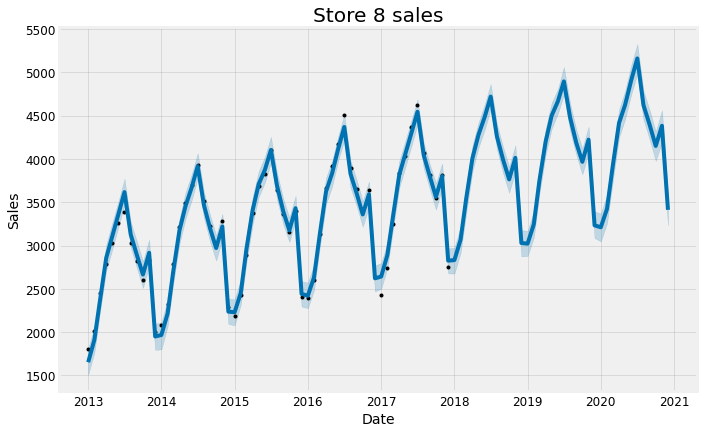

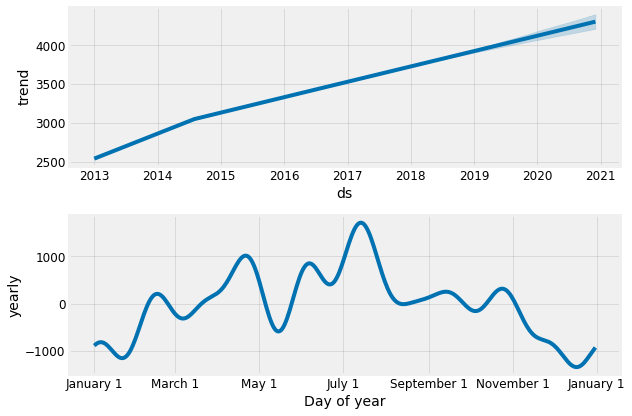

01:51:23 - cmdstanpy - INFO - Chain [1] start processing
01:51:24 - cmdstanpy - INFO - Chain [1] done processing


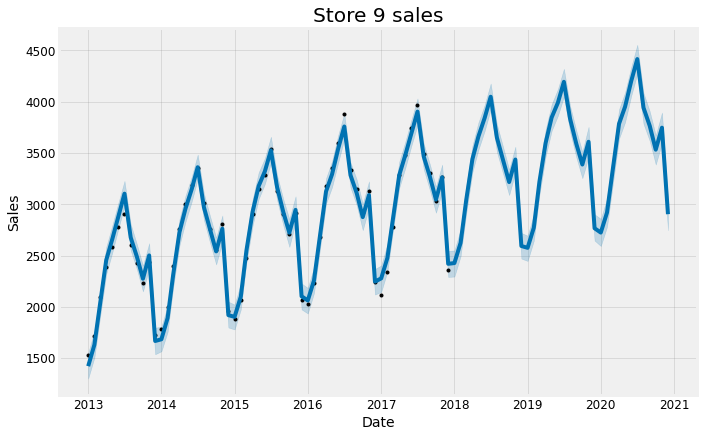

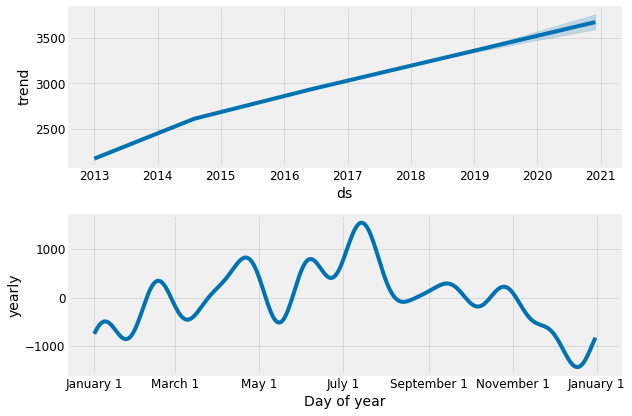

01:51:24 - cmdstanpy - INFO - Chain [1] start processing
01:51:25 - cmdstanpy - INFO - Chain [1] done processing


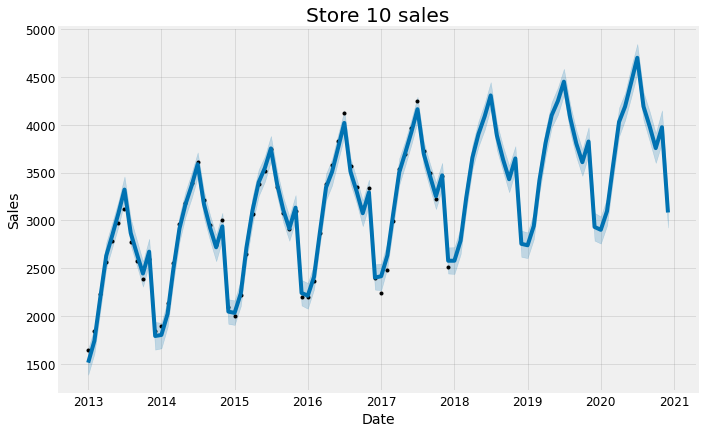

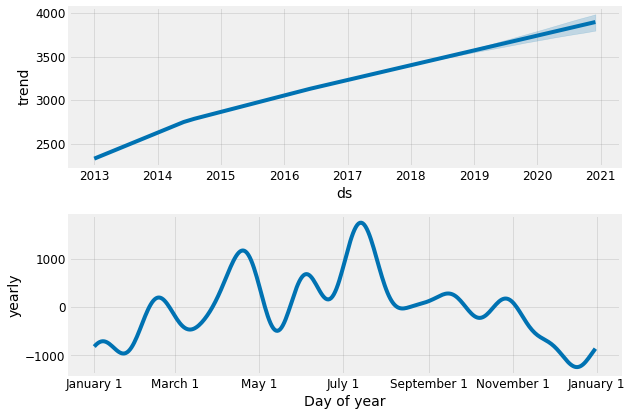

In [179]:
### Forecasting all 10 stores using Prophet 

for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    store_monthly=store_daily.resample(rule='MS').mean()
    store = store_monthly.reset_index()
    store = store.rename(columns={'date': 'ds', 'sales': 'y'})
    store_model = Prophet(interval_width = 0.95)
    store_model.fit(store)
    store_forecast = store_model.make_future_dataframe(periods = 36, freq = 'MS')
    store_forecast = store_model.predict(store_forecast)
    store_model.plot(store_forecast, xlabel = 'Date', ylabel = 'Sales')
    plt.title('Store '+str(i)+' sales')
    store_model.plot_components(store_forecast)
    plt.show()
    
 ### periods = 36 means 36 months ie; 3 years   


# Compare Forecasts

### Comparison of Different Model predictions of Store 1

In [180]:
comp

Store1 Sales  ARIMA_Prediction  SARIMA_Prediction  \
date                                                            
2017-01-01   1809.225806       1950.107360        1932.203587   
2017-02-01   2003.500000       2078.378341        1984.614559   
2017-03-01   2388.290323       2421.189463        2383.556606   
2017-04-01   2844.600000       2730.747031        2791.721769   
2017-05-01   2975.741935       2839.379887        3011.586155   
2017-06-01   3206.266667       3201.435646        3160.620970   
2017-07-01   3425.387097       3455.811434        3444.014539   
2017-08-01   2995.354839       2882.025294        2979.636785   
2017-09-01   2825.300000       2819.868712        2840.419708   
2017-10-01   2597.387097       2670.795211        2648.363395   
2017-11-01   2816.666667       2776.770027        2756.454378   
2017-12-01   2030.903226       2076.711309        2070.372380   

            Prophet_Prediction  
date                            
2017-01-01         2109.242390  
2017-02-01         2257.144088  
2017-03-01         2559.494369  
2017-04-01         2903.045391  
2017-05-01         3093.708236  
2017-06-01         3267.016036  
2017-07-01         3458.422469  
2017-08-01         3101.857127  
2017-09-01         2930.803022  
2017-10-01         2757.474181  
2017-11-01         2921.314727  
2017-12-01         2224.176183

Text(0, 0.5, 'sales')

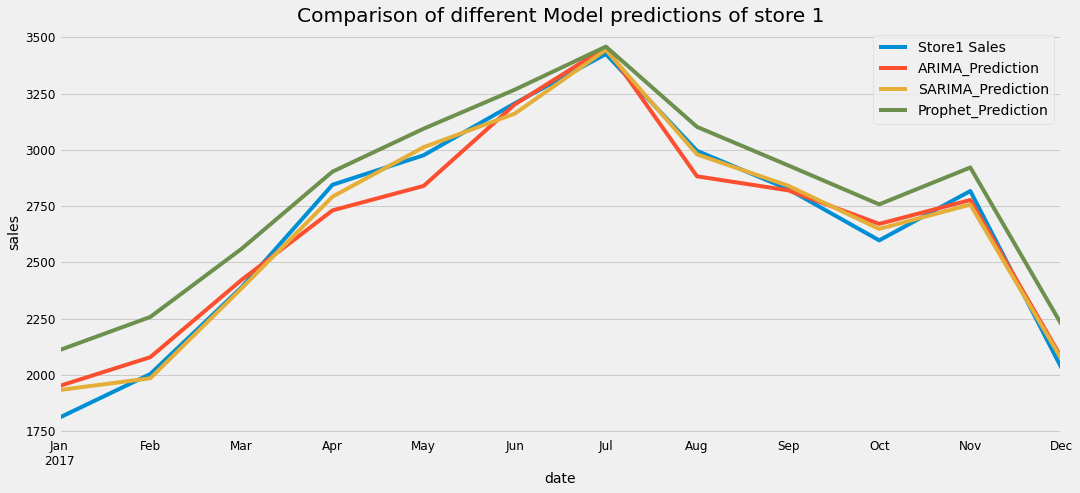

In [181]:
comp.plot()
plt.title('Comparison of different Model predictions of store 1')
plt.ylabel('sales')

In [182]:
Store1_RMSE

ARIMA_RMSE  SARIMA_RMSE  Prophet_RMSE
Store1       82.16        50.23        158.69

###### We got better RMSE value for SARIMA. For seasonal data, SARIMA works better than ARIMA



# Comparison of SARIMA forecast of different stores

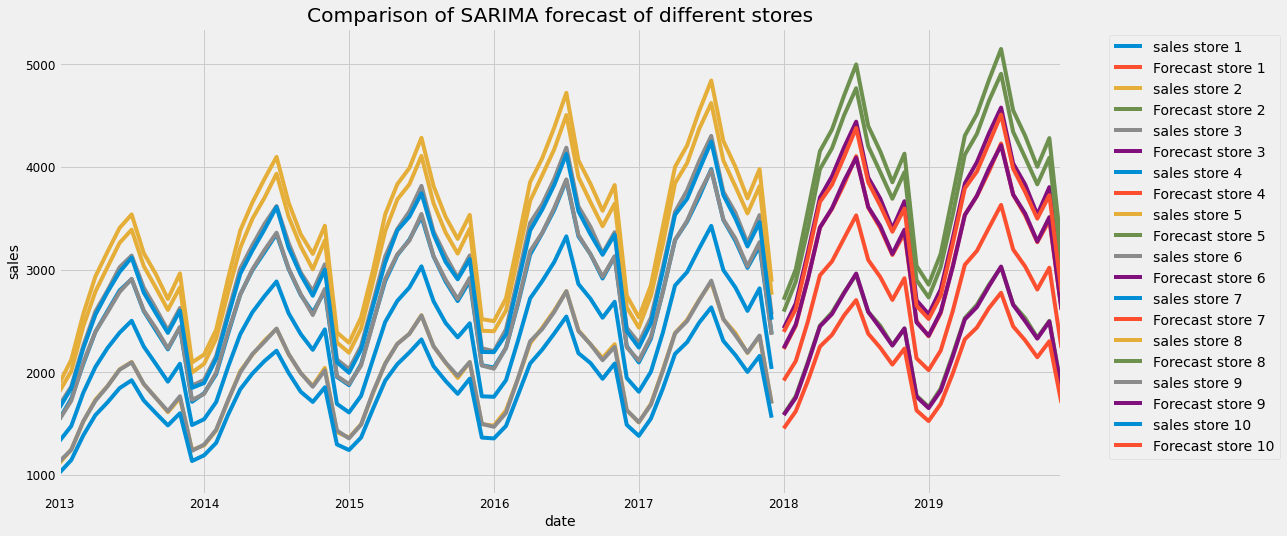

In [183]:
## Comparison of SARIMA forecast of different stores

for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    store_monthly=store_daily.resample(rule='MS').mean()
    model=SARIMAX(store_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
    results = model.fit()
    pred = results.get_forecast(steps = 24)
    retail = pd.DataFrame(pred.predicted_mean)
    plt.title('Comparison of SARIMA forecast of different stores')
    store_monthly['sales'].plot(figsize=(16,8),label='sales store '+str(i))
    retail['predicted_mean'].plot(figsize=(16,8),label='Forecast store '+str(i))
    plt.ylabel('sales')
    plt.legend(bbox_to_anchor=(1.04, 1))
    #put the legend outside the plot
    